In [ ]:
#Попередня обробка даних

In [ ]:
# Step 1: Data Understanding
import pandas as pd

# Load the dataset
df = pd.read_csv("data.csv")

In [ ]:
num_rows, num_cols = df.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 1187
Number of columns: 7


In [ ]:
print(df.dtypes)

Date         object
Open        float64
High        float64
Low         float64
Close       float64
AdjClose    float64
Volume      float64
dtype: object


In [ ]:
# Task 3: Calculate the total number of missing values in each column
print(df.isnull().sum())

Date        0
Open        0
High        0
Low         0
Close       0
AdjClose    0
Volume      0
dtype: int64


In [ ]:
# Task 4: Identify the unique values in categorical columns
categorical_columns = df.select_dtypes(include='object').columns
for col in categorical_columns:
    unique_values = df[col].unique()
    print(f"Unique values in column '{col}': {unique_values}")


Unique values in column 'Date': ['2021-01-01' '2021-01-02' '2021-01-03' ... '2024-03-29' '2024-03-30'
 '2024-03-31']


In [ ]:
numeric_columns = df.select_dtypes(include=['int', 'float']).columns
for col in numeric_columns:
    avg_value = df[col].mean()
    min_value = df[col].min()
    max_value = df[col].max()
    print(f"Column '{col}': Average={avg_value}, Min={min_value}, Max={max_value}")

Column 'Open': Average=2186.1646756529067, Min=-143.13, Max=76054.15
Column 'High': Average=2901.6955770850886, Min=-25.44, Max=16777.1
Column 'Low': Average=2039.576798652064, Min=-504.07, Max=4111.58
Column 'Close': Average=2218.939578770008, Min=-54.97, Max=4090.71
Column 'AdjClose': Average=8033.811078348778, Min=-3424.46, Max=29238.64
Column 'Volume': Average=56989.55713563605, Min=-952.17, Max=78971.7


In [ ]:
# Task 6: Determine the range for numeric columns
for col in numeric_columns:
    range_value = df[col].max() - df[col].min()
    print(f"Range for column '{col}': {range_value}")

Range for column 'Open': 76197.28
Range for column 'High': 16802.539999999997
Range for column 'Low': 4615.65
Range for column 'Close': 4145.68
Range for column 'AdjClose': 32663.1
Range for column 'Volume': 79923.87


In [ ]:
# Task 7: Find the most frequent values in categorical columns
for col in categorical_columns:
    most_frequent_values = df[col].value_counts().head()
    print(f"Most frequent values in column '{col}':")
    print(most_frequent_values)

Most frequent values in column 'Date':
Date
2021-10-08    2
2021-10-09    2
2021-09-22    2
2021-01-01    1
2023-03-04    1
Name: count, dtype: int64


In [ ]:
num_duplicates = df.duplicated().sum()
print("Number of duplicate rows:", num_duplicates)

Number of duplicate rows: 0


In [ ]:
correlation_matrix = df[numeric_columns].corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
              Open      High       Low     Close  AdjClose    Volume
Open      1.000000  0.152300  0.200239  0.173514  0.022522  0.195831
High      0.152300  1.000000  0.581815  0.590017 -0.124114  0.737871
Low       0.200239  0.581815  1.000000  0.738239 -0.097063  0.829060
Close     0.173514  0.590017  0.738239  1.000000 -0.105112  0.808938
AdjClose  0.022522 -0.124114 -0.097063 -0.105112  1.000000 -0.116577
Volume    0.195831  0.737871  0.829060  0.808938 -0.116577  1.000000


In [ ]:
N = 5
top_N_prices = df.nlargest(N, 'Close')
print(f"Top {N} rows with the highest Energy consumption:")
print(top_N_prices)

Top 5 rows with the highest Energy consumption:
           Date     Open     High      Low    Close  AdjClose    Volume
332  2021-11-28  2208.98  4090.71  2190.48  4090.71    -70.22  70973.01
23   2021-01-24  2301.27  4137.19  2247.31  3927.31   7244.48  71085.85
186  2021-07-06  2073.90  3926.94  2073.41  3921.93  23360.51  68884.31
360  2021-12-26  2740.64  3669.48  2709.45  3669.48   -134.97  73841.69
765  2023-02-04  2478.22  3660.63  2433.81  3660.63  15452.26  61488.92


In [ ]:
df['Year'] = pd.to_datetime(df['Date']).dt.year
average_price_per_year = df.groupby('Year')['Close'].mean()
print("Average Energy consumption per year:")
print(average_price_per_year)

Average Energy consumption per year:
Year
2021    2191.695847
2022    2193.994575
2023    2262.057397
2024    2255.622308
Name: Close, dtype: float64


In [ ]:
num_unique_dates = df['Date'].nunique()
print("Number of unique dates:", num_unique_dates)

Number of unique dates: 1184


In [ ]:
df['Month'] = pd.to_datetime(df['Date']).dt.month
average_price_per_month = df.groupby('Month')['Close'].mean()
print("Average Energy consumption per month:")
print(average_price_per_month)

Average Energy consumption per month:
Month
1     2462.032661
2     2481.961150
3     2247.419194
4     2134.936778
5     1474.809462
6     1571.645778
7     2236.547204
8     2234.683011
9     2316.897143
10    2405.545806
11    2428.731222
12    2470.261398
Name: Close, dtype: float64


In [ ]:
df['Energy consumption_Change'] = df['Close'] - df['Open']
top_N_price_changes = df.nlargest(N, 'Energy consumption_Change')
print(f"Top {N} rows with the largest daily Energy consumption:")
print(top_N_price_changes)

Top 5 rows with the largest daily Energy consumption:
           Date    Open     High      Low    Close  AdjClose    Volume  Year  \
152  2021-06-02  -30.37  2202.05   -36.05  2195.53  17678.14   4877.82  2021   
693  2022-11-24   11.12  3156.43    11.12  2203.99      0.00  55016.57  2022   
127  2021-05-08  -31.62  2131.18   -49.34  2131.18  18566.75   4515.91  2021   
147  2021-05-28   31.30  2186.30    23.68  2180.90  17546.28  16434.07  2021   
420  2022-02-24 -143.13  3151.66  2002.43  2002.43   -143.13  65262.20  2022   

     Month  Energy consumption_Change  
152      6                    2225.90  
693     11                    2192.87  
127      5                    2162.80  
147      5                    2149.60  
420      2                    2145.56  


In [ ]:
earliest_date = df['Date'].min()
latest_date = df['Date'].max()
print("Earliest date:", earliest_date)
print("Latest date:", latest_date)

Earliest date: 2021-01-01
Latest date: 2024-03-31


In [ ]:
df['DayOfWeek'] = pd.to_datetime(df['Date']).dt.dayofweek
df['IsWeekend'] = df['DayOfWeek'].isin([5, 6])
average_price_weekdays = df[~df['IsWeekend']]['Close'].mean()
average_price_weekends = df[df['IsWeekend']]['Close'].mean()
print("Average Energy consumption for weekdays:", average_price_weekdays)
print("Average Energy consumption for weekends:", average_price_weekends)

Average Energy consumption for weekdays: 2203.3464539007095
Average Energy consumption for weekends: 2257.6251612903225


In [ ]:
total_volume_per_year = df.groupby('Year')['Volume'].sum()
print("Total trading volume per year:")
print(total_volume_per_year)

Total trading volume per year:
Year
2021    20879756.47
2022    20471376.91
2023    20926541.52
2024     5368929.42
Name: Volume, dtype: float64


In [ ]:
average_price_per_dayofweek = df.groupby('DayOfWeek')['Close'].mean()
print("Average Energy consumption per day of the week:")
print(average_price_per_dayofweek)

Average Energy consumption per day of the week:
DayOfWeek
0    2239.691071
1    2218.673393
2    2225.541706
3    2185.036213
4    2148.612047
5    2184.699181
6    2330.980118
Name: Close, dtype: float64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

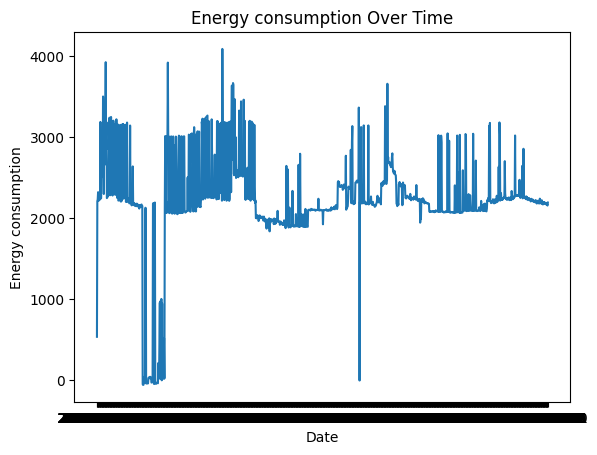

In [ ]:
plt.plot(df['Date'], df['Close'])
plt.xlabel('Date')
plt.ylabel('Energy consumption')
plt.title('Energy consumption Over Time')
plt.show()

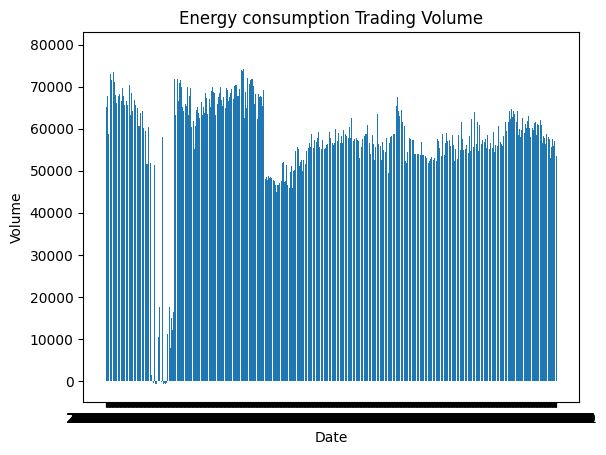

In [ ]:
plt.bar(df['Date'], df['Volume'])
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Energy consumption Trading Volume')
plt.show()

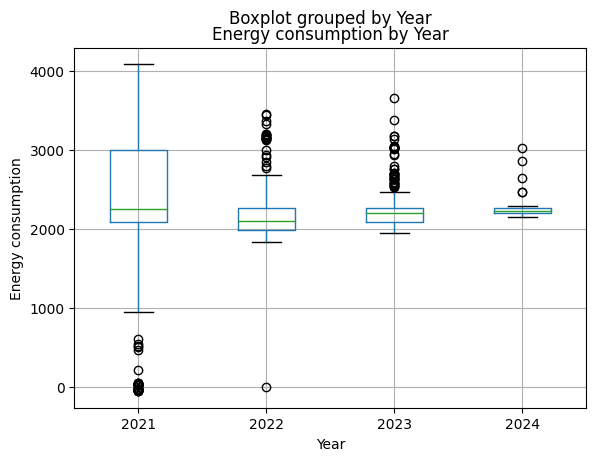

In [ ]:
df['Year'] = pd.to_datetime(df['Date']).dt.year
df.boxplot(column='Close', by='Year')
plt.xlabel('Year')
plt.ylabel('Energy consumption')
plt.title('Energy consumption by Year')
plt.show()

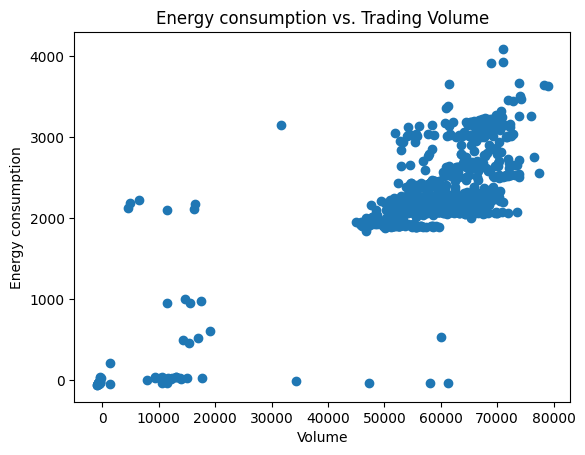

In [ ]:
plt.scatter(df['Volume'], df['Close'])
plt.xlabel('Volume')
plt.ylabel('Energy consumption')
plt.title('Energy consumption vs. Trading Volume')
plt.show()

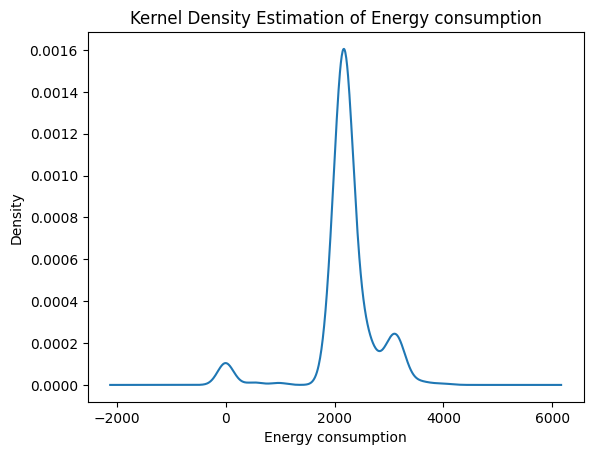

In [ ]:
df['Close'].plot.kde()
plt.xlabel('Energy consumption')
plt.title('Kernel Density Estimation of Energy consumption')
plt.show()

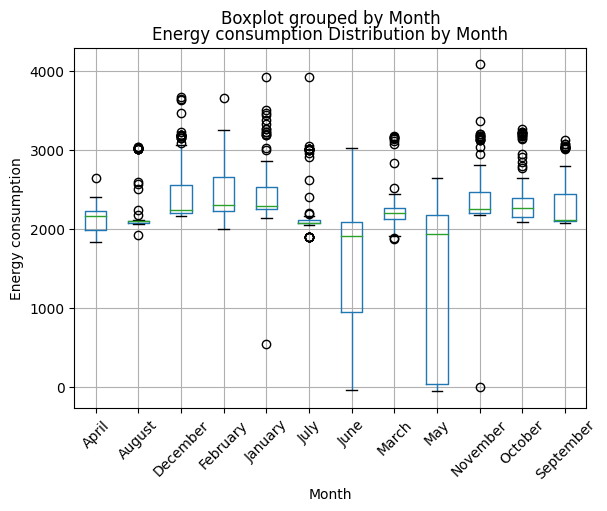

In [ ]:
df['Month'] = pd.to_datetime(df['Date']).dt.month_name()
df.boxplot(column='Close', by='Month', rot=45)
plt.xlabel('Month')
plt.ylabel('Energy consumption')
plt.title('Energy consumption Distribution by Month')
plt.show()


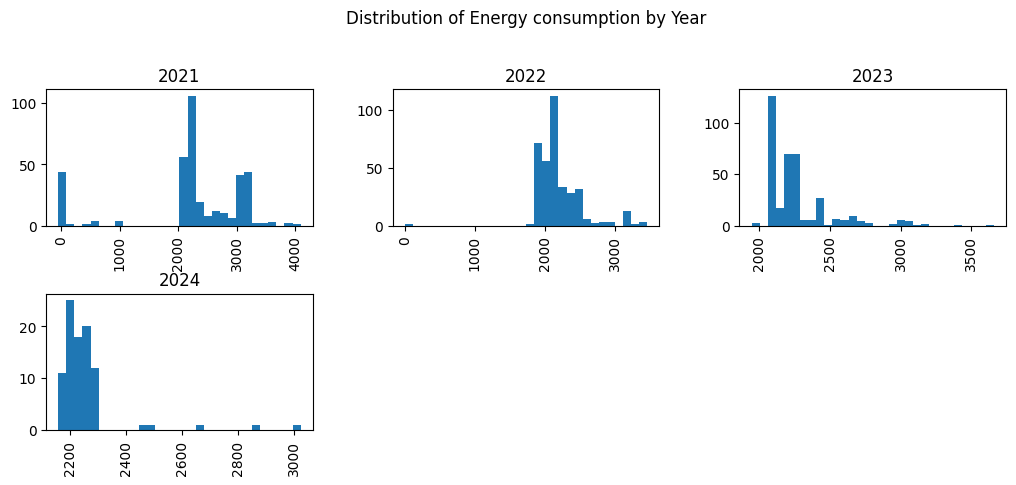

In [ ]:
df['Year'] = pd.to_datetime(df['Date']).dt.year
df.hist(column='Close', by='Year', bins=30, layout=(4,3), figsize=(12, 10))
plt.xlabel('Energy consumption')
plt.ylabel('Frequency')
plt.suptitle('Distribution of Energy consumption by Year')
plt.show()

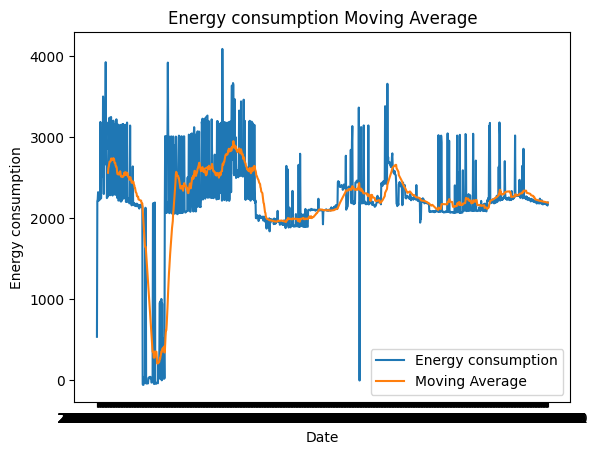

In [ ]:
df['Moving Average'] = df['Close'].rolling(window=30).mean()
plt.plot(df['Date'], df['Close'], label='Energy consumption')
plt.plot(df['Date'], df['Moving Average'], label='Moving Average')
plt.xlabel('Date')
plt.ylabel('Energy consumption')
plt.title('Energy consumption Moving Average')
plt.legend()
plt.show()

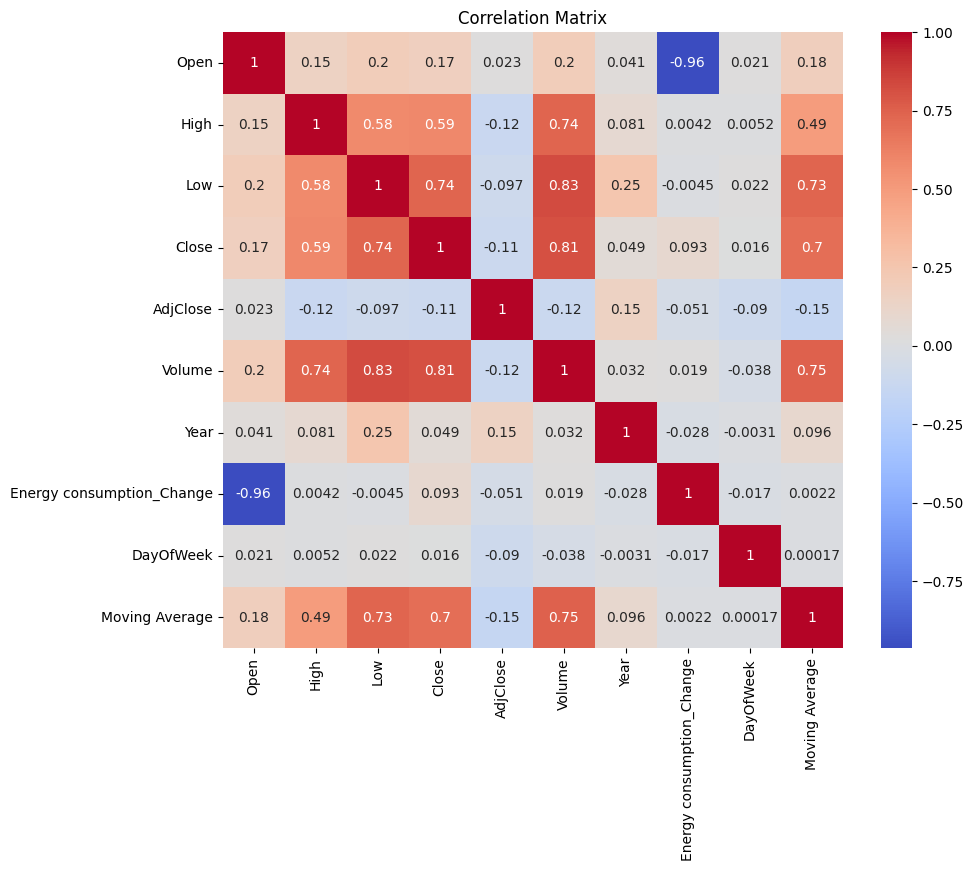

In [ ]:
# Identify non-numeric columns
non_numeric_columns = df.select_dtypes(exclude=['number']).columns

# Drop non-numeric columns from DataFrame
df_numeric = df.drop(columns=non_numeric_columns)

# Calculate correlation matrix using the cleaned DataFrame
correlation_matrix = df_numeric.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

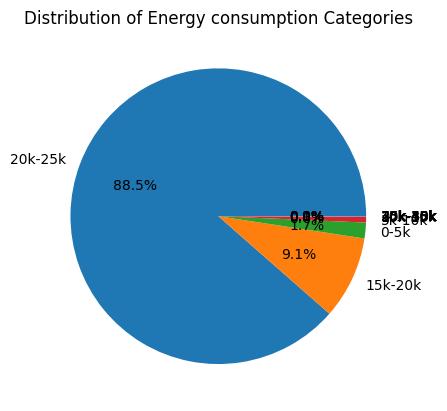

In [ ]:
df['Category'] = pd.cut(df['Close'], bins=[0, 500, 1000, 1500, 2000, 25000, 30000, 35000, 40000, 45000, 50000], labels=['0-5k', '5k-10k', '10k-15k', '15k-20k', '20k-25k', '25k-30k', '30k-35k', '35k-40k', '40k-45k', '45k-50k'])
category_counts = df['Category'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Energy consumption Categories')
plt.show()

In [ ]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
Date                          0
Open                          0
High                          0
Low                           0
Close                         0
AdjClose                      0
Volume                        0
Year                          0
Month                         0
Energy consumption_Change     0
DayOfWeek                     0
IsWeekend                     0
Moving Average               29
Category                     27
dtype: int64


In [ ]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
# Extract year, month, and day from 'Date' column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [ ]:
# Check for duplicate rows
print("Duplicate Rows:", df.duplicated().sum())

Duplicate Rows: 0


In [ ]:
# Check for outliers in 'Close' column
Q1 = df['Close'].quantile(0.25)
Q3 = df['Close'].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df['Close'] < Q1 - 1.5 * IQR) | (df['Close'] > Q3 + 1.5 * IQR))
print("Outliers:", outliers.sum())

Outliers: 197


In [ ]:
# Remove outliers
df = df[~outliers]

In [ ]:
# Normalize 'Close' column using Min-Max scaling
df['Close'] = (df['Close'] - df['Close'].min()) / (df['Close'].max() - df['Close'].min())

<ipython-input-42-08a2b3890964>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Close'] = (df['Close'] - df['Close'].min()) / (df['Close'].max() - df['Close'].min())


In [ ]:
# Step 4: Feature Engineering

# Calculate the daily percentage change in Bitcoin price
df['Energy_consumption_Change'] = df['Close'].pct_change()

# Calculate the 7-day rolling mean of the Bitcoin price
df['Rolling_Mean'] = df['Close'].rolling(window=7).mean()

# Calculate the exponential moving average of the Bitcoin price
df['EMA'] = df['Close'].ewm(span=30, adjust=False).mean()

# Calculate the lagged variables
df['Lagged_Price_1'] = df['Close'].shift(1)
df['Lagged_Price_7'] = df['Close'].shift(7)

# Drop rows with missing values after feature engineering
df = df.dropna()

# Check the updated dataset
print(df.head())

         Date     Open     High      Low     Close  AdjClose    Volume  Year  \
29 2021-01-30  2265.70  3235.18  2262.11  0.456922    753.54  66701.57  2021   
30 2021-01-31  2265.57  3251.11  2256.55  0.457389    711.40  68048.24  2021   
31 2021-02-01  2284.93  3263.44  2275.63  0.921586   4230.86  71831.94  2021   
34 2021-02-04  2300.91  3251.36  2273.75  0.469715    767.56  68009.06  2021   
35 2021-02-05  2287.62  3236.09  2282.42  0.463822    758.79  66355.61  2021   

    Month  Energy consumption_Change  DayOfWeek  IsWeekend  Moving Average  \
29      1                      13.86          5       True     2562.633667   
30      1                      14.44          6       True     2620.671667   
31      2                     441.73          0      False     2637.828000   
34      2                      -9.04          3      False     2700.069333   
35      2                      -1.42          4      False     2701.474333   

   Category  Day  Energy_consumption_Change  Rolli

<ipython-input-43-a595e87a1b89>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Energy_consumption_Change'] = df['Close'].pct_change()
<ipython-input-43-a595e87a1b89>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rolling_Mean'] = df['Close'].rolling(window=7).mean()
<ipython-input-43-a595e87a1b89>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Extract the features
features = df[['Open', 'High', 'Low', 'Close', 'Volume']].values

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply k-means clustering
num_clusters = 3  # Set the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add the cluster labels to the dataset
df['Cluster'] = clusters

# View the clusters
print(df[['Date', 'Close', 'Cluster']])

           Date     Close  Cluster
29   2021-01-30  0.456922        0
30   2021-01-31  0.457389        0
31   2021-02-01  0.921586        0
34   2021-02-04  0.469715        0
35   2021-02-05  0.463822        0
...         ...       ...      ...
1182 2024-03-27  0.351476        1
1183 2024-03-28  0.360923        1
1184 2024-03-29  0.348566        1
1185 2024-03-30  0.330690        1
1186 2024-03-31  0.369341        1

[971 rows x 3 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


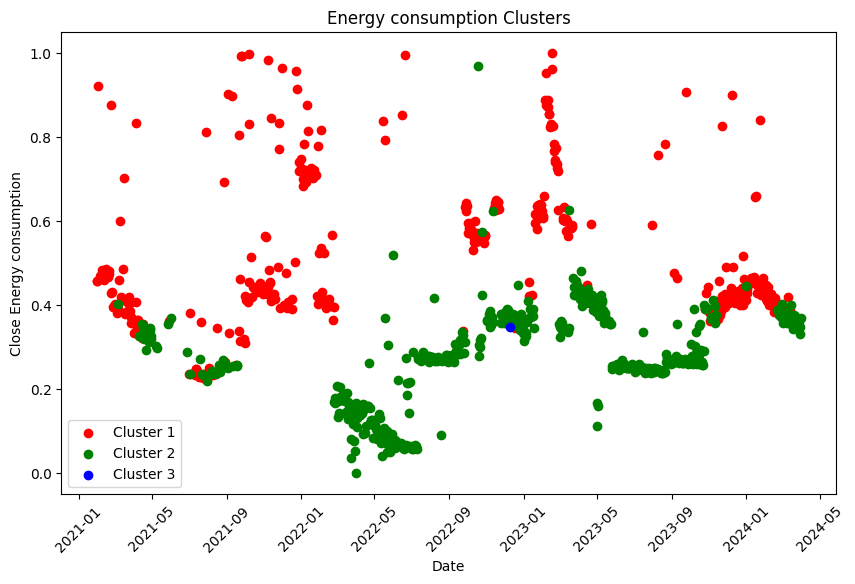

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Extract the features
features = df[['Open', 'High', 'Low', 'Close', 'Volume']].values

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply k-means clustering
num_clusters = 3  # Set the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add the cluster labels to the dataset
df['Cluster'] = clusters

# Plotting the clusters
plt.figure(figsize=(10, 6))
colors = ['red', 'green', 'blue']  # Assign colors to clusters

# Scatter plot for each cluster
for cluster_id in range(num_clusters):
    cluster_data = df[df['Cluster'] == cluster_id]
    plt.scatter(cluster_data['Date'], cluster_data['Close'], color=colors[cluster_id], label=f'Cluster {cluster_id+1}')

plt.title('Energy consumption Clusters')
plt.xlabel('Date')
plt.ylabel('Close Energy consumption')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [ ]:
#LSTM MODEL

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv('data.csv')

# Normalize the 'Close' column
scaler = MinMaxScaler(feature_range=(0, 1))
data['Close'] = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Convert the 'Close' column to a numpy array
prices = data['Close'].values

# Define the function to create the LSTM model
def create_lstm_model(window_size):
    model = Sequential()
    model.add(LSTM(50, input_shape=(window_size, 1)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Define the function to train and evaluate the LSTM model
def train_and_evaluate(prices, window_size, num_days_ahead):
    X, y = [], []
    for i in range(len(prices) - window_size - num_days_ahead):
        X.append(prices[i:i+window_size])
        y.append(prices[i+window_size+num_days_ahead])
    X = np.array(X)
    y = np.array(y)

    split_index = int(0.8 * len(X))
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]

    model = create_lstm_model(window_size)
    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Denormalize the predictions
    train_predictions = scaler.inverse_transform(train_predictions)
    test_predictions = scaler.inverse_transform(test_predictions)
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Calculate accuracy
    train_accuracy = model.evaluate(X_train, y_train, verbose=0)
    test_accuracy = model.evaluate(X_test, y_test, verbose=0)

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    # Calculate MSE
    train_mse = mean_squared_error(y_train, train_predictions)
    test_mse = mean_squared_error(y_test, test_predictions)

    # Calculate MAPE
    train_mape = np.mean(np.abs((y_train - train_predictions) / y_train)) * 100
    test_mape = np.mean(np.abs((y_test - test_predictions) / y_test)) * 100

    return train_accuracy, test_accuracy, train_rmse, test_rmse, train_mse, test_mse, train_mape, test_mape

# Define the window size and number of days ahead for prediction
window_size = 7
num_days_ahead = 7

# Train and evaluate the LSTM model
train_accuracy, test_accuracy, train_rmse, test_rmse, train_mse, test_mse, train_mape, test_mape = train_and_evaluate(prices, window_size, num_days_ahead)

# Print the results
print("Model Accuracy")
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

print("\nRoot Mean Squared Error (RMSE)")
print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

print("\nMean Squared Error (MSE)")
print("Train MSE:", train_mse)
print("Test MSE:", test_mse)

print("\nMean Absolute Percentage Error (MAPE)")
print("Train MAPE:", train_mape)
print("Test MAPE:", test_mape)

Epoch 1/100
30/30 [==============================] - 2s 5ms/step - loss: 0.0590
Epoch 2/100
30/30 [==============================] - 0s 5ms/step - loss: 0.0142
Epoch 3/100
30/30 [==============================] - 0s 5ms/step - loss: 0.0133
Epoch 4/100
30/30 [==============================] - 0s 5ms/step - loss: 0.0133
Epoch 5/100
30/30 [==============================] - 0s 5ms/step - loss: 0.0133
Epoch 6/100
30/30 [==============================] - 0s 5ms/step - loss: 0.0133
Epoch 7/100
30/30 [==============================] - 0s 5ms/step - loss: 0.0132
Epoch 8/100
30/30 [==============================] - 0s 5ms/step - loss: 0.0133
Epoch 9/100
30/30 [==============================] - 0s 5ms/step - loss: 0.0131
Epoch 10/100
30/30 [==============================] - 0s 5ms/step - loss: 0.0134
Epoch 11/100
30/30 [==============================] - 0s 5ms/step - loss: 0.0136
Epoch 12/100
30/30 [==============================] - 0s 5ms/step - loss: 0.0133
Epoch 13/100
30/30 [=================

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load the dataset
data = pd.read_csv('data.csv')

# Normalize the 'Close' column
scaler = MinMaxScaler(feature_range=(0, 1))
data['Close'] = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Convert the 'Close' column to a numpy array
prices = data['Close'].values

# Define the function to create the LSTM model
def create_lstm_model(window_size):
    model = Sequential()
    model.add(LSTM(50, input_shape=(window_size, 1)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Define the function to train and evaluate the LSTM model
def train_and_evaluate(prices, window_size, num_days_ahead):
    X, y = [], []
    for i in range(len(prices) - window_size - num_days_ahead):
        X.append(prices[i:i+window_size])
        y.append(prices[i+window_size+num_days_ahead])
    X = np.array(X)
    y = np.array(y)

    split_index = int(0.8 * len(X))
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]

    model = create_lstm_model(window_size)
    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Denormalize the predictions
    train_predictions = scaler.inverse_transform(train_predictions)
    test_predictions = scaler.inverse_transform(test_predictions)
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

    return model

# Define the window size and number of days ahead for prediction
window_size = 7
num_days_ahead = 7

# Train the LSTM model
model = train_and_evaluate(prices, window_size, num_days_ahead)

# Get the last window_size number of data points
last_window = prices[-window_size:].reshape(1, -1)

# Generate predictions for the next 30 days
predictions = []
for _ in range(30):
    next_day_prediction = model.predict(last_window)[0][0]
    predictions.append(next_day_prediction)
    last_window = np.append(last_window[:, 1:], [[next_day_prediction]], axis=1)

# Denormalize the predicted values
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Print the predicted values for the next 30 days
print("Predicted Energy consumption for the Next 30 Days:")
for i, prediction in enumerate(predictions):
    print(f"Day {i+1}: {prediction[0]}")

1/1 [==============================] - 0s 21ms/step
Predicted Energy consumption for the Next 30 Days:
Day 1: 2137.04833984375
Day 2: 2122.00439453125
Day 3: 2113.067138671875
Day 4: 2104.8505859375
Day 5: 2096.43310546875
Day 6: 2088.4267578125
Day 7: 2081.114501953125
Day 8: 2072.387451171875
Day 9: 2065.81396484375
Day 10: 2060.11962890625
Day 11: 2054.900146484375
Day 12: 2050.0693359375
Day 13: 2045.6202392578125
Day 14: 2041.537109375
Day 15: 2037.7913818359375
Day 16: 2034.4373779296875
Day 17: 2031.3966064453125
Day 18: 2028.62158203125
Day 19: 2026.089111328125
Day 20: 2023.7801513671875
Day 21: 2021.6763916015625
Day 22: 2019.7615966796875
Day 23: 2018.020751953125
Day 24: 2016.435546875
Day 25: 2014.9912109375
Day 26: 2013.6759033203125
Day 27: 2012.47802734375
Day 28: 2011.386474609375
Day 29: 2010.3931884765625
Day 30: 2009.488037109375


8/8 [==============================] - 0s 3ms/step


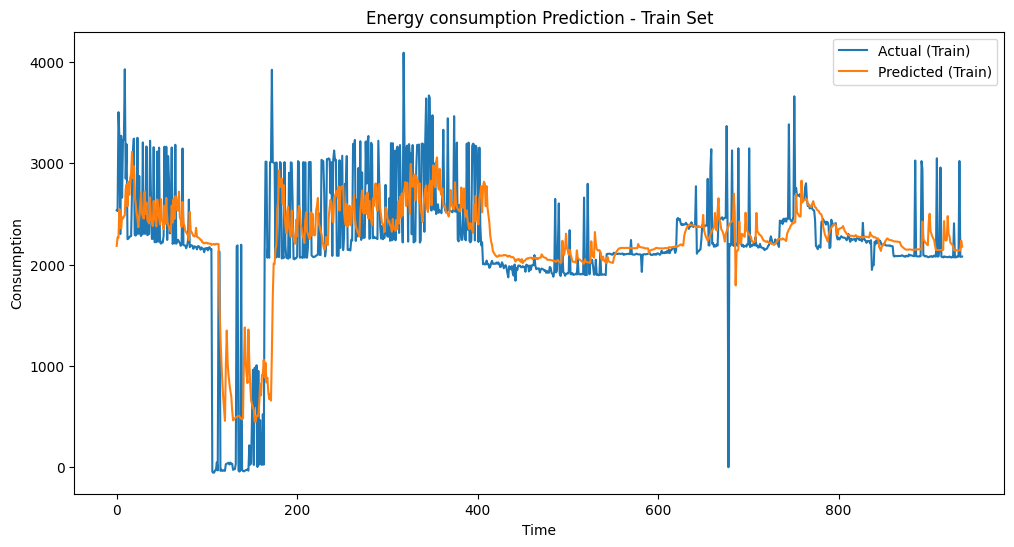

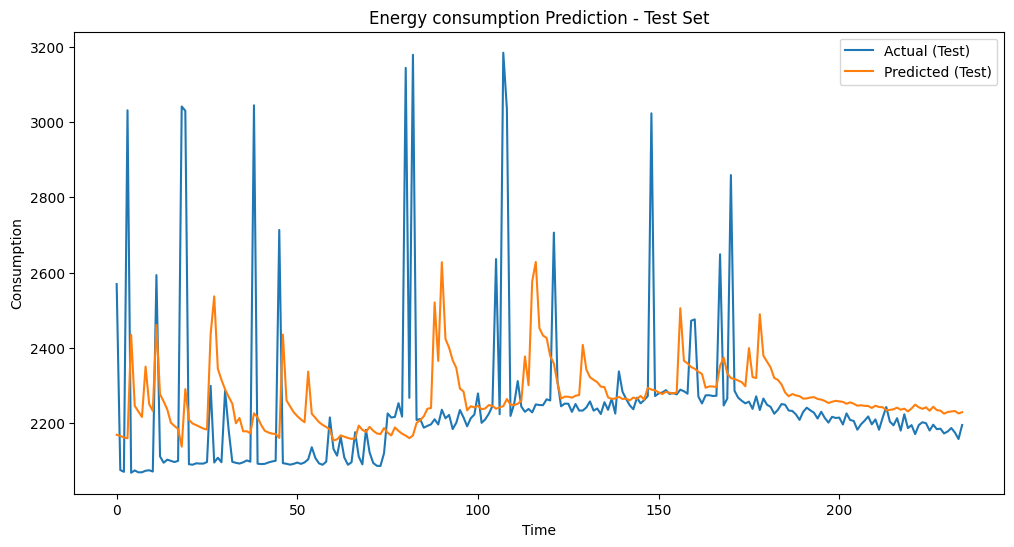

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load the dataset
data = pd.read_csv('data.csv')

# Normalize the 'Close' column
scaler = MinMaxScaler(feature_range=(0, 1))
data['Close'] = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Convert the 'Close' column to a numpy array
prices = data['Close'].values

# Define the function to create the LSTM model
def create_lstm_model(window_size):
    model = Sequential()
    model.add(LSTM(50, input_shape=(window_size, 1)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Define the function to train and evaluate the LSTM model
def train_and_evaluate(prices, window_size, num_days_ahead):
    X, y = [], []
    for i in range(len(prices) - window_size - num_days_ahead):
        X.append(prices[i:i+window_size])
        y.append(prices[i+window_size+num_days_ahead])
    X = np.array(X)
    y = np.array(y)

    split_index = int(0.8 * len(X))
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]

    model = create_lstm_model(window_size)
    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Denormalize the predictions
    train_predictions = scaler.inverse_transform(train_predictions)
    test_predictions = scaler.inverse_transform(test_predictions)
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

    return y_train, train_predictions, y_test, test_predictions

# Define the window size and number of days ahead for prediction
window_size = 7
num_days_ahead = 7

# Train and evaluate the LSTM model
y_train, train_predictions, y_test, test_predictions = train_and_evaluate(prices, window_size, num_days_ahead)

# Plot the graph for train set
plt.figure(figsize=(12, 6))
plt.plot(y_train, label='Actual (Train)')
plt.plot(train_predictions, label='Predicted (Train)')
plt.title('Energy consumption Prediction - Train Set')
plt.xlabel('Time')
plt.ylabel('Consumption')
plt.legend()
plt.show()

# Plot the graph for test set
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual (Test)')
plt.plot(test_predictions, label='Predicted (Test)')
plt.title('Energy consumption Prediction - Test Set')
plt.xlabel('Time')
plt.ylabel('Consumption')
plt.legend()
plt.show()

In [ ]:
#RNN MODEL

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv('data.csv')

# Normalize the 'Close' column
scaler = MinMaxScaler(feature_range=(0, 1))
data['Close'] = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Convert the 'Close' column to a numpy array
prices = data['Close'].values

# Define the function to create the RNN model
def create_rnn_model(window_size):
    model = Sequential()
    model.add(SimpleRNN(50, input_shape=(window_size, 1)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Define the function to train and evaluate the RNN model
def train_and_evaluate(prices, window_size, num_days_ahead):
    X, y = [], []
    for i in range(len(prices) - window_size - num_days_ahead):
        X.append(prices[i:i+window_size])
        y.append(prices[i+window_size+num_days_ahead])
    X = np.array(X)
    y = np.array(y)

    split_index = int(0.8 * len(X))
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]

    model = create_rnn_model(window_size)
    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Denormalize the predictions
    train_predictions = scaler.inverse_transform(train_predictions)
    test_predictions = scaler.inverse_transform(test_predictions)
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Calculate accuracy
    train_accuracy = model.evaluate(X_train, y_train, verbose=0)
    test_accuracy = model.evaluate(X_test, y_test, verbose=0)

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    # Calculate MSE
    train_mse = mean_squared_error(y_train, train_predictions)
    test_mse = mean_squared_error(y_test, test_predictions)

    # Calculate MAPE
    train_mape = np.mean(np.abs((y_train - train_predictions) / y_train)) * 100
    test_mape = np.mean(np.abs((y_test - test_predictions) / y_test)) * 100

    return train_accuracy, test_accuracy, train_rmse, test_rmse, train_mse, test_mse, train_mape, test_mape

# Define the window size and number of days ahead for prediction
window_size = 7
num_days_ahead = 7

# Train and evaluate the RNN model
train_accuracy, test_accuracy, train_rmse, test_rmse, train_mse, test_mse, train_mape, test_mape = train_and_evaluate(prices, window_size, num_days_ahead)

# Print the results
print("Model Accuracy")
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

print("\nRoot Mean Squared Error (RMSE)")
print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

print("\nMean Squared Error (MSE)")
print("Train MSE:", train_mse)
print("Test MSE:", test_mse)

print("\nMean Absolute Percentage Error (MAPE)")
print("Train MAPE:", train_mape)
print("Test MAPE:", test_mape)

Epoch 1/100
30/30 [==============================] - 2s 4ms/step - loss: 0.1659
Epoch 2/100
30/30 [==============================] - 0s 3ms/step - loss: 0.0225
Epoch 3/100
30/30 [==============================] - 0s 3ms/step - loss: 0.0169
Epoch 4/100
30/30 [==============================] - 0s 3ms/step - loss: 0.0160
Epoch 5/100
30/30 [==============================] - 0s 7ms/step - loss: 0.0154
Epoch 6/100
30/30 [==============================] - 0s 7ms/step - loss: 0.0145
Epoch 7/100
30/30 [==============================] - 0s 9ms/step - loss: 0.0142
Epoch 8/100
30/30 [==============================] - 0s 8ms/step - loss: 0.0139
Epoch 9/100
30/30 [==============================] - 0s 9ms/step - loss: 0.0138
Epoch 10/100
30/30 [==============================] - 0s 10ms/step - loss: 0.0140
Epoch 11/100
30/30 [==============================] - 0s 7ms/step - loss: 0.0137
Epoch 12/100
30/30 [==============================] - 0s 7ms/step - loss: 0.0137
Epoch 13/100
30/30 [================

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Load the dataset
data = pd.read_csv('data.csv')

# Normalize the 'Close' column
scaler = MinMaxScaler(feature_range=(0, 1))
data['Close'] = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Convert the 'Close' column to a numpy array
prices = data['Close'].values

# Define the function to create the RNN model
def create_rnn_model(window_size):
    model = Sequential()
    model.add(SimpleRNN(50, input_shape=(window_size, 1)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Define the function to train and evaluate the RNN model
def train_and_evaluate(prices, window_size, num_days_ahead):
    X, y = [], []
    for i in range(len(prices) - window_size - num_days_ahead):
        X.append(prices[i:i+window_size])
        y.append(prices[i+window_size+num_days_ahead])
    X = np.array(X)
    y = np.array(y)

    split_index = int(0.8 * len(X))
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]

    model = create_rnn_model(window_size)
    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Denormalize the predictions
    train_predictions = scaler.inverse_transform(train_predictions)
    test_predictions = scaler.inverse_transform(test_predictions)
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

    return model

# Define the window size and number of days ahead for prediction
window_size = 7
num_days_ahead = 7

# Train the RNN model
model = train_and_evaluate(prices, window_size, num_days_ahead)

# Get the last window_size number of data points
last_window = prices[-window_size:].reshape(1, -1)

# Generate predictions for the next 30 days
predictions = []
for _ in range(30):
    next_day_prediction = model.predict(last_window)[0][0]
    predictions.append(next_day_prediction)
    last_window = np.append(last_window[:, 1:], [[next_day_prediction]], axis=1)

# Denormalize the predicted values
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Print the predicted values for the next 30 days
print("Predicted Energy consumption for the Next 30 Days:")
for i, prediction in enumerate(predictions):
    print(f"Day {i+1}: {prediction[0]}")

1/1 [==============================] - 0s 20ms/step
Predicted Energy consumption for the Next 30 Days:
Day 1: 2149.431884765625
Day 2: 2136.380615234375
Day 3: 2130.778564453125
Day 4: 2123.33837890625
Day 5: 2119.751708984375
Day 6: 2114.053955078125
Day 7: 2109.87841796875
Day 8: 2103.421875
Day 9: 2098.611328125
Day 10: 2094.922119140625
Day 11: 2091.485595703125
Day 12: 2088.572998046875
Day 13: 2085.736572265625
Day 14: 2083.1376953125
Day 15: 2080.71484375
Day 16: 2078.577392578125
Day 17: 2076.70068359375
Day 18: 2075.005615234375
Day 19: 2073.478271484375
Day 20: 2072.08447265625
Day 21: 2070.819580078125
Day 22: 2069.677734375
Day 23: 2068.6513671875
Day 24: 2067.7275390625
Day 25: 2066.89404296875
Day 26: 2066.140869140625
Day 27: 2065.459716796875
Day 28: 2064.8447265625
Day 29: 2064.289306640625
Day 30: 2063.787841796875


8/8 [==============================] - 0s 2ms/step


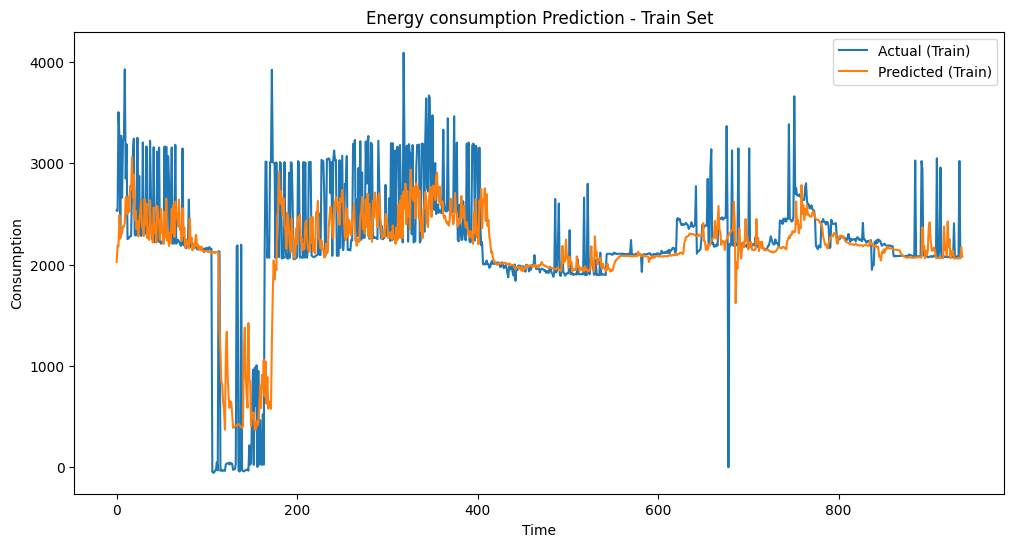

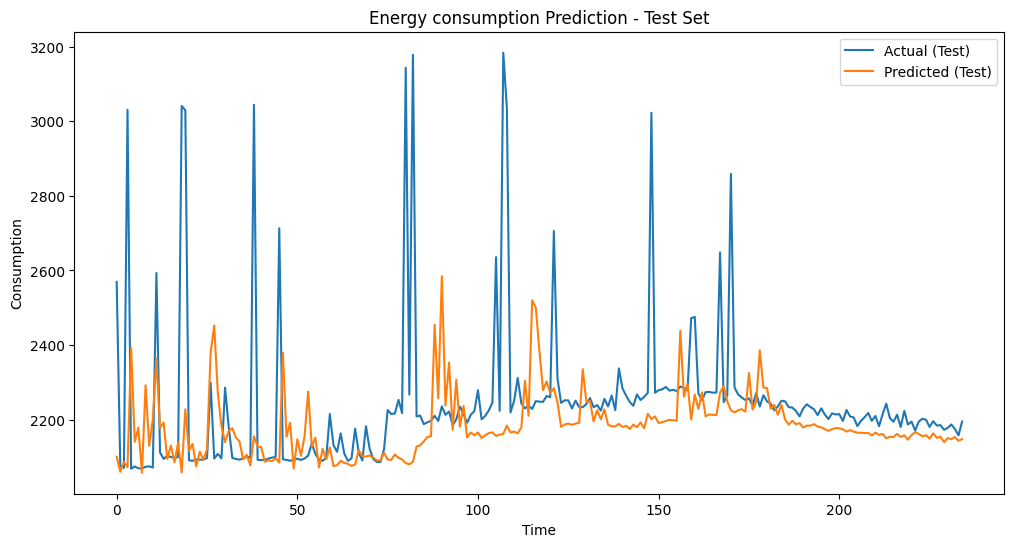

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Load the dataset
data = pd.read_csv('data.csv')

# Normalize the 'Close' column
scaler = MinMaxScaler(feature_range=(0, 1))
data['Close'] = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Convert the 'Close' column to a numpy array
prices = data['Close'].values

# Define the function to create the RNN model
def create_rnn_model(window_size):
    model = Sequential()
    model.add(SimpleRNN(50, input_shape=(window_size, 1)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Define the function to train and evaluate the RNN model
def train_and_evaluate(prices, window_size, num_days_ahead):
    X, y = [], []
    for i in range(len(prices) - window_size - num_days_ahead):
        X.append(prices[i:i+window_size])
        y.append(prices[i+window_size+num_days_ahead])
    X = np.array(X)
    y = np.array(y)

    split_index = int(0.8 * len(X))
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]

    model = create_rnn_model(window_size)
    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Denormalize the predictions
    train_predictions = scaler.inverse_transform(train_predictions)
    test_predictions = scaler.inverse_transform(test_predictions)
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

    return y_train, train_predictions, y_test, test_predictions

# Define the window size and number of days ahead for prediction
window_size = 7
num_days_ahead = 7

# Train and evaluate the RNN model
y_train, train_predictions, y_test, test_predictions = train_and_evaluate(prices, window_size, num_days_ahead)

# Plot the graph for train set
plt.figure(figsize=(12, 6))
plt.plot(y_train, label='Actual (Train)')
plt.plot(train_predictions, label='Predicted (Train)')
plt.title('Energy consumption Prediction - Train Set')
plt.xlabel('Time')
plt.ylabel('Consumption')
plt.legend()
plt.show()

# Plot the graph for test set
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual (Test)')
plt.plot(test_predictions, label='Predicted (Test)')
plt.title('Energy consumption Prediction - Test Set')
plt.xlabel('Time')
plt.ylabel('Consumption')
plt.legend()
plt.show()

In [ ]:
#LSTM WITH GWO MODEL

In [ ]:
!pip install pyswarm

  Preparing metadata (setup.py) ... done
  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4464 sha256=c83833b76943da91c20f883207e69431a3a164f701523fc5ba3ad954cdcc4a65
  Stored in directory: /root/.cache/pip/wheels/71/67/40/62fa158f497f942277cbab8199b05cb61c571ab324e67ad0d6
Successfully built pyswarm


Epoch 1/5
49/49 [==============================] - 3s 14ms/step - loss: 0.0654
Epoch 2/5
49/49 [==============================] - 1s 11ms/step - loss: 0.0119
Epoch 3/5
49/49 [==============================] - 1s 11ms/step - loss: 0.0118
Epoch 4/5
49/49 [==============================] - 1s 11ms/step - loss: 0.0113
Epoch 5/5
49/49 [==============================] - 1s 11ms/step - loss: 0.0111
Epoch 1/5
49/49 [==============================] - 3s 11ms/step - loss: 0.0111
Epoch 2/5
49/49 [==============================] - 1s 12ms/step - loss: 0.0111
Epoch 3/5
49/49 [==============================] - 1s 11ms/step - loss: 0.0106
Epoch 4/5
49/49 [==============================] - 1s 12ms/step - loss: 0.0107
Epoch 5/5
49/49 [==============================] - 1s 11ms/step - loss: 0.0108
Epoch 1/5
49/49 [==============================] - 3s 17ms/step - loss: 0.0104
Epoch 2/5
49/49 [==============================] - 1s 16ms/step - loss: 0.0103
Epoch 3/5
49/49 [==============================] - 1

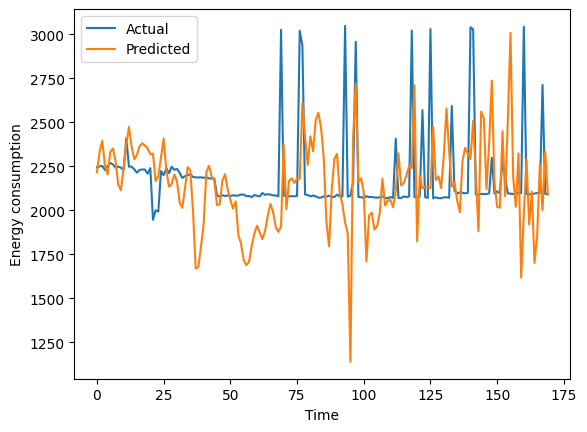

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import math


# Load the dataset
dataset = pd.read_csv('data.csv')
dataset = dataset[:1000]  # Reduce dataset to 1000 values

# Preprocessing
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset['Close'].values.reshape(-1, 1))

# Split data into train and test sets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Function to create input features and target variable
def create_dataset(data, time_steps=1):
    X, Y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps), 0])
        Y.append(data[i + time_steps, 0])
    return np.array(X), np.array(Y)

# Define time steps and create train/test datasets
time_steps = 30
X_train, Y_train = create_dataset(train_data, time_steps)
X_test, Y_test = create_dataset(test_data, time_steps)

# Reshape input features for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=32, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))

# Define the objective function for GWO
def objective_function(params):
    lr, decay = params
    model.compile(optimizer='adam', loss='mean_squared_error')
    history = model.fit(X_train, Y_train, epochs=5, batch_size=16, verbose=1)
    mse = history.history['loss'][-1]
    return mse

# Define the GWO algorithm
class GreyWolfOptimizer:
    def __init__(self, objective_function, lb, ub, dim, population_size, iterations):
        self.objective_function = objective_function
        self.lb = lb
        self.ub = ub
        self.dim = dim
        self.population_size = population_size
        self.iterations = iterations

    def initialize_population(self):
        return np.random.uniform(low=self.lb, high=self.ub, size=(self.population_size, self.dim))

    def search(self):
        alpha_pos = np.zeros(self.dim)
        alpha_score = float("inf")
        beta_pos = np.zeros(self.dim)
        beta_score = float("inf")
        delta_pos = np.zeros(self.dim)
        delta_score = float("inf")
        positions = self.initialize_population()
        convergence_curve = np.zeros(self.iterations)

        for iteration in range(self.iterations):
            for i in range(self.population_size):
                # Update alpha, beta, and delta positions
                if self.objective_function(positions[i]) < alpha_score:
                    delta_score = beta_score
                    delta_pos = beta_pos.copy()
                    beta_score = alpha_score
                    beta_pos = alpha_pos.copy()
                    alpha_score = self.objective_function(positions[i])
                    alpha_pos = positions[i].copy()
                elif self.objective_function(positions[i]) < beta_score:
                    delta_score = beta_score
                    delta_pos = beta_pos.copy()
                    beta_score = self.objective_function(positions[i])
                    beta_pos = positions[i].copy()
                elif self.objective_function(positions[i]) < delta_score:
                    delta_score = self.objective_function(positions[i])
                    delta_pos = positions[i].copy()

                # Update positions
                a = 2 - (iteration * (2 / self.iterations))
                r1 = np.random.random(self.dim)
                r2 = np.random.random(self.dim)
                A1 = 2 * a * r1 - a
                C1 = 2 * r2
                D_alpha = np.abs(C1 * alpha_pos - positions[i])
                X1 = alpha_pos - A1 * D_alpha

                r1 = np.random.random(self.dim)
                r2 = np.random.random(self.dim)
                A2 = 2 * a * r1 - a
                C2 = 2 * r2
                D_beta = np.abs(C2 * beta_pos - positions[i])
                X2 = beta_pos - A2 * D_beta

                r1 = np.random.random(self.dim)
                r2 = np.random.random(self.dim)
                A3 = 2 * a * r1 - a
                C3 = 2 * r2
                D_delta = np.abs(C3 * delta_pos - positions[i])
                X3 = delta_pos - A3 * D_delta

                positions[i] = (X1 + X2 + X3) / 3

            convergence_curve[iteration] = alpha_score

        return alpha_pos, alpha_score, convergence_curve

# Define the bounds, dimension, population size, and number of iterations for GWO
lb = [0.0001, 0.0001]
ub = [0.1, 0.9]
dim = 2
population_size = 10
iterations = 10

# Create an instance of GreyWolfOptimizer and perform the search
gwo = GreyWolfOptimizer(objective_function, lb, ub, dim, population_size, iterations)
alpha_pos, alpha_score, convergence_curve = gwo.search()

# Compile the model with optimal parameters
lr_opt = alpha_pos[0]
decay_opt = alpha_pos[1]
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model with optimal parameters
model.fit(X_train, Y_train, epochs=5, batch_size=16, verbose=2)

# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Rescale the predictions
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)
Y_train = scaler.inverse_transform([Y_train])
Y_test = scaler.inverse_transform([Y_test])

# Calculate evaluation metrics
train_rmse = math.sqrt(mean_squared_error(Y_train[0], train_predictions[:, 0]))
test_rmse = math.sqrt(mean_squared_error(Y_test[0], test_predictions[:, 0]))
train_mse = mean_squared_error(Y_train[0], train_predictions[:, 0])
test_mse = mean_squared_error(Y_test[0], test_predictions[:, 0])
train_mape = mean_absolute_percentage_error(Y_train[0], train_predictions[:, 0])
test_mape = mean_absolute_percentage_error(Y_test[0], test_predictions[:, 0])

# Print evaluation metrics
print('Train RMSE:', train_rmse)
print('Test RMSE:', test_rmse)
print('Train MSE:', train_mse)
print('Test MSE:', test_mse)
print('Train MAPE:', train_mape)
print('Test MAPE:', test_mape)

# Plot the predictions
plt.plot(Y_test[0], label='Actual')
plt.plot(test_predictions[:, 0], label='Predicted')
plt.xlabel('Time')
plt.ylabel('Energy consumption')
plt.legend()
plt.show()

In [ ]:
#RNN WITH GWO MODEL

Epoch 1/5
49/49 [==============================] - 2s 9ms/step - loss: 0.0206
Epoch 2/5
49/49 [==============================] - 0s 8ms/step - loss: 0.0103
Epoch 3/5
49/49 [==============================] - 0s 8ms/step - loss: 0.0100
Epoch 4/5
49/49 [==============================] - 0s 9ms/step - loss: 0.0100
Epoch 5/5
49/49 [==============================] - 0s 9ms/step - loss: 0.0103
Epoch 1/5
49/49 [==============================] - 1s 6ms/step - loss: 0.0108
Epoch 2/5
49/49 [==============================] - 0s 6ms/step - loss: 0.0114
Epoch 3/5
49/49 [==============================] - 0s 7ms/step - loss: 0.0098
Epoch 4/5
49/49 [==============================] - 0s 6ms/step - loss: 0.0097
Epoch 5/5
49/49 [==============================] - 0s 6ms/step - loss: 0.0102
Epoch 1/5
49/49 [==============================] - 1s 6ms/step - loss: 0.0099
Epoch 2/5
49/49 [==============================] - 0s 6ms/step - loss: 0.0099
Epoch 3/5
49/49 [==============================] - 0s 5ms/step -

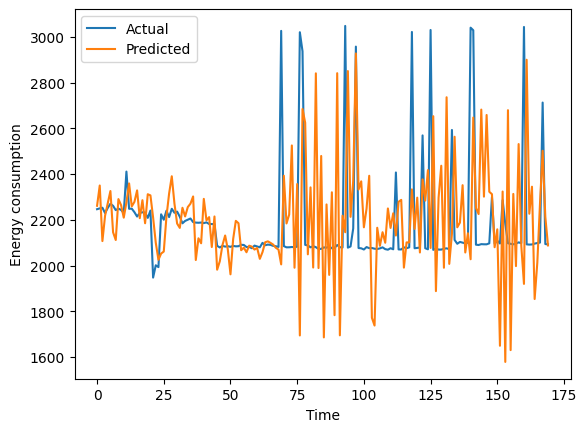

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import math


# Load the dataset
dataset = pd.read_csv('data.csv')
dataset = dataset[:1000]  # Reduce dataset to 1000 values

# Preprocessing
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset['Close'].values.reshape(-1, 1))

# Split data into train and test sets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Function to create input features and target variable
def create_dataset(data, time_steps=1):
    X, Y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps), 0])
        Y.append(data[i + time_steps, 0])
    return np.array(X), np.array(Y)

# Define time steps and create train/test datasets
time_steps = 30
X_train, Y_train = create_dataset(train_data, time_steps)
X_test, Y_test = create_dataset(test_data, time_steps)

# Reshape input features for RNN
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Define the RNN model
model = Sequential()
model.add(SimpleRNN(units=32, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))

# Define the objective function for GWO
def objective_function(params):
    lr, decay = params
    model.compile(optimizer='adam', loss='mean_squared_error')
    history = model.fit(X_train, Y_train, epochs=5, batch_size=16, verbose=1)
    mse = history.history['loss'][-1]
    return mse

# Define the GWO algorithm
class GreyWolfOptimizer:
    def __init__(self, objective_function, lb, ub, dim, population_size, iterations):
        self.objective_function = objective_function
        self.lb = lb
        self.ub = ub
        self.dim = dim
        self.population_size = population_size
        self.iterations = iterations

    def initialize_population(self):
        return np.random.uniform(low=self.lb, high=self.ub, size=(self.population_size, self.dim))

    def search(self):
        alpha_pos = np.zeros(self.dim)
        alpha_score = float("inf")
        beta_pos = np.zeros(self.dim)
        beta_score = float("inf")
        delta_pos = np.zeros(self.dim)
        delta_score = float("inf")
        positions = self.initialize_population()
        convergence_curve = np.zeros(self.iterations)

        for iteration in range(self.iterations):
            for i in range(self.population_size):
                # Update alpha, beta, and delta positions
                if self.objective_function(positions[i]) < alpha_score:
                    delta_score = beta_score
                    delta_pos = beta_pos.copy()
                    beta_score = alpha_score
                    beta_pos = alpha_pos.copy()
                    alpha_score = self.objective_function(positions[i])
                    alpha_pos = positions[i].copy()
                elif self.objective_function(positions[i]) < beta_score:
                    delta_score = beta_score
                    delta_pos = beta_pos.copy()
                    beta_score = self.objective_function(positions[i])
                    beta_pos = positions[i].copy()
                elif self.objective_function(positions[i]) < delta_score:
                    delta_score = self.objective_function(positions[i])
                    delta_pos = positions[i].copy()

                # Update positions
                a = 2 - (iteration * (2 / self.iterations))
                r1 = np.random.random(self.dim)
                r2 = np.random.random(self.dim)
                A1 = 2 * a * r1 - a
                C1 = 2 * r2
                D_alpha = np.abs(C1 * alpha_pos - positions[i])
                X1 = alpha_pos - A1 * D_alpha

                r1 = np.random.random(self.dim)
                r2 = np.random.random(self.dim)
                A2 = 2 * a * r1 - a
                C2 = 2 * r2
                D_beta = np.abs(C2 * beta_pos - positions[i])
                X2 = beta_pos - A2 * D_beta

                r1 = np.random.random(self.dim)
                r2 = np.random.random(self.dim)
                A3 = 2 * a * r1 - a
                C3 = 2 * r2
                D_delta = np.abs(C3 * delta_pos - positions[i])
                X3 = delta_pos - A3 * D_delta

                positions[i] = (X1 + X2 + X3) / 3

            convergence_curve[iteration] = alpha_score

        return alpha_pos, alpha_score, convergence_curve

# Define the bounds, dimension, population size, and number of iterations for GWO
lb = [0.0001, 0.0001]
ub = [0.1, 0.9]
dim = 2
population_size = 10
iterations = 10

# Create an instance of GreyWolfOptimizer and perform the search
gwo = GreyWolfOptimizer(objective_function, lb, ub, dim, population_size, iterations)
alpha_pos, alpha_score, convergence_curve = gwo.search()

# Compile the model with optimal parameters
lr_opt = alpha_pos[0]
decay_opt = alpha_pos[1]
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model with optimal parameters
model.fit(X_train, Y_train, epochs=5, batch_size=16, verbose=2)

# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Rescale the predictions
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)
Y_train = scaler.inverse_transform([Y_train])
Y_test = scaler.inverse_transform([Y_test])

# Calculate evaluation metrics
train_rmse = math.sqrt(mean_squared_error(Y_train[0], train_predictions[:, 0]))
test_rmse = math.sqrt(mean_squared_error(Y_test[0], test_predictions[:, 0]))
train_mse = mean_squared_error(Y_train[0], train_predictions[:, 0])
test_mse = mean_squared_error(Y_test[0], test_predictions[:, 0])
train_mape = mean_absolute_percentage_error(Y_train[0], train_predictions[:, 0])
test_mape = mean_absolute_percentage_error(Y_test[0], test_predictions[:, 0])

# Print evaluation metrics
print('Train RMSE:', train_rmse)
print('Test RMSE:', test_rmse)
print('Train MSE:', train_mse)
print('Test MSE:', test_mse)
print('Train MAPE:', train_mape)
print('Test MAPE:', test_mape)

# Plot the predictions
plt.plot(Y_test[0], label='Actual')
plt.plot(test_predictions[:, 0], label='Predicted')
plt.xlabel('Time')
plt.ylabel('Energy consumption')
plt.legend()
plt.show()


In [ ]:
#LSTM WITH PSO MODEL

In [ ]:
!pip install pyswarms

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 2.2 MB/s eta 0:00:00


2024-04-22 09:19:04,388 - pyswarms.single.global_best - INFO - Optimize for 50 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best:   0%|          |0/50<ipython-input-69-faec3f9b0e69>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lstm_units = int(position[0]) + 1


Epoch 1/5
49/49 [==============================] - 5s 16ms/step - loss: 0.8815
Epoch 2/5
49/49 [==============================] - 1s 17ms/step - loss: 0.6422
Epoch 3/5
49/49 [==============================] - 1s 19ms/step - loss: 0.4489
Epoch 4/5
49/49 [==============================] - 1s 17ms/step - loss: 0.3038
Epoch 5/5
25/25 [==============================] - 2s 12ms/step


pyswarms.single.global_best:   2%|▏         |1/50, best_cost=1.69e+3<ipython-input-69-faec3f9b0e69>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lstm_units = int(position[0]) + 1


Epoch 1/5
49/49 [==============================] - 4s 10ms/step - loss: 0.3621
Epoch 2/5
49/49 [==============================] - 1s 11ms/step - loss: 0.2458
Epoch 3/5
49/49 [==============================] - 0s 10ms/step - loss: 0.1640
Epoch 4/5
49/49 [==============================] - 1s 11ms/step - loss: 0.0934
Epoch 5/5
25/25 [==============================] - 1s 3ms/step


pyswarms.single.global_best:   4%|▍         |2/50, best_cost=656<ipython-input-69-faec3f9b0e69>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lstm_units = int(position[0]) + 1


Epoch 1/5
49/49 [==============================] - 2s 10ms/step - loss: 0.4745
Epoch 2/5
49/49 [==============================] - 1s 10ms/step - loss: 0.2721
Epoch 3/5
49/49 [==============================] - 1s 14ms/step - loss: 0.1280
Epoch 4/5
49/49 [==============================] - 1s 15ms/step - loss: 0.0430
Epoch 5/5
25/25 [==============================] - 1s 4ms/step


pyswarms.single.global_best:   6%|▌         |3/50, best_cost=656<ipython-input-69-faec3f9b0e69>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lstm_units = int(position[0]) + 1


Epoch 1/5
49/49 [==============================] - 3s 10ms/step - loss: 0.3368
Epoch 2/5
49/49 [==============================] - 1s 10ms/step - loss: 0.1298
Epoch 3/5
49/49 [==============================] - 1s 11ms/step - loss: 0.0342
Epoch 4/5
49/49 [==============================] - 1s 11ms/step - loss: 0.0159
Epoch 5/5
25/25 [==============================] - 1s 4ms/step


pyswarms.single.global_best:   8%|▊         |4/50, best_cost=505<ipython-input-69-faec3f9b0e69>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lstm_units = int(position[0]) + 1


Epoch 1/5
49/49 [==============================] - 3s 16ms/step - loss: 0.0299
Epoch 2/5
49/49 [==============================] - 1s 17ms/step - loss: 0.0125
Epoch 3/5
49/49 [==============================] - 1s 11ms/step - loss: 0.0118
Epoch 4/5
49/49 [==============================] - 1s 11ms/step - loss: 0.0113
Epoch 5/5
25/25 [==============================] - 1s 3ms/step


pyswarms.single.global_best:  10%|█         |5/50, best_cost=433<ipython-input-69-faec3f9b0e69>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lstm_units = int(position[0]) + 1


Epoch 1/5
49/49 [==============================] - 3s 11ms/step - loss: 0.1573
Epoch 2/5
49/49 [==============================] - 1s 10ms/step - loss: 0.0205
Epoch 3/5
49/49 [==============================] - 1s 11ms/step - loss: 0.0153
Epoch 4/5
49/49 [==============================] - 1s 11ms/step - loss: 0.0143
Epoch 5/5
25/25 [==============================] - 1s 3ms/step


pyswarms.single.global_best:  12%|█▏        |6/50, best_cost=433<ipython-input-69-faec3f9b0e69>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lstm_units = int(position[0]) + 1


Epoch 1/5
49/49 [==============================] - 3s 10ms/step - loss: 0.6812
Epoch 2/5
49/49 [==============================] - 1s 11ms/step - loss: 0.3917
Epoch 3/5
49/49 [==============================] - 1s 10ms/step - loss: 0.2448
Epoch 4/5
49/49 [==============================] - 1s 11ms/step - loss: 0.1114
Epoch 5/5
25/25 [==============================] - 1s 3ms/step


pyswarms.single.global_best:  14%|█▍        |7/50, best_cost=433<ipython-input-69-faec3f9b0e69>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lstm_units = int(position[0]) + 1


Epoch 1/5
49/49 [==============================] - 3s 11ms/step - loss: 0.1628
Epoch 2/5
49/49 [==============================] - 1s 11ms/step - loss: 0.0432
Epoch 3/5
49/49 [==============================] - 1s 11ms/step - loss: 0.0157
Epoch 4/5
49/49 [==============================] - 1s 11ms/step - loss: 0.0138
Epoch 5/5
25/25 [==============================] - 1s 5ms/step


pyswarms.single.global_best:  16%|█▌        |8/50, best_cost=433<ipython-input-69-faec3f9b0e69>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lstm_units = int(position[0]) + 1


Epoch 1/5
49/49 [==============================] - 2s 10ms/step - loss: 1.0279
Epoch 2/5
49/49 [==============================] - 1s 11ms/step - loss: 0.4962
Epoch 3/5
49/49 [==============================] - 1s 11ms/step - loss: 0.1440
Epoch 4/5
49/49 [==============================] - 1s 11ms/step - loss: 0.0382
Epoch 5/5
25/25 [==============================] - 1s 3ms/step


pyswarms.single.global_best:  18%|█▊        |9/50, best_cost=433<ipython-input-69-faec3f9b0e69>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lstm_units = int(position[0]) + 1


Epoch 1/5
49/49 [==============================] - 3s 11ms/step - loss: 0.3571
Epoch 2/5
49/49 [==============================] - 1s 11ms/step - loss: 0.1456
Epoch 3/5
49/49 [==============================] - 1s 11ms/step - loss: 0.0329
Epoch 4/5
49/49 [==============================] - 1s 16ms/step - loss: 0.0253
Epoch 5/5
25/25 [==============================] - 1s 3ms/step


pyswarms.single.global_best:  20%|██        |10/50, best_cost=433<ipython-input-69-faec3f9b0e69>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lstm_units = int(position[0]) + 1


Epoch 1/5
49/49 [==============================] - 3s 10ms/step - loss: 0.1296
Epoch 2/5
49/49 [==============================] - 0s 10ms/step - loss: 0.0339
Epoch 3/5
49/49 [==============================] - 1s 10ms/step - loss: 0.0228
Epoch 4/5
49/49 [==============================] - 1s 10ms/step - loss: 0.0196
Epoch 5/5
25/25 [==============================] - 1s 4ms/step


pyswarms.single.global_best:  22%|██▏       |11/50, best_cost=433<ipython-input-69-faec3f9b0e69>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lstm_units = int(position[0]) + 1


Epoch 1/5
49/49 [==============================] - 2s 10ms/step - loss: 0.0858
Epoch 2/5
49/49 [==============================] - 1s 12ms/step - loss: 0.0194
Epoch 3/5
49/49 [==============================] - 1s 15ms/step - loss: 0.0134
Epoch 4/5
49/49 [==============================] - 1s 15ms/step - loss: 0.0126
Epoch 5/5
25/25 [==============================] - 1s 3ms/step


pyswarms.single.global_best:  24%|██▍       |12/50, best_cost=433<ipython-input-69-faec3f9b0e69>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lstm_units = int(position[0]) + 1


Epoch 1/5
49/49 [==============================] - 2s 10ms/step - loss: 0.1347
Epoch 2/5
49/49 [==============================] - 1s 10ms/step - loss: 0.0449
Epoch 3/5
49/49 [==============================] - 1s 11ms/step - loss: 0.0133
Epoch 4/5
49/49 [==============================] - 1s 11ms/step - loss: 0.0120
Epoch 5/5
25/25 [==============================] - 1s 4ms/step


pyswarms.single.global_best:  26%|██▌       |13/50, best_cost=433<ipython-input-69-faec3f9b0e69>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lstm_units = int(position[0]) + 1


Epoch 1/5
49/49 [==============================] - 3s 11ms/step - loss: 0.0400
Epoch 2/5
49/49 [==============================] - 1s 10ms/step - loss: 0.0136
Epoch 3/5
49/49 [==============================] - 1s 11ms/step - loss: 0.0129
Epoch 4/5
49/49 [==============================] - 1s 16ms/step - loss: 0.0124
Epoch 5/5
25/25 [==============================] - 1s 5ms/step


pyswarms.single.global_best:  28%|██▊       |14/50, best_cost=433<ipython-input-69-faec3f9b0e69>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lstm_units = int(position[0]) + 1


Epoch 1/5
49/49 [==============================] - 2s 10ms/step - loss: 0.0229
Epoch 2/5
49/49 [==============================] - 0s 10ms/step - loss: 0.0103
Epoch 3/5
49/49 [==============================] - 1s 10ms/step - loss: 0.0101
Epoch 4/5
49/49 [==============================] - 0s 10ms/step - loss: 0.0100
Epoch 5/5
25/25 [==============================] - 1s 4ms/step


pyswarms.single.global_best:  30%|███       |15/50, best_cost=412<ipython-input-69-faec3f9b0e69>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lstm_units = int(position[0]) + 1


Epoch 1/5
49/49 [==============================] - 2s 10ms/step - loss: 0.6773
Epoch 2/5
49/49 [==============================] - 1s 10ms/step - loss: 0.2965
Epoch 3/5
49/49 [==============================] - 1s 10ms/step - loss: 0.0511
Epoch 4/5
49/49 [==============================] - 1s 10ms/step - loss: 0.0301
Epoch 5/5
25/25 [==============================] - 1s 4ms/step


pyswarms.single.global_best:  32%|███▏      |16/50, best_cost=412<ipython-input-69-faec3f9b0e69>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lstm_units = int(position[0]) + 1


Epoch 1/5
49/49 [==============================] - 3s 10ms/step - loss: 0.0119
Epoch 2/5
49/49 [==============================] - 1s 11ms/step - loss: 0.0104
Epoch 3/5
49/49 [==============================] - 1s 10ms/step - loss: 0.0102
Epoch 4/5
49/49 [==============================] - 1s 11ms/step - loss: 0.0102
Epoch 5/5
25/25 [==============================] - 1s 4ms/step


pyswarms.single.global_best:  34%|███▍      |17/50, best_cost=412<ipython-input-69-faec3f9b0e69>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lstm_units = int(position[0]) + 1


Epoch 1/5
49/49 [==============================] - 3s 10ms/step - loss: 0.5041
Epoch 2/5
49/49 [==============================] - 1s 11ms/step - loss: 0.2213
Epoch 3/5
49/49 [==============================] - 1s 11ms/step - loss: 0.0616
Epoch 4/5
49/49 [==============================] - 1s 11ms/step - loss: 0.0223
Epoch 5/5
25/25 [==============================] - 1s 3ms/step


pyswarms.single.global_best:  36%|███▌      |18/50, best_cost=412<ipython-input-69-faec3f9b0e69>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lstm_units = int(position[0]) + 1


Epoch 1/5
49/49 [==============================] - 2s 11ms/step - loss: 0.0469
Epoch 2/5
49/49 [==============================] - 1s 10ms/step - loss: 0.0156
Epoch 3/5
49/49 [==============================] - 1s 10ms/step - loss: 0.0143
Epoch 4/5
49/49 [==============================] - 1s 10ms/step - loss: 0.0135
Epoch 5/5
25/25 [==============================] - 1s 4ms/step


pyswarms.single.global_best:  38%|███▊      |19/50, best_cost=412<ipython-input-69-faec3f9b0e69>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lstm_units = int(position[0]) + 1


Epoch 1/5
49/49 [==============================] - 2s 11ms/step - loss: 0.3477
Epoch 2/5
49/49 [==============================] - 1s 15ms/step - loss: 0.1713
Epoch 3/5
49/49 [==============================] - 1s 14ms/step - loss: 0.0378
Epoch 4/5
49/49 [==============================] - 1s 14ms/step - loss: 0.0216
Epoch 5/5
25/25 [==============================] - 1s 4ms/step


pyswarms.single.global_best:  40%|████      |20/50, best_cost=412<ipython-input-69-faec3f9b0e69>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lstm_units = int(position[0]) + 1


Epoch 1/5
49/49 [==============================] - 3s 11ms/step - loss: 0.3773
Epoch 2/5
49/49 [==============================] - 1s 11ms/step - loss: 0.1943
Epoch 3/5
49/49 [==============================] - 1s 11ms/step - loss: 0.0460
Epoch 4/5
49/49 [==============================] - 1s 10ms/step - loss: 0.0174
Epoch 5/5
25/25 [==============================] - 1s 4ms/step


pyswarms.single.global_best:  42%|████▏     |21/50, best_cost=412<ipython-input-69-faec3f9b0e69>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lstm_units = int(position[0]) + 1


Epoch 1/5
49/49 [==============================] - 2s 10ms/step - loss: 0.2117
Epoch 2/5
49/49 [==============================] - 0s 10ms/step - loss: 0.0741
Epoch 3/5
49/49 [==============================] - 1s 24ms/step - loss: 0.0252
Epoch 4/5
49/49 [==============================] - 2s 33ms/step - loss: 0.0179
Epoch 5/5
25/25 [==============================] - 1s 4ms/step


pyswarms.single.global_best:  44%|████▍     |22/50, best_cost=412<ipython-input-69-faec3f9b0e69>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lstm_units = int(position[0]) + 1


Epoch 1/5
49/49 [==============================] - 2s 10ms/step - loss: 0.2233
Epoch 2/5
49/49 [==============================] - 1s 11ms/step - loss: 0.0836
Epoch 3/5
49/49 [==============================] - 1s 11ms/step - loss: 0.0389
Epoch 4/5
49/49 [==============================] - 1s 11ms/step - loss: 0.0262
Epoch 5/5
25/25 [==============================] - 0s 3ms/step


pyswarms.single.global_best:  46%|████▌     |23/50, best_cost=412<ipython-input-69-faec3f9b0e69>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lstm_units = int(position[0]) + 1


Epoch 1/5
49/49 [==============================] - 3s 14ms/step - loss: 0.2279
Epoch 2/5
49/49 [==============================] - 0s 10ms/step - loss: 0.0626
Epoch 3/5
49/49 [==============================] - 1s 11ms/step - loss: 0.0210
Epoch 4/5
49/49 [==============================] - 0s 10ms/step - loss: 0.0198
Epoch 5/5
25/25 [==============================] - 0s 4ms/step


pyswarms.single.global_best:  48%|████▊     |24/50, best_cost=412<ipython-input-69-faec3f9b0e69>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lstm_units = int(position[0]) + 1


Epoch 1/5
49/49 [==============================] - 2s 10ms/step - loss: 0.0803
Epoch 2/5
49/49 [==============================] - 0s 10ms/step - loss: 0.0166
Epoch 3/5
49/49 [==============================] - 1s 10ms/step - loss: 0.0123
Epoch 4/5
49/49 [==============================] - 1s 11ms/step - loss: 0.0119
Epoch 5/5
25/25 [==============================] - 1s 5ms/step


pyswarms.single.global_best:  50%|█████     |25/50, best_cost=412<ipython-input-69-faec3f9b0e69>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lstm_units = int(position[0]) + 1


Epoch 1/5
49/49 [==============================] - 3s 10ms/step - loss: 0.0283
Epoch 2/5
49/49 [==============================] - 1s 11ms/step - loss: 0.0105
Epoch 3/5
49/49 [==============================] - 1s 11ms/step - loss: 0.0103
Epoch 4/5
49/49 [==============================] - 1s 11ms/step - loss: 0.0102
Epoch 5/5
25/25 [==============================] - 1s 4ms/step


pyswarms.single.global_best:  52%|█████▏    |26/50, best_cost=412<ipython-input-69-faec3f9b0e69>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lstm_units = int(position[0]) + 1


Epoch 1/5
49/49 [==============================] - 2s 11ms/step - loss: 0.2876
Epoch 2/5
49/49 [==============================] - 1s 15ms/step - loss: 0.0518
Epoch 3/5
49/49 [==============================] - 1s 15ms/step - loss: 0.0198
Epoch 4/5
49/49 [==============================] - 1s 15ms/step - loss: 0.0190
Epoch 5/5
25/25 [==============================] - 1s 3ms/step


pyswarms.single.global_best:  54%|█████▍    |27/50, best_cost=412<ipython-input-69-faec3f9b0e69>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lstm_units = int(position[0]) + 1


Epoch 1/5
49/49 [==============================] - 3s 11ms/step - loss: 0.3769
Epoch 2/5
49/49 [==============================] - 1s 10ms/step - loss: 0.1145
Epoch 3/5
49/49 [==============================] - 1s 11ms/step - loss: 0.0217
Epoch 4/5
49/49 [==============================] - 1s 11ms/step - loss: 0.0150
Epoch 5/5
25/25 [==============================] - 0s 4ms/step


pyswarms.single.global_best:  56%|█████▌    |28/50, best_cost=412<ipython-input-69-faec3f9b0e69>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lstm_units = int(position[0]) + 1


Epoch 1/5
49/49 [==============================] - 3s 16ms/step - loss: 0.4136
Epoch 2/5
49/49 [==============================] - 1s 11ms/step - loss: 0.1491
Epoch 3/5
49/49 [==============================] - 1s 11ms/step - loss: 0.0282
Epoch 4/5
49/49 [==============================] - 1s 11ms/step - loss: 0.0167
Epoch 5/5
25/25 [==============================] - 1s 4ms/step


pyswarms.single.global_best:  58%|█████▊    |29/50, best_cost=412<ipython-input-69-faec3f9b0e69>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lstm_units = int(position[0]) + 1


Epoch 1/5
49/49 [==============================] - 3s 11ms/step - loss: 0.1889
Epoch 2/5
49/49 [==============================] - 1s 11ms/step - loss: 0.0345
Epoch 3/5
49/49 [==============================] - 1s 11ms/step - loss: 0.0157
Epoch 4/5
49/49 [==============================] - 1s 11ms/step - loss: 0.0147
Epoch 5/5
25/25 [==============================] - 1s 4ms/step


pyswarms.single.global_best:  60%|██████    |30/50, best_cost=412<ipython-input-69-faec3f9b0e69>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lstm_units = int(position[0]) + 1


Epoch 1/5
49/49 [==============================] - 3s 11ms/step - loss: 0.0161
Epoch 2/5
49/49 [==============================] - 1s 11ms/step - loss: 0.0141
Epoch 3/5
49/49 [==============================] - 1s 11ms/step - loss: 0.0131
Epoch 4/5
49/49 [==============================] - 1s 10ms/step - loss: 0.0126
Epoch 5/5
25/25 [==============================] - 1s 4ms/step


pyswarms.single.global_best:  62%|██████▏   |31/50, best_cost=412<ipython-input-69-faec3f9b0e69>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lstm_units = int(position[0]) + 1


Epoch 1/5
49/49 [==============================] - 3s 11ms/step - loss: 0.0208
Epoch 2/5
49/49 [==============================] - 1s 10ms/step - loss: 0.0107
Epoch 3/5
49/49 [==============================] - 1s 11ms/step - loss: 0.0102
Epoch 4/5
49/49 [==============================] - 1s 10ms/step - loss: 0.0099
Epoch 5/5
25/25 [==============================] - 0s 4ms/step


pyswarms.single.global_best:  64%|██████▍   |32/50, best_cost=410<ipython-input-69-faec3f9b0e69>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lstm_units = int(position[0]) + 1


Epoch 1/5
49/49 [==============================] - 3s 10ms/step - loss: 0.1811
Epoch 2/5
49/49 [==============================] - 1s 10ms/step - loss: 0.0482
Epoch 3/5
49/49 [==============================] - 0s 10ms/step - loss: 0.0241
Epoch 4/5
49/49 [==============================] - 1s 12ms/step - loss: 0.0197
Epoch 5/5
25/25 [==============================] - 1s 5ms/step


pyswarms.single.global_best:  66%|██████▌   |33/50, best_cost=410<ipython-input-69-faec3f9b0e69>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lstm_units = int(position[0]) + 1


Epoch 1/5
49/49 [==============================] - 3s 11ms/step - loss: 0.5472
Epoch 2/5
49/49 [==============================] - 1s 11ms/step - loss: 0.2887
Epoch 3/5
49/49 [==============================] - 1s 11ms/step - loss: 0.1393
Epoch 4/5
49/49 [==============================] - 1s 11ms/step - loss: 0.0636
Epoch 5/5
25/25 [==============================] - 1s 4ms/step


pyswarms.single.global_best:  68%|██████▊   |34/50, best_cost=410<ipython-input-69-faec3f9b0e69>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lstm_units = int(position[0]) + 1


Epoch 1/5
49/49 [==============================] - 3s 10ms/step - loss: 0.1892
Epoch 2/5
49/49 [==============================] - 0s 10ms/step - loss: 0.0583
Epoch 3/5
49/49 [==============================] - 1s 10ms/step - loss: 0.0162
Epoch 4/5
49/49 [==============================] - 1s 10ms/step - loss: 0.0150
Epoch 5/5
25/25 [==============================] - 1s 4ms/step


pyswarms.single.global_best:  70%|███████   |35/50, best_cost=410<ipython-input-69-faec3f9b0e69>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lstm_units = int(position[0]) + 1


Epoch 1/5
49/49 [==============================] - 3s 11ms/step - loss: 0.1550
Epoch 2/5
49/49 [==============================] - 1s 11ms/step - loss: 0.0350
Epoch 3/5
49/49 [==============================] - 1s 10ms/step - loss: 0.0168
Epoch 4/5
49/49 [==============================] - 1s 11ms/step - loss: 0.0160
Epoch 5/5
25/25 [==============================] - 0s 4ms/step


pyswarms.single.global_best:  72%|███████▏  |36/50, best_cost=410<ipython-input-69-faec3f9b0e69>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lstm_units = int(position[0]) + 1


Epoch 1/5
49/49 [==============================] - 3s 11ms/step - loss: 0.1050
Epoch 2/5
49/49 [==============================] - 1s 11ms/step - loss: 0.0285
Epoch 3/5
49/49 [==============================] - 1s 11ms/step - loss: 0.0165
Epoch 4/5
49/49 [==============================] - 1s 11ms/step - loss: 0.0150
Epoch 5/5
25/25 [==============================] - 1s 4ms/step


pyswarms.single.global_best:  74%|███████▍  |37/50, best_cost=410<ipython-input-69-faec3f9b0e69>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lstm_units = int(position[0]) + 1


Epoch 1/5
49/49 [==============================] - 3s 10ms/step - loss: 0.2057
Epoch 2/5
49/49 [==============================] - 1s 11ms/step - loss: 0.0804
Epoch 3/5
49/49 [==============================] - 0s 10ms/step - loss: 0.0317
Epoch 4/5
49/49 [==============================] - 1s 11ms/step - loss: 0.0202
Epoch 5/5
25/25 [==============================] - 1s 3ms/step


pyswarms.single.global_best:  76%|███████▌  |38/50, best_cost=410<ipython-input-69-faec3f9b0e69>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lstm_units = int(position[0]) + 1


Epoch 1/5
49/49 [==============================] - 3s 10ms/step - loss: 0.4206
Epoch 2/5
49/49 [==============================] - 1s 10ms/step - loss: 0.2285
Epoch 3/5
49/49 [==============================] - 1s 10ms/step - loss: 0.1059
Epoch 4/5
49/49 [==============================] - 1s 11ms/step - loss: 0.0435
Epoch 5/5
25/25 [==============================] - 1s 4ms/step


pyswarms.single.global_best:  78%|███████▊  |39/50, best_cost=410<ipython-input-69-faec3f9b0e69>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lstm_units = int(position[0]) + 1


Epoch 1/5
49/49 [==============================] - 3s 11ms/step - loss: 0.1247
Epoch 2/5
49/49 [==============================] - 1s 11ms/step - loss: 0.0378
Epoch 3/5
49/49 [==============================] - 1s 11ms/step - loss: 0.0186
Epoch 4/5
49/49 [==============================] - 1s 11ms/step - loss: 0.0153
Epoch 5/5
25/25 [==============================] - 1s 4ms/step


pyswarms.single.global_best:  80%|████████  |40/50, best_cost=410<ipython-input-69-faec3f9b0e69>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lstm_units = int(position[0]) + 1


Epoch 1/5
49/49 [==============================] - 3s 16ms/step - loss: 0.4641
Epoch 2/5
49/49 [==============================] - 1s 16ms/step - loss: 0.2468
Epoch 3/5
49/49 [==============================] - 1s 17ms/step - loss: 0.1276
Epoch 4/5
49/49 [==============================] - 1s 12ms/step - loss: 0.0561
Epoch 5/5
25/25 [==============================] - 1s 4ms/step


pyswarms.single.global_best:  82%|████████▏ |41/50, best_cost=410<ipython-input-69-faec3f9b0e69>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lstm_units = int(position[0]) + 1


Epoch 1/5
49/49 [==============================] - 3s 11ms/step - loss: 0.0836
Epoch 2/5
49/49 [==============================] - 1s 12ms/step - loss: 0.0133
Epoch 3/5
49/49 [==============================] - 1s 12ms/step - loss: 0.0127
Epoch 4/5
49/49 [==============================] - 1s 12ms/step - loss: 0.0123
Epoch 5/5
25/25 [==============================] - 1s 4ms/step


pyswarms.single.global_best:  84%|████████▍ |42/50, best_cost=410<ipython-input-69-faec3f9b0e69>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lstm_units = int(position[0]) + 1


Epoch 1/5
49/49 [==============================] - 3s 12ms/step - loss: 0.0235
Epoch 2/5
49/49 [==============================] - 1s 12ms/step - loss: 0.0115
Epoch 3/5
49/49 [==============================] - 1s 12ms/step - loss: 0.0112
Epoch 4/5
49/49 [==============================] - 1s 11ms/step - loss: 0.0109
Epoch 5/5
25/25 [==============================] - 1s 4ms/step


pyswarms.single.global_best:  86%|████████▌ |43/50, best_cost=410<ipython-input-69-faec3f9b0e69>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lstm_units = int(position[0]) + 1


Epoch 1/5
49/49 [==============================] - 3s 11ms/step - loss: 0.3093
Epoch 2/5
49/49 [==============================] - 1s 12ms/step - loss: 0.0766
Epoch 3/5
49/49 [==============================] - 1s 17ms/step - loss: 0.0229
Epoch 4/5
49/49 [==============================] - 1s 16ms/step - loss: 0.0156
Epoch 5/5
25/25 [==============================] - 1s 4ms/step


pyswarms.single.global_best:  88%|████████▊ |44/50, best_cost=410<ipython-input-69-faec3f9b0e69>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lstm_units = int(position[0]) + 1


Epoch 1/5
49/49 [==============================] - 3s 11ms/step - loss: 0.4756
Epoch 2/5
49/49 [==============================] - 1s 11ms/step - loss: 0.1289
Epoch 3/5
49/49 [==============================] - 1s 11ms/step - loss: 0.0377
Epoch 4/5
49/49 [==============================] - 1s 11ms/step - loss: 0.0286
Epoch 5/5
25/25 [==============================] - 1s 4ms/step


pyswarms.single.global_best:  90%|█████████ |45/50, best_cost=410<ipython-input-69-faec3f9b0e69>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lstm_units = int(position[0]) + 1


Epoch 1/5
49/49 [==============================] - 3s 11ms/step - loss: 0.9037
Epoch 2/5
49/49 [==============================] - 1s 11ms/step - loss: 0.5531
Epoch 3/5
49/49 [==============================] - 1s 11ms/step - loss: 0.2840
Epoch 4/5
49/49 [==============================] - 1s 11ms/step - loss: 0.1114
Epoch 5/5
25/25 [==============================] - 0s 4ms/step


pyswarms.single.global_best:  92%|█████████▏|46/50, best_cost=410<ipython-input-69-faec3f9b0e69>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lstm_units = int(position[0]) + 1


Epoch 1/5
49/49 [==============================] - 2s 11ms/step - loss: 0.3764
Epoch 2/5
49/49 [==============================] - 1s 11ms/step - loss: 0.1382
Epoch 3/5
49/49 [==============================] - 1s 12ms/step - loss: 0.0395
Epoch 4/5
49/49 [==============================] - 1s 16ms/step - loss: 0.0241
Epoch 5/5
25/25 [==============================] - 1s 5ms/step


pyswarms.single.global_best:  94%|█████████▍|47/50, best_cost=410<ipython-input-69-faec3f9b0e69>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lstm_units = int(position[0]) + 1


Epoch 1/5
49/49 [==============================] - 3s 11ms/step - loss: 0.5527
Epoch 2/5
49/49 [==============================] - 1s 10ms/step - loss: 0.2866
Epoch 3/5
49/49 [==============================] - 1s 11ms/step - loss: 0.1437
Epoch 4/5
49/49 [==============================] - 1s 11ms/step - loss: 0.0506
Epoch 5/5
25/25 [==============================] - 1s 4ms/step


pyswarms.single.global_best:  96%|█████████▌|48/50, best_cost=410<ipython-input-69-faec3f9b0e69>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lstm_units = int(position[0]) + 1


Epoch 1/5
49/49 [==============================] - 3s 16ms/step - loss: 0.2759
Epoch 2/5
49/49 [==============================] - 1s 16ms/step - loss: 0.1179
Epoch 3/5
49/49 [==============================] - 1s 14ms/step - loss: 0.0317
Epoch 4/5
49/49 [==============================] - 1s 11ms/step - loss: 0.0208
Epoch 5/5
25/25 [==============================] - 1s 3ms/step


pyswarms.single.global_best:  98%|█████████▊|49/50, best_cost=410<ipython-input-69-faec3f9b0e69>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lstm_units = int(position[0]) + 1


Epoch 1/5
49/49 [==============================] - 2s 11ms/step - loss: 0.0149
Epoch 2/5
49/49 [==============================] - 0s 10ms/step - loss: 0.0102
Epoch 3/5
49/49 [==============================] - 1s 11ms/step - loss: 0.0101
Epoch 4/5
49/49 [==============================] - 1s 11ms/step - loss: 0.0100
Epoch 5/5
25/25 [==============================] - 1s 3ms/step


pyswarms.single.global_best: 100%|██████████|50/50, best_cost=410
2024-04-22 09:25:14,090 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 409.50591994001417, best pos: [2.92902219]


Best Number of LSTM Units: 3
Epoch 1/5
49/49 - 3s - loss: 0.0700 - 3s/epoch - 65ms/step
Epoch 2/5
49/49 - 0s - loss: 0.0192 - 465ms/epoch - 9ms/step
Epoch 3/5
49/49 - 0s - loss: 0.0125 - 451ms/epoch - 9ms/step
Epoch 4/5
49/49 - 0s - loss: 0.0117 - 481ms/epoch - 10ms/step
Epoch 5/5
49/49 - 0s - loss: 0.0112 - 437ms/epoch - 9ms/step
6/6 [==============================] - 0s 5ms/step
Train RMSE: 435.29350929628816
Test RMSE: 243.40457981902432
Train MSE: 189480.4392354777
Test MSE: 59245.78947687578
Train MAPE: 6.722188035435892
Test MAPE: 0.07412775603915914


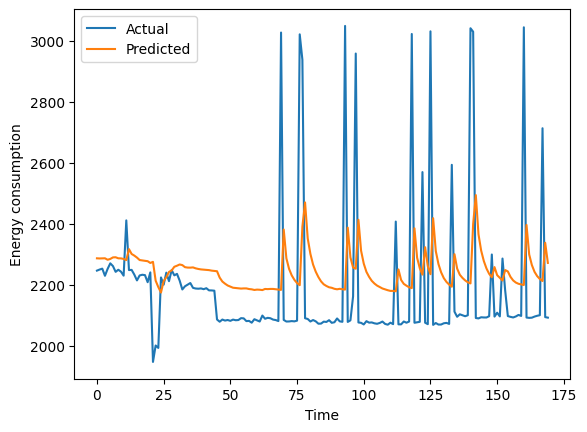

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import math
from pyswarms.single.global_best import GlobalBestPSO

# Load the dataset
dataset = pd.read_csv('data.csv')
dataset = dataset[:1000]  # Reduce dataset to 1000 values

# Preprocessing
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset['Close'].values.reshape(-1, 1))

# Split data into train and test sets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Function to create input features and target variable
def create_dataset(data, time_steps=1):
    X, Y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps), 0])
        Y.append(data[i + time_steps, 0])
    return np.array(X), np.array(Y)

# Define time steps and create train/test datasets
time_steps = 30
X_train, Y_train = create_dataset(train_data, time_steps)
X_test, Y_test = create_dataset(test_data, time_steps)

# Reshape input features for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Define the objective function for PSO
def objective_function(position):
    lstm_units = int(position[0]) + 1

    model = Sequential()
    model.add(LSTM(units=lstm_units, input_shape=(X_train.shape[1], 1)))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, Y_train, epochs=5, batch_size=16, verbose=1)

    train_predictions = model.predict(X_train)
    train_predictions = scaler.inverse_transform(train_predictions)
    Y_train_inverse = scaler.inverse_transform([Y_train])

    rmse = math.sqrt(mean_squared_error(Y_train_inverse[0], train_predictions[:, 0]))
    return rmse

# Configure the PSO optimizer
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
optimizer = GlobalBestPSO(n_particles=10, dimensions=1, options=options)

# Run the PSO optimization
best_cost, best_position = optimizer.optimize(objective_function, iters=50)

# Extract the best number of LSTM units from the best position found by PSO
best_lstm_units = int(best_position[0]) + 1

# Print the best number of LSTM units
print("Best Number of LSTM Units:", best_lstm_units)

# Build and train the LSTM model with the best number of units
model = Sequential()
model.add(LSTM(units=best_lstm_units, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, Y_train, epochs=5, batch_size=16, verbose=2)

# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Rescale the predictions
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)
Y_train_inverse = scaler.inverse_transform([Y_train])
Y_test_inverse = scaler.inverse_transform([Y_test])

# Calculate evaluation metrics
train_rmse = math.sqrt(mean_squared_error(Y_train_inverse[0], train_predictions[:, 0]))
test_rmse = math.sqrt(mean_squared_error(Y_test_inverse[0], test_predictions[:, 0]))
train_mse = mean_squared_error(Y_train_inverse[0], train_predictions[:, 0])
test_mse = mean_squared_error(Y_test_inverse[0], test_predictions[:, 0])
train_mape = mean_absolute_percentage_error(Y_train_inverse[0], train_predictions[:, 0])
test_mape = mean_absolute_percentage_error(Y_test_inverse[0], test_predictions[:, 0])

# Print evaluation metrics
print('Train RMSE:', train_rmse)
print('Test RMSE:', test_rmse)
print('Train MSE:', train_mse)
print('Test MSE:', test_mse)
print('Train MAPE:', train_mape)
print('Test MAPE:', test_mape)

# Plot the predictions
plt.plot(Y_test_inverse[0], label='Actual')
plt.plot(test_predictions[:, 0], label='Predicted')
plt.xlabel('Time')
plt.ylabel('Energy consumption')
plt.legend()
plt.show()


In [ ]:
#RNN WITH PSO

2024-04-22 10:08:00,501 - pyswarms.single.global_best - INFO - Optimize for 50 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best:   0%|          |0/50<ipython-input-70-41f954c21550>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  rnn_units = int(position[0]) + 1


Epoch 1/5
49/49 [==============================] - 3s 5ms/step - loss: 1.4559
Epoch 2/5
49/49 [==============================] - 0s 5ms/step - loss: 1.1607
Epoch 3/5
49/49 [==============================] - 0s 5ms/step - loss: 0.8582
Epoch 4/5
49/49 [==============================] - 0s 6ms/step - loss: 0.6387
Epoch 5/5
25/25 [==============================] - 0s 3ms/step


pyswarms.single.global_best:   2%|▏         |1/50, best_cost=3.02e+3

Epoch 1/5


<ipython-input-70-41f954c21550>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  rnn_units = int(position[0]) + 1


49/49 [==============================] - 1s 5ms/step - loss: 0.3105
Epoch 2/5
49/49 [==============================] - 0s 5ms/step - loss: 0.1855
Epoch 3/5
49/49 [==============================] - 0s 5ms/step - loss: 0.0787
Epoch 4/5
49/49 [==============================] - 0s 5ms/step - loss: 0.0358
Epoch 5/5
25/25 [==============================] - 0s 3ms/step


pyswarms.single.global_best:   4%|▍         |2/50, best_cost=733

Epoch 1/5


<ipython-input-70-41f954c21550>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  rnn_units = int(position[0]) + 1


49/49 [==============================] - 1s 5ms/step - loss: 2.3218
Epoch 2/5
49/49 [==============================] - 0s 5ms/step - loss: 0.8287
Epoch 3/5
49/49 [==============================] - 0s 5ms/step - loss: 0.0813
Epoch 4/5
49/49 [==============================] - 0s 5ms/step - loss: 0.0771
Epoch 5/5
25/25 [==============================] - 0s 3ms/step


pyswarms.single.global_best:   6%|▌         |3/50, best_cost=733

Epoch 1/5


<ipython-input-70-41f954c21550>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  rnn_units = int(position[0]) + 1


49/49 [==============================] - 2s 9ms/step - loss: 2.9701
Epoch 2/5
49/49 [==============================] - 0s 8ms/step - loss: 2.3355
Epoch 3/5
49/49 [==============================] - 0s 9ms/step - loss: 1.6432
Epoch 4/5
49/49 [==============================] - 0s 6ms/step - loss: 0.7416
Epoch 5/5
25/25 [==============================] - 0s 3ms/step


pyswarms.single.global_best:   8%|▊         |4/50, best_cost=733

Epoch 1/5


<ipython-input-70-41f954c21550>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  rnn_units = int(position[0]) + 1


49/49 [==============================] - 1s 5ms/step - loss: 0.1555
Epoch 2/5
49/49 [==============================] - 0s 5ms/step - loss: 0.0991
Epoch 3/5
49/49 [==============================] - 0s 5ms/step - loss: 0.0629
Epoch 4/5
49/49 [==============================] - 0s 5ms/step - loss: 0.0429
Epoch 5/5
25/25 [==============================] - 0s 3ms/step


pyswarms.single.global_best:  10%|█         |5/50, best_cost=713

Epoch 1/5


<ipython-input-70-41f954c21550>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  rnn_units = int(position[0]) + 1


49/49 [==============================] - 1s 5ms/step - loss: 0.5596
Epoch 2/5
49/49 [==============================] - 0s 5ms/step - loss: 0.4409
Epoch 3/5
49/49 [==============================] - 0s 5ms/step - loss: 0.3314
Epoch 4/5
49/49 [==============================] - 0s 5ms/step - loss: 0.2334
Epoch 5/5
25/25 [==============================] - 0s 3ms/step


pyswarms.single.global_best:  12%|█▏        |6/50, best_cost=713

Epoch 1/5


<ipython-input-70-41f954c21550>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  rnn_units = int(position[0]) + 1


49/49 [==============================] - 1s 5ms/step - loss: 0.0134
Epoch 2/5
49/49 [==============================] - 0s 5ms/step - loss: 0.0124
Epoch 3/5
49/49 [==============================] - 0s 5ms/step - loss: 0.0124
Epoch 4/5
49/49 [==============================] - 0s 5ms/step - loss: 0.0120
Epoch 5/5
25/25 [==============================] - 0s 3ms/step


pyswarms.single.global_best:  14%|█▍        |7/50, best_cost=452

Epoch 1/5


<ipython-input-70-41f954c21550>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  rnn_units = int(position[0]) + 1


49/49 [==============================] - 2s 7ms/step - loss: 0.0541
Epoch 2/5
49/49 [==============================] - 0s 8ms/step - loss: 0.0308
Epoch 3/5
49/49 [==============================] - 0s 8ms/step - loss: 0.0214
Epoch 4/5
49/49 [==============================] - 0s 7ms/step - loss: 0.0170
Epoch 5/5
25/25 [==============================] - 0s 3ms/step


pyswarms.single.global_best:  16%|█▌        |8/50, best_cost=452

Epoch 1/5


<ipython-input-70-41f954c21550>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  rnn_units = int(position[0]) + 1


49/49 [==============================] - 1s 5ms/step - loss: 0.2973
Epoch 2/5
49/49 [==============================] - 0s 5ms/step - loss: 0.1457
Epoch 3/5
49/49 [==============================] - 0s 5ms/step - loss: 0.0452
Epoch 4/5
49/49 [==============================] - 0s 5ms/step - loss: 0.0321
Epoch 5/5
25/25 [==============================] - 0s 3ms/step


pyswarms.single.global_best:  18%|█▊        |9/50, best_cost=452<ipython-input-70-41f954c21550>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  rnn_units = int(position[0]) + 1


Epoch 1/5
49/49 [==============================] - 3s 12ms/step - loss: 3.4186
Epoch 2/5
49/49 [==============================] - 1s 13ms/step - loss: 2.8013
Epoch 3/5
49/49 [==============================] - 1s 13ms/step - loss: 2.1751
Epoch 4/5
49/49 [==============================] - 0s 10ms/step - loss: 1.4135
Epoch 5/5
25/25 [==============================] - 1s 6ms/step


pyswarms.single.global_best:  20%|██        |10/50, best_cost=452<ipython-input-70-41f954c21550>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  rnn_units = int(position[0]) + 1


Epoch 1/5
49/49 [==============================] - 2s 8ms/step - loss: 0.1998
Epoch 2/5
49/49 [==============================] - 0s 8ms/step - loss: 0.1324
Epoch 3/5
49/49 [==============================] - 1s 13ms/step - loss: 0.0868
Epoch 4/5
49/49 [==============================] - 1s 14ms/step - loss: 0.0581
Epoch 5/5
25/25 [==============================] - 1s 6ms/step


pyswarms.single.global_best:  22%|██▏       |11/50, best_cost=452<ipython-input-70-41f954c21550>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  rnn_units = int(position[0]) + 1


Epoch 1/5
49/49 [==============================] - 5s 12ms/step - loss: 0.8438
Epoch 2/5
49/49 [==============================] - 1s 12ms/step - loss: 0.6791
Epoch 3/5
49/49 [==============================] - 1s 13ms/step - loss: 0.5433
Epoch 4/5
49/49 [==============================] - 1s 10ms/step - loss: 0.4317
Epoch 5/5
25/25 [==============================] - 0s 4ms/step


pyswarms.single.global_best:  24%|██▍       |12/50, best_cost=452<ipython-input-70-41f954c21550>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  rnn_units = int(position[0]) + 1


Epoch 1/5
49/49 [==============================] - 2s 10ms/step - loss: 1.6158
Epoch 2/5
49/49 [==============================] - 1s 10ms/step - loss: 1.3531
Epoch 3/5
49/49 [==============================] - 0s 8ms/step - loss: 1.1236
Epoch 4/5
49/49 [==============================] - 0s 9ms/step - loss: 0.9202
Epoch 5/5
25/25 [==============================] - 0s 4ms/step


pyswarms.single.global_best:  26%|██▌       |13/50, best_cost=452<ipython-input-70-41f954c21550>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  rnn_units = int(position[0]) + 1


Epoch 1/5
49/49 [==============================] - 2s 8ms/step - loss: 0.0406
Epoch 2/5
49/49 [==============================] - 0s 8ms/step - loss: 0.0236
Epoch 3/5
49/49 [==============================] - 0s 8ms/step - loss: 0.0219
Epoch 4/5
49/49 [==============================] - 0s 9ms/step - loss: 0.0210
Epoch 5/5
25/25 [==============================] - 1s 5ms/step


pyswarms.single.global_best:  28%|██▊       |14/50, best_cost=452<ipython-input-70-41f954c21550>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  rnn_units = int(position[0]) + 1


Epoch 1/5
49/49 [==============================] - 2s 5ms/step - loss: 0.1671
Epoch 2/5
49/49 [==============================] - 0s 5ms/step - loss: 0.0932
Epoch 3/5
49/49 [==============================] - 0s 5ms/step - loss: 0.0542
Epoch 4/5
49/49 [==============================] - 0s 6ms/step - loss: 0.0337
Epoch 5/5
25/25 [==============================] - 0s 3ms/step


pyswarms.single.global_best:  30%|███       |15/50, best_cost=452

Epoch 1/5


<ipython-input-70-41f954c21550>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  rnn_units = int(position[0]) + 1


49/49 [==============================] - 1s 5ms/step - loss: 0.6767
Epoch 2/5
49/49 [==============================] - 0s 5ms/step - loss: 0.5315
Epoch 3/5
49/49 [==============================] - 0s 5ms/step - loss: 0.4154
Epoch 4/5
49/49 [==============================] - 0s 5ms/step - loss: 0.3226
Epoch 5/5
25/25 [==============================] - 0s 3ms/step


pyswarms.single.global_best:  32%|███▏      |16/50, best_cost=452

Epoch 1/5


<ipython-input-70-41f954c21550>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  rnn_units = int(position[0]) + 1


49/49 [==============================] - 1s 5ms/step - loss: 1.2513
Epoch 2/5
49/49 [==============================] - 0s 5ms/step - loss: 1.0231
Epoch 3/5
49/49 [==============================] - 0s 5ms/step - loss: 0.8286
Epoch 4/5
49/49 [==============================] - 0s 5ms/step - loss: 0.6576
Epoch 5/5
25/25 [==============================] - 0s 3ms/step


pyswarms.single.global_best:  34%|███▍      |17/50, best_cost=452

Epoch 1/5


<ipython-input-70-41f954c21550>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  rnn_units = int(position[0]) + 1


49/49 [==============================] - 1s 5ms/step - loss: 0.0301
Epoch 2/5
49/49 [==============================] - 0s 5ms/step - loss: 0.0158
Epoch 3/5
49/49 [==============================] - 0s 6ms/step - loss: 0.0136
Epoch 4/5
49/49 [==============================] - 0s 7ms/step - loss: 0.0135
Epoch 5/5
25/25 [==============================] - 0s 3ms/step


pyswarms.single.global_best:  36%|███▌      |18/50, best_cost=452

Epoch 1/5


<ipython-input-70-41f954c21550>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  rnn_units = int(position[0]) + 1


49/49 [==============================] - 1s 5ms/step - loss: 2.1712
Epoch 2/5
49/49 [==============================] - 0s 5ms/step - loss: 1.8599
Epoch 3/5
49/49 [==============================] - 0s 5ms/step - loss: 1.5843
Epoch 4/5
49/49 [==============================] - 0s 5ms/step - loss: 1.3335
Epoch 5/5
25/25 [==============================] - 0s 3ms/step


pyswarms.single.global_best:  38%|███▊      |19/50, best_cost=452

Epoch 1/5


<ipython-input-70-41f954c21550>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  rnn_units = int(position[0]) + 1


49/49 [==============================] - 1s 5ms/step - loss: 0.1685
Epoch 2/5
49/49 [==============================] - 0s 5ms/step - loss: 0.1123
Epoch 3/5
49/49 [==============================] - 0s 5ms/step - loss: 0.0712
Epoch 4/5
49/49 [==============================] - 0s 5ms/step - loss: 0.0442
Epoch 5/5
25/25 [==============================] - 0s 3ms/step


pyswarms.single.global_best:  40%|████      |20/50, best_cost=452

Epoch 1/5


<ipython-input-70-41f954c21550>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  rnn_units = int(position[0]) + 1


49/49 [==============================] - 1s 5ms/step - loss: 0.4437
Epoch 2/5
49/49 [==============================] - 0s 5ms/step - loss: 0.3496
Epoch 3/5
49/49 [==============================] - 0s 5ms/step - loss: 0.2704
Epoch 4/5
49/49 [==============================] - 0s 5ms/step - loss: 0.2023
Epoch 5/5
25/25 [==============================] - 0s 3ms/step


pyswarms.single.global_best:  42%|████▏     |21/50, best_cost=452

Epoch 1/5


<ipython-input-70-41f954c21550>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  rnn_units = int(position[0]) + 1


49/49 [==============================] - 2s 8ms/step - loss: 0.2455
Epoch 2/5
49/49 [==============================] - 0s 7ms/step - loss: 0.1695
Epoch 3/5
49/49 [==============================] - 0s 7ms/step - loss: 0.1148
Epoch 4/5
49/49 [==============================] - 0s 8ms/step - loss: 0.0779
Epoch 5/5
25/25 [==============================] - 0s 3ms/step


pyswarms.single.global_best:  44%|████▍     |22/50, best_cost=452

Epoch 1/5


<ipython-input-70-41f954c21550>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  rnn_units = int(position[0]) + 1


49/49 [==============================] - 1s 5ms/step - loss: 2.0559
Epoch 2/5
49/49 [==============================] - 0s 5ms/step - loss: 1.5344
Epoch 3/5
49/49 [==============================] - 0s 5ms/step - loss: 0.9111
Epoch 4/5
49/49 [==============================] - 0s 5ms/step - loss: 0.2316
Epoch 5/5
25/25 [==============================] - 0s 3ms/step


pyswarms.single.global_best:  46%|████▌     |23/50, best_cost=452

Epoch 1/5


<ipython-input-70-41f954c21550>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  rnn_units = int(position[0]) + 1


49/49 [==============================] - 1s 5ms/step - loss: 0.0152
Epoch 2/5
49/49 [==============================] - 0s 5ms/step - loss: 0.0137
Epoch 3/5
49/49 [==============================] - 0s 5ms/step - loss: 0.0131
Epoch 4/5
49/49 [==============================] - 0s 5ms/step - loss: 0.0128
Epoch 5/5
25/25 [==============================] - 0s 3ms/step


pyswarms.single.global_best:  48%|████▊     |24/50, best_cost=452

Epoch 1/5


<ipython-input-70-41f954c21550>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  rnn_units = int(position[0]) + 1


49/49 [==============================] - 1s 5ms/step - loss: 1.0545
Epoch 2/5
49/49 [==============================] - 0s 5ms/step - loss: 0.8450
Epoch 3/5
49/49 [==============================] - 0s 5ms/step - loss: 0.6378
Epoch 4/5
49/49 [==============================] - 0s 5ms/step - loss: 0.4502
Epoch 5/5
25/25 [==============================] - 0s 3ms/step


pyswarms.single.global_best:  50%|█████     |25/50, best_cost=452

Epoch 1/5


<ipython-input-70-41f954c21550>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  rnn_units = int(position[0]) + 1


49/49 [==============================] - 2s 8ms/step - loss: 0.3231
Epoch 2/5
49/49 [==============================] - 0s 8ms/step - loss: 0.0510
Epoch 3/5
49/49 [==============================] - 0s 8ms/step - loss: 0.0354
Epoch 4/5
49/49 [==============================] - 0s 7ms/step - loss: 0.0301
Epoch 5/5
25/25 [==============================] - 0s 3ms/step


pyswarms.single.global_best:  52%|█████▏    |26/50, best_cost=452

Epoch 1/5


<ipython-input-70-41f954c21550>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  rnn_units = int(position[0]) + 1


49/49 [==============================] - 1s 5ms/step - loss: 0.6489
Epoch 2/5
49/49 [==============================] - 0s 5ms/step - loss: 0.4439
Epoch 3/5
49/49 [==============================] - 0s 5ms/step - loss: 0.3010
Epoch 4/5
49/49 [==============================] - 0s 4ms/step - loss: 0.2386
Epoch 5/5
25/25 [==============================] - 0s 3ms/step


pyswarms.single.global_best:  54%|█████▍    |27/50, best_cost=452

Epoch 1/5


<ipython-input-70-41f954c21550>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  rnn_units = int(position[0]) + 1


49/49 [==============================] - 1s 5ms/step - loss: 0.0142
Epoch 2/5
49/49 [==============================] - 0s 5ms/step - loss: 0.0127
Epoch 3/5
49/49 [==============================] - 0s 5ms/step - loss: 0.0125
Epoch 4/5
49/49 [==============================] - 0s 5ms/step - loss: 0.0124
Epoch 5/5
25/25 [==============================] - 0s 3ms/step


pyswarms.single.global_best:  56%|█████▌    |28/50, best_cost=452

Epoch 1/5


<ipython-input-70-41f954c21550>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  rnn_units = int(position[0]) + 1


49/49 [==============================] - 1s 5ms/step - loss: 1.3997
Epoch 2/5
49/49 [==============================] - 0s 5ms/step - loss: 1.0532
Epoch 3/5
49/49 [==============================] - 0s 5ms/step - loss: 0.6783
Epoch 4/5
49/49 [==============================] - 0s 5ms/step - loss: 0.2333
Epoch 5/5
25/25 [==============================] - 0s 3ms/step


pyswarms.single.global_best:  58%|█████▊    |29/50, best_cost=452

Epoch 1/5


<ipython-input-70-41f954c21550>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  rnn_units = int(position[0]) + 1


49/49 [==============================] - 2s 8ms/step - loss: 0.0933
Epoch 2/5
49/49 [==============================] - 0s 7ms/step - loss: 0.0554
Epoch 3/5
49/49 [==============================] - 0s 7ms/step - loss: 0.0436
Epoch 4/5
49/49 [==============================] - 0s 8ms/step - loss: 0.0378
Epoch 5/5
25/25 [==============================] - 0s 3ms/step


pyswarms.single.global_best:  60%|██████    |30/50, best_cost=452

Epoch 1/5


<ipython-input-70-41f954c21550>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  rnn_units = int(position[0]) + 1


49/49 [==============================] - 1s 5ms/step - loss: 0.8082
Epoch 2/5
49/49 [==============================] - 0s 5ms/step - loss: 0.6392
Epoch 3/5
49/49 [==============================] - 0s 5ms/step - loss: 0.5000
Epoch 4/5
49/49 [==============================] - 0s 5ms/step - loss: 0.3847
Epoch 5/5
25/25 [==============================] - 0s 3ms/step


pyswarms.single.global_best:  62%|██████▏   |31/50, best_cost=452

Epoch 1/5


<ipython-input-70-41f954c21550>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  rnn_units = int(position[0]) + 1


49/49 [==============================] - 1s 5ms/step - loss: 1.1227
Epoch 2/5
49/49 [==============================] - 0s 5ms/step - loss: 0.8913
Epoch 3/5
49/49 [==============================] - 0s 5ms/step - loss: 0.6515
Epoch 4/5
49/49 [==============================] - 0s 5ms/step - loss: 0.4673
Epoch 5/5
25/25 [==============================] - 0s 3ms/step


pyswarms.single.global_best:  64%|██████▍   |32/50, best_cost=452

Epoch 1/5


<ipython-input-70-41f954c21550>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  rnn_units = int(position[0]) + 1


49/49 [==============================] - 1s 5ms/step - loss: 0.4404
Epoch 2/5
49/49 [==============================] - 0s 5ms/step - loss: 0.1978
Epoch 3/5
49/49 [==============================] - 0s 5ms/step - loss: 0.1203
Epoch 4/5
49/49 [==============================] - 0s 5ms/step - loss: 0.0827
Epoch 5/5
25/25 [==============================] - 0s 4ms/step


pyswarms.single.global_best:  66%|██████▌   |33/50, best_cost=452<ipython-input-70-41f954c21550>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  rnn_units = int(position[0]) + 1


Epoch 1/5
49/49 [==============================] - 2s 5ms/step - loss: 2.6138
Epoch 2/5
49/49 [==============================] - 0s 5ms/step - loss: 1.8806
Epoch 3/5
49/49 [==============================] - 0s 5ms/step - loss: 0.9265
Epoch 4/5
49/49 [==============================] - 0s 5ms/step - loss: 0.1562
Epoch 5/5
25/25 [==============================] - 0s 3ms/step


pyswarms.single.global_best:  68%|██████▊   |34/50, best_cost=452

Epoch 1/5


<ipython-input-70-41f954c21550>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  rnn_units = int(position[0]) + 1


49/49 [==============================] - 1s 5ms/step - loss: 0.2979
Epoch 2/5
49/49 [==============================] - 0s 5ms/step - loss: 0.2226
Epoch 3/5
49/49 [==============================] - 0s 5ms/step - loss: 0.1398
Epoch 4/5
49/49 [==============================] - 0s 5ms/step - loss: 0.0873
Epoch 5/5
25/25 [==============================] - 0s 3ms/step


pyswarms.single.global_best:  70%|███████   |35/50, best_cost=452

Epoch 1/5


<ipython-input-70-41f954c21550>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  rnn_units = int(position[0]) + 1


49/49 [==============================] - 1s 5ms/step - loss: 0.5799
Epoch 2/5
49/49 [==============================] - 0s 5ms/step - loss: 0.4536
Epoch 3/5
49/49 [==============================] - 0s 5ms/step - loss: 0.3299
Epoch 4/5
49/49 [==============================] - 0s 5ms/step - loss: 0.2256
Epoch 5/5
25/25 [==============================] - 0s 3ms/step


pyswarms.single.global_best:  72%|███████▏  |36/50, best_cost=452

Epoch 1/5


<ipython-input-70-41f954c21550>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  rnn_units = int(position[0]) + 1


49/49 [==============================] - 1s 5ms/step - loss: 0.7524
Epoch 2/5
49/49 [==============================] - 0s 5ms/step - loss: 0.5748
Epoch 3/5
49/49 [==============================] - 0s 5ms/step - loss: 0.3959
Epoch 4/5
49/49 [==============================] - 0s 5ms/step - loss: 0.2774
Epoch 5/5
25/25 [==============================] - 0s 3ms/step


pyswarms.single.global_best:  74%|███████▍  |37/50, best_cost=452

Epoch 1/5


<ipython-input-70-41f954c21550>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  rnn_units = int(position[0]) + 1


49/49 [==============================] - 1s 5ms/step - loss: 4.0524
Epoch 2/5
49/49 [==============================] - 0s 5ms/step - loss: 3.5776
Epoch 3/5
49/49 [==============================] - 0s 5ms/step - loss: 3.1408
Epoch 4/5
49/49 [==============================] - 0s 5ms/step - loss: 2.7209
Epoch 5/5
25/25 [==============================] - 0s 3ms/step


pyswarms.single.global_best:  76%|███████▌  |38/50, best_cost=452

Epoch 1/5


<ipython-input-70-41f954c21550>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  rnn_units = int(position[0]) + 1


49/49 [==============================] - 1s 5ms/step - loss: 0.2743
Epoch 2/5
49/49 [==============================] - 0s 5ms/step - loss: 0.0740
Epoch 3/5
49/49 [==============================] - 0s 5ms/step - loss: 0.0302
Epoch 4/5
49/49 [==============================] - 0s 5ms/step - loss: 0.0289
Epoch 5/5
25/25 [==============================] - 0s 3ms/step


pyswarms.single.global_best:  78%|███████▊  |39/50, best_cost=452

Epoch 1/5


<ipython-input-70-41f954c21550>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  rnn_units = int(position[0]) + 1


49/49 [==============================] - 1s 5ms/step - loss: 0.0964
Epoch 2/5
49/49 [==============================] - 0s 5ms/step - loss: 0.0550
Epoch 3/5
49/49 [==============================] - 0s 5ms/step - loss: 0.0402
Epoch 4/5
49/49 [==============================] - 0s 5ms/step - loss: 0.0345
Epoch 5/5
25/25 [==============================] - 0s 3ms/step


pyswarms.single.global_best:  80%|████████  |40/50, best_cost=452

Epoch 1/5


<ipython-input-70-41f954c21550>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  rnn_units = int(position[0]) + 1


49/49 [==============================] - 2s 7ms/step - loss: 0.2668
Epoch 2/5
49/49 [==============================] - 0s 8ms/step - loss: 0.0588
Epoch 3/5
49/49 [==============================] - 0s 8ms/step - loss: 0.0297
Epoch 4/5
49/49 [==============================] - 0s 8ms/step - loss: 0.0291
Epoch 5/5
25/25 [==============================] - 0s 3ms/step


pyswarms.single.global_best:  82%|████████▏ |41/50, best_cost=452

Epoch 1/5


<ipython-input-70-41f954c21550>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  rnn_units = int(position[0]) + 1


49/49 [==============================] - 1s 5ms/step - loss: 0.2052
Epoch 2/5
49/49 [==============================] - 0s 5ms/step - loss: 0.1404
Epoch 3/5
49/49 [==============================] - 0s 5ms/step - loss: 0.0939
Epoch 4/5
49/49 [==============================] - 0s 5ms/step - loss: 0.0618
Epoch 5/5
25/25 [==============================] - 0s 3ms/step


pyswarms.single.global_best:  84%|████████▍ |42/50, best_cost=452

Epoch 1/5


<ipython-input-70-41f954c21550>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  rnn_units = int(position[0]) + 1


49/49 [==============================] - 2s 5ms/step - loss: 0.8368
Epoch 2/5
49/49 [==============================] - 0s 5ms/step - loss: 0.6307
Epoch 3/5
49/49 [==============================] - 0s 5ms/step - loss: 0.4302
Epoch 4/5
49/49 [==============================] - 0s 5ms/step - loss: 0.3141
Epoch 5/5
25/25 [==============================] - 0s 3ms/step


pyswarms.single.global_best:  86%|████████▌ |43/50, best_cost=452

Epoch 1/5


<ipython-input-70-41f954c21550>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  rnn_units = int(position[0]) + 1


49/49 [==============================] - 1s 5ms/step - loss: 1.3554
Epoch 2/5
49/49 [==============================] - 0s 5ms/step - loss: 1.1231
Epoch 3/5
49/49 [==============================] - 0s 6ms/step - loss: 0.9245
Epoch 4/5
49/49 [==============================] - 0s 5ms/step - loss: 0.7509
Epoch 5/5
25/25 [==============================] - 0s 4ms/step


pyswarms.single.global_best:  88%|████████▊ |44/50, best_cost=452<ipython-input-70-41f954c21550>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  rnn_units = int(position[0]) + 1


Epoch 1/5
49/49 [==============================] - 2s 5ms/step - loss: 0.0419
Epoch 2/5
49/49 [==============================] - 0s 6ms/step - loss: 0.0342
Epoch 3/5
49/49 [==============================] - 0s 5ms/step - loss: 0.0299
Epoch 4/5
49/49 [==============================] - 0s 5ms/step - loss: 0.0268
Epoch 5/5
25/25 [==============================] - 0s 3ms/step


pyswarms.single.global_best:  90%|█████████ |45/50, best_cost=452

Epoch 1/5


<ipython-input-70-41f954c21550>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  rnn_units = int(position[0]) + 1


49/49 [==============================] - 1s 5ms/step - loss: 0.2620
Epoch 2/5
49/49 [==============================] - 0s 5ms/step - loss: 0.1943
Epoch 3/5
49/49 [==============================] - 0s 5ms/step - loss: 0.1378
Epoch 4/5
49/49 [==============================] - 0s 5ms/step - loss: 0.0936
Epoch 5/5
25/25 [==============================] - 0s 3ms/step


pyswarms.single.global_best:  92%|█████████▏|46/50, best_cost=452

Epoch 1/5


<ipython-input-70-41f954c21550>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  rnn_units = int(position[0]) + 1


49/49 [==============================] - 1s 5ms/step - loss: 0.2988
Epoch 2/5
49/49 [==============================] - 0s 5ms/step - loss: 0.0752
Epoch 3/5
49/49 [==============================] - 0s 5ms/step - loss: 0.0472
Epoch 4/5
49/49 [==============================] - 0s 5ms/step - loss: 0.0350
Epoch 5/5
25/25 [==============================] - 0s 3ms/step


pyswarms.single.global_best:  94%|█████████▍|47/50, best_cost=452

Epoch 1/5


<ipython-input-70-41f954c21550>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  rnn_units = int(position[0]) + 1


49/49 [==============================] - 2s 7ms/step - loss: 0.2411
Epoch 2/5
49/49 [==============================] - 0s 7ms/step - loss: 0.1678
Epoch 3/5
49/49 [==============================] - 0s 7ms/step - loss: 0.1151
Epoch 4/5
49/49 [==============================] - 0s 8ms/step - loss: 0.0774
Epoch 5/5
25/25 [==============================] - 0s 3ms/step


pyswarms.single.global_best:  96%|█████████▌|48/50, best_cost=452

Epoch 1/5


<ipython-input-70-41f954c21550>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  rnn_units = int(position[0]) + 1


49/49 [==============================] - 1s 5ms/step - loss: 0.5290
Epoch 2/5
49/49 [==============================] - 0s 5ms/step - loss: 0.3701
Epoch 3/5
49/49 [==============================] - 0s 5ms/step - loss: 0.2591
Epoch 4/5
49/49 [==============================] - 0s 5ms/step - loss: 0.1792
Epoch 5/5
25/25 [==============================] - 0s 3ms/step


pyswarms.single.global_best:  98%|█████████▊|49/50, best_cost=452

Epoch 1/5


<ipython-input-70-41f954c21550>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  rnn_units = int(position[0]) + 1


49/49 [==============================] - 1s 5ms/step - loss: 0.3128
Epoch 2/5
49/49 [==============================] - 0s 5ms/step - loss: 0.1937
Epoch 3/5
49/49 [==============================] - 0s 5ms/step - loss: 0.1019
Epoch 4/5
49/49 [==============================] - 0s 5ms/step - loss: 0.0468
Epoch 5/5
25/25 [==============================] - 0s 3ms/step


pyswarms.single.global_best: 100%|██████████|50/50, best_cost=452
2024-04-22 10:11:05,075 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 451.8745067378229, best pos: [0.26586123]


Best Number of RNN Units: 1
Epoch 1/5
49/49 - 1s - loss: 1.0091 - 1s/epoch - 26ms/step
Epoch 2/5
49/49 - 0s - loss: 0.7074 - 208ms/epoch - 4ms/step
Epoch 3/5
49/49 - 0s - loss: 0.5342 - 209ms/epoch - 4ms/step
Epoch 4/5
49/49 - 0s - loss: 0.4750 - 207ms/epoch - 4ms/step
Epoch 5/5
49/49 - 0s - loss: 0.4383 - 214ms/epoch - 4ms/step
6/6 [==============================] - 0s 5ms/step
Train RMSE: 2690.146005869261
Test RMSE: 1041.1301947841364
Train MSE: 7236885.532894338
Test MSE: 1083952.0824912537
Train MAPE: 12.226809520468946
Test MAPE: 0.29944355238724196


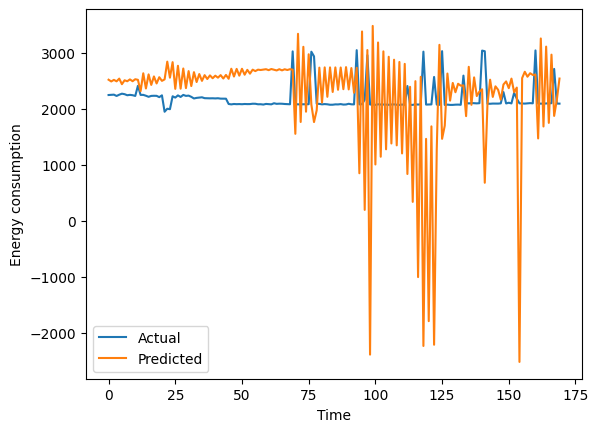

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import math
from pyswarms.single.global_best import GlobalBestPSO

# Load the dataset
dataset = pd.read_csv('data.csv')
dataset = dataset[:1000]  # Reduce dataset to 1000 values

# Preprocessing
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset['Close'].values.reshape(-1, 1))

# Split data into train and test sets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Function to create input features and target variable
def create_dataset(data, time_steps=1):
    X, Y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps), 0])
        Y.append(data[i + time_steps, 0])
    return np.array(X), np.array(Y)

# Define time steps and create train/test datasets
time_steps = 30
X_train, Y_train = create_dataset(train_data, time_steps)
X_test, Y_test = create_dataset(test_data, time_steps)

# Reshape input features for RNN
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Define the objective function for PSO
def objective_function(position):
    rnn_units = int(position[0]) + 1

    model = Sequential()
    model.add(SimpleRNN(units=rnn_units, input_shape=(X_train.shape[1], 1)))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, Y_train, epochs=5, batch_size=16, verbose=1)

    train_predictions = model.predict(X_train)
    train_predictions = scaler.inverse_transform(train_predictions)
    Y_train_inverse = scaler.inverse_transform([Y_train])

    rmse = math.sqrt(mean_squared_error(Y_train_inverse[0], train_predictions[:, 0]))
    return rmse

# Configure the PSO optimizer
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
optimizer = GlobalBestPSO(n_particles=10, dimensions=1, options=options)

# Run the PSO optimization
best_cost, best_position = optimizer.optimize(objective_function, iters=50)

# Extract the best number of RNN units from the best position found by PSO
best_rnn_units = int(best_position[0]) + 1

# Print the best number of RNN units
print("Best Number of RNN Units:", best_rnn_units)

# Build and train the RNN model with the best number of units
model = Sequential()
model.add(SimpleRNN(units=best_rnn_units, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, Y_train, epochs=5, batch_size=16, verbose=2)

# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Rescale the predictions
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)
Y_train_inverse = scaler.inverse_transform([Y_train])
Y_test_inverse = scaler.inverse_transform([Y_test])

# Calculate evaluation metrics
train_rmse = math.sqrt(mean_squared_error(Y_train_inverse[0], train_predictions[:, 0]))
test_rmse = math.sqrt(mean_squared_error(Y_test_inverse[0], test_predictions[:, 0]))
train_mse = mean_squared_error(Y_train_inverse[0], train_predictions[:, 0])
test_mse = mean_squared_error(Y_test_inverse[0], test_predictions[:, 0])
train_mape = mean_absolute_percentage_error(Y_train_inverse[0], train_predictions[:, 0])
test_mape = mean_absolute_percentage_error(Y_test_inverse[0], test_predictions[:, 0])

# Print evaluation metrics
print('Train RMSE:', train_rmse)
print('Test RMSE:', test_rmse)
print('Train MSE:', train_mse)
print('Test MSE:', test_mse)
print('Train MAPE:', train_mape)
print('Test MAPE:', test_mape)

# Plot the predictions
plt.plot(Y_test_inverse[0], label='Actual')
plt.plot(test_predictions[:, 0], label='Predicted')
plt.xlabel('Time')
plt.ylabel('Eynerg consumption')
plt.legend()
plt.show()

In [ ]:
#!!!!!!!!!!!!    модель gmdh

train layer0 in 8.87 sec
train layer1 in 19.36 sec
train layer2 in 20.70 sec
train layer3 in 19.88 sec
train layer4 in 19.93 sec
train layer5 in 20.16 sec
train layer6 in 19.70 sec
train layer7 in 20.07 sec
train layer8 in 19.77 sec
train layer9 in 20.53 sec
train layer10 in 19.84 sec
train layer11 in 19.47 sec
train layer12 in 19.91 sec
train layer13 in 20.32 sec
train layer14 in 18.97 sec
train layer15 in 19.86 sec
train layer16 in 19.28 sec
train layer17 in 20.63 sec
train layer18 in 19.00 sec
Train RMSE: 379.9945871246151
Test RMSE: 245.210832392925
Train MSE: 144395.88624400672
Test MSE: 60128.35232283116
Train MAPE: 5.899046629817681
Test MAPE: 0.05292273059454239


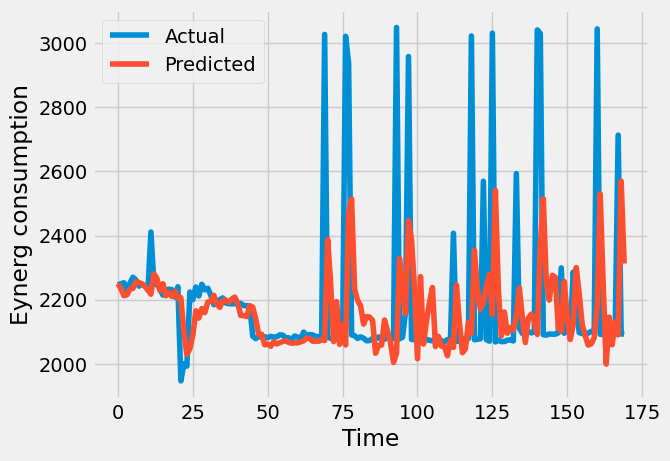

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from gmdhpy import gmdh
import math

# Load the dataset
dataset = pd.read_csv('data.csv')
dataset = dataset[:1000]  # Reduce dataset to 1000 values

# Preprocessing
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset['Close'].values.reshape(-1, 1))

# Split data into train and test sets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Function to create input features and target variable
def create_dataset(data, time_steps=1):
    X, Y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps), 0])
        Y.append(data[i + time_steps, 0])
    return np.array(X), np.array(Y)

# Define time steps and create train/test datasets
time_steps = 30
X_train, Y_train = create_dataset(train_data, time_steps)
X_test, Y_test = create_dataset(test_data, time_steps)

# Define the GMDH model
model = gmdh.MultilayerGMDH(ref_functions=('linear_cov', 'quadratic', 'cubic'))

# Fit the GMDH model
model.fit(X_train, Y_train)

# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Rescale the predictions
train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))
Y_train = scaler.inverse_transform([Y_train])
Y_test = scaler.inverse_transform([Y_test])

# Calculate evaluation metrics
train_rmse = math.sqrt(mean_squared_error(Y_train[0], train_predictions[:, 0]))
test_rmse = math.sqrt(mean_squared_error(Y_test[0], test_predictions[:, 0]))
train_mse = mean_squared_error(Y_train[0], train_predictions[:, 0])
test_mse = mean_squared_error(Y_test[0], test_predictions[:, 0])
train_mape = mean_absolute_percentage_error(Y_train[0], train_predictions[:, 0])
test_mape = mean_absolute_percentage_error(Y_test[0], test_predictions[:, 0])

# Print evaluation metrics
print('Train RMSE:', train_rmse)
print('Test RMSE:', test_rmse)
print('Train MSE:', train_mse)
print('Test MSE:', test_mse)
print('Train MAPE:', train_mape)
print('Test MAPE:', test_mape)

# Plot the predictions
plt.plot(Y_test[0], label='Actual')
plt.plot(test_predictions[:, 0], label='Predicted')
plt.xlabel('Time')
plt.ylabel('Eynerg consumption')
plt.legend()
plt.show()

In [ ]:
#!!!!!!!!!!!!    модель gmdh AND GWO

In [ ]:
from swarmlib import GWOProblem, FUNCTIONS

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
from gmdhpy import gmdh
import math

In [ ]:
dataset = pd.read_csv('data.csv')
dataset = dataset[:1000]  # Reduce dataset to 1000 values

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset['Close'].values.reshape(-1, 1))

In [ ]:
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

In [ ]:
# Function to create input features and target variable
def create_dataset(data, time_steps=1):
    X, Y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps), 0])
        Y.append(data[i + time_steps, 0])
    return np.array(X), np.array(Y)

In [ ]:
# Define time steps and create train/test datasets
time_steps = 30
X_train, Y_train = create_dataset(train_data, time_steps)
X_test, Y_test = create_dataset(test_data, time_steps)

In [ ]:
# Define the objective function for GWO
def objective_function(params):
    ref_functions = params.astype(int)  # Convert parameters to integers
    model = gmdh.MultilayerGMDH(ref_functions=ref_functions)
    model.fit(X_train, Y_train)

    # Make predictions
    test_predictions = model.predict(X_test)

    # Rescale the predictions
    test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))

    # Calculate RMSE on test set
    rmse = math.sqrt(mean_squared_error(Y_test, test_predictions))
    return rmse

In [ ]:
from sklearn.utils import shuffle

In [ ]:
# Define the objective function for GWO
def objective_function(params):
    lr, decay = params
    model.compile(optimizer='adam', loss='mean_squared_error')
    history = model.fit(X_train, Y_train, epochs=5, batch_size=16, verbose=1)
    mse = history.history['loss'][-1]
    return mse

# Define the GWO algorithm
class GreyWolfOptimizer:
    def __init__(self, objective_function, lb, ub, dim, population_size, iterations):
        self.objective_function = objective_function
        self.lb = lb
        self.ub = ub
        self.dim = dim
        self.population_size = population_size
        self.iterations = iterations

    def initialize_population(self):
        return np.random.uniform(low=self.lb, high=self.ub, size=(self.population_size, self.dim))

    def search(self):
        alpha_pos = np.zeros(self.dim)
        alpha_score = float("inf")
        beta_pos = np.zeros(self.dim)
        beta_score = float("inf")
        delta_pos = np.zeros(self.dim)
        delta_score = float("inf")
        positions = self.initialize_population()
        convergence_curve = np.zeros(self.iterations)

        for iteration in range(self.iterations):
            for i in range(self.population_size):
                # Update alpha, beta, and delta positions
                if self.objective_function(positions[i]) < alpha_score:
                    delta_score = beta_score
                    delta_pos = beta_pos.copy()
                    beta_score = alpha_score
                    beta_pos = alpha_pos.copy()
                    alpha_score = self.objective_function(positions[i])
                    alpha_pos = positions[i].copy()
                elif self.objective_function(positions[i]) < beta_score:
                    delta_score = beta_score
                    delta_pos = beta_pos.copy()
                    beta_score = self.objective_function(positions[i])
                    beta_pos = positions[i].copy()
                elif self.objective_function(positions[i]) < delta_score:
                    delta_score = self.objective_function(positions[i])
                    delta_pos = positions[i].copy()

                # Update positions
                a = 2 - (iteration * (2 / self.iterations))
                r1 = np.random.random(self.dim)
                r2 = np.random.random(self.dim)
                A1 = 2 * a * r1 - a
                C1 = 2 * r2
                D_alpha = np.abs(C1 * alpha_pos - positions[i])
                X1 = alpha_pos - A1 * D_alpha

                r1 = np.random.random(self.dim)
                r2 = np.random.random(self.dim)
                A2 = 2 * a * r1 - a
                C2 = 2 * r2
                D_beta = np.abs(C2 * beta_pos - positions[i])
                X2 = beta_pos - A2 * D_beta

                r1 = np.random.random(self.dim)
                r2 = np.random.random(self.dim)
                A3 = 2 * a * r1 - a
                C3 = 2 * r2
                D_delta = np.abs(C3 * delta_pos - positions[i])
                X3 = delta_pos - A3 * D_delta

                positions[i] = (X1 + X2 + X3) / 3

            convergence_curve[iteration] = alpha_score

        return alpha_pos, alpha_score, convergence_curve

In [ ]:
lb = [1, 1]
ub = [5, 5]
dim = 3
pop = 10
max_iter = 50

In [ ]:
optimizer = GreyWolfOptimizer(objective_function, lb, ub, dim, pop, max_iter)


In [ ]:
best_params, best_cost = optimizer.run()

AttributeError: 'GreyWolfOptimizer' object has no attribute 'run'

In [ ]:
# Configure the GWO optimizer


# Run the GWO optimization
best_params, best_cost = optimizer.run()

# Print the best parameters found by GWO
print("Best Parameters (Number of Reference Functions):", best_params.astype(int))

# Train the GMDH model with the best parameters
best_ref_functions = best_params.astype(int)
best_model = gmdh.MultilayerGMDH(ref_functions=best_ref_functions)
best_model.fit(X_train, Y_train)

# Make predictions
test_predictions = best_model.predict(X_test)

# Rescale the predictions
test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))

# Calculate evaluation metrics
test_rmse = math.sqrt(mean_squared_error(Y_test, test_predictions))
test_mse = mean_squared_error(Y_test, test_predictions)
test_mape = mean_absolute_percentage_error(Y_test, test_predictions)

# Print evaluation metrics
print('Test RMSE:', test_rmse)
print('Test MSE:', test_mse)
print('Test MAPE:', test_mape)

# Plot the predictions
plt.plot(Y_test, label='Actual')
plt.plot(test_predictions, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Eynerg consumption')
plt.legend()
plt.show()

KeyError: 'wolves'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from gmdhpy import gmdh
import math
from pygwo import GWO

# Load the dataset
dataset = pd.read_csv('/content/BTC-USD.csv')
dataset = dataset[:1000]  # Reduce dataset to 1000 values

# Preprocessing
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset['Close'].values.reshape(-1, 1))

# Split data into train and test sets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Function to create input features and target variable
def create_dataset(data, time_steps=1):
    X, Y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps), 0])
        Y.append(data[i + time_steps, 0])
    return np.array(X), np.array(Y)

# Define time steps and create train/test datasets
time_steps = 30
X_train, Y_train = create_dataset(train_data, time_steps)
X_test, Y_test = create_dataset(test_data, time_steps)

# Define the objective function for GWO
def objective_function(params):
    ref_functions = params.astype(int)  # Convert parameters to integers
    model = gmdh.MultilayerGMDH(ref_functions=ref_functions)
    model.fit(X_train, Y_train)

    # Make predictions
    test_predictions = model.predict(X_test)

    # Rescale the predictions
    test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))

    # Calculate RMSE on test set
    rmse = math.sqrt(mean_squared_error(Y_test, test_predictions))
    return rmse

# Configure the GWO optimizer
optimizer = GWO(obj_fun=objective_function, n_dim=3, n_pop=10, n_iter=50, lb=[1, 1, 1], ub=[5, 5, 5])

# Run the GWO optimization
best_params, best_cost = optimizer.optimize()

# Print the best parameters found by GWO
print("Best Parameters (Number of Reference Functions):", best_params.astype(int))

# Train the GMDH model with the best parameters
best_ref_functions = best_params.astype(int)
best_model = gmdh.MultilayerGMDH(ref_functions=best_ref_functions)
best_model.fit(X_train, Y_train)

# Make predictions
test_predictions = best_model.predict(X_test)

# Rescale the predictions
test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))

# Calculate evaluation metrics
test_rmse = math.sqrt(mean_squared_error(Y_test, test_predictions))
test_mse = mean_squared_error(Y_test, test_predictions)
test_mape = mean_absolute_percentage_error(Y_test, test_predictions)

# Print evaluation metrics
print('Test RMSE:', test_rmse)
print('Test MSE:', test_mse)
print('Test MAPE:', test_mape)

# Plot the predictions
plt.plot(Y_test, label='Actual')
plt.plot(test_predictions, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.show()

ModuleNotFoundError: No module named 'pygwo'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from gmdhpy import gmdh
import math
from pyswarms.single.global_best import GlobalBestPSO

# Load the dataset
dataset = pd.read_csv('data.csv')
dataset = dataset[:1000]  # Reduce dataset to 1000 values

# Preprocessing
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset['Close'].values.reshape(-1, 1))

# Split data into train and test sets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Function to create input features and target variable
def create_dataset(data, time_steps=1):
    X, Y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps), 0])
        Y.append(data[i + time_steps, 0])
    return np.array(X), np.array(Y)

# Define time steps and create train/test datasets
time_steps = 30
X_train, Y_train = create_dataset(train_data, time_steps)
X_test, Y_test = create_dataset(test_data, time_steps)

# Define the objective function for PSO
def objective_function(params):
    ref_functions = params.astype(int)  # Convert parameters to integers
    model = gmdh.MultilayerGMDH(ref_functions=ref_functions)
    model.fit(X_train, Y_train)

    # Make predictions
    test_predictions = model.predict(X_test)

    # Rescale the predictions
    test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))

    # Calculate RMSE on test set
    rmse = math.sqrt(mean_squared_error(Y_test, test_predictions))
    return rmse

# Configure the PSO optimizer
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
optimizer = GlobalBestPSO(n_particles=10, dimensions=3, options=options)

# Run the PSO optimization
best_params, best_cost = optimizer.optimize(objective_function, iters=50)

# Print the best parameters found by PSO
print("Best Parameters (Number of Reference Functions):", best_params.astype(int))

# Train the GMDH model with the best parameters
best_ref_functions = best_params.astype(int)
best_model = gmdh.MultilayerGMDH(ref_functions=best_ref_functions)
best_model.fit(X_train, Y_train)

# Make predictions
test_predictions = best_model.predict(X_test)

# Rescale the predictions
test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))

# Calculate evaluation metrics
test_rmse = math.sqrt(mean_squared_error(Y_test, test_predictions))
test_mse = mean_squared_error(Y_test, test_predictions)
test_mape = mean_absolute_percentage_error(Y_test, test_predictions)

# Print evaluation metrics
print('Test RMSE:', test_rmse)
print('Test MSE:', test_mse)
print('Test MAPE:', test_mape)

# Plot the predictions
plt.plot(Y_test, label='Actual')
plt.plot(test_predictions, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Eynerg consumption')
plt.legend()
plt.show()

2024-04-22 14:52:22,032 - pyswarms.single.global_best - INFO - Optimize for 50 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best:   0%|          |0/50


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from gmdhpy import gmdh
import math
from pyswarms.single.global_best import GlobalBestPSO

# Load the dataset
dataset = pd.read_csv('data.csv')
dataset = dataset[:1000]  # Reduce dataset to 1000 values

# Preprocessing
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset['Close'].values.reshape(-1, 1))

# Split data into train and test sets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Function to create input features and target variable
def create_dataset(data, time_steps=1):
    X, Y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps), 0])
        Y.append(data[i + time_steps, 0])
    return np.array(X), np.array(Y)

# Define time steps and create train/test datasets
time_steps = 30
X_train, Y_train = create_dataset(train_data, time_steps)
X_test, Y_test = create_dataset(test_data, time_steps)

# Define the objective function for PSO
def objective_function(params):
    print("Params shape:", params.shape)
    ref_functions = params.astype(int)  # Convert parameters to integers
    print("Ref functions:", ref_functions)
    model = gmdh.MultilayerGMDH(ref_functions=ref_functions)
    model.fit(X_train, Y_train)

    # Make predictions
    test_predictions = model.predict(X_test)

    # Rescale the predictions
    test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))

    # Calculate MSE on test set
    mse = mean_squared_error(Y_test, test_predictions)
    return mse

# Configure the PSO optimizer
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
optimizer = GlobalBestPSO(n_particles=10, dimensions=3, options=options)

# Run the PSO optimization
best_params, best_cost = optimizer.optimize(objective_function, iters=50)

# Print the best parameters found by PSO
print("Best Parameters (Number of Reference Functions):", best_params.astype(int))

# Train the GMDH model with the best parameters
best_ref_functions = best_params.astype(int)
best_model = gmdh.MultilayerGMDH(ref_functions=best_ref_functions)
best_model.fit(X_train, Y_train)

# Make predictions
test_predictions = best_model.predict(X_test)

# Rescale the predictions
test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))

# Calculate evaluation metrics
test_mse = mean_squared_error(Y_test, test_predictions)
test_rmse = math.sqrt(test_mse)
test_mape = mean_absolute_percentage_error(Y_test, test_predictions)

# Print evaluation metrics
print('Test MSE:', test_mse)
print('Test RMSE:', test_rmse)
print('Test MAPE:', test_mape)

# Plot the predictions
plt.plot(Y_test, label='Actual')
plt.plot(test_predictions, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.show()

2024-04-22 14:55:59,360 - pyswarms.single.global_best - INFO - Optimize for 50 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best:   0%|          |0/50

Params shape: (10, 3)
Ref functions: [[0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]]


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
#CW 0.2 (прогноз фондового ринку з використанням RNN GMDH)

In [ ]:
from __future__ import print_function

In [ ]:
!pip install gmdhpy

In [ ]:
from gmdhpy import gmdh

In [ ]:
#from gmdh import Regressor
# Importing the libraries
#import gmdh
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

In [ ]:
# Some functions to help out with
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Real Energy consumption')
    plt.plot(predicted, color='blue',label='Predicted Energy consumption')
    plt.title('Energy consumption Prediction')
    plt.xlabel('Time')
    plt.ylabel('Energy consumption')
    plt.legend()
    plt.figure(figsize=(16,4))
    plt.show()

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))
    print("The MSE is {}".format(mean_squared_error(test, predicted)))
    print("The MAE is {}".format(mean_absolute_error(test, predicted)))
    print("The R2_Score is {}".format(r2_score(test, predicted)))

In [ ]:
# First, we get the data
dataset = pd.read_csv('data.csv', index_col='Date', parse_dates=['Date'])
dataset.head()

,Open,High,Low,Close,AdjClose,Volume
Date,,,,,,
2021-01-01,2240.19,3171.12,2206.03,538.87,2240.19,59951.19
2021-01-02,2209.96,3170.64,2193.82,2211.97,549.70,59767.53
2021-01-03,2208.88,3199.34,2205.10,2232.82,1367.80,65195.05
2021-01-04,2230.70,3186.43,2201.91,2323.20,695.40,64580.26
2021-01-05,2226.57,3186.19,2214.49,2214.49,522.80,67780.77


In [ ]:
training_set = dataset[:'2023'].iloc[:,1:2].values
test_set = dataset['2024':].iloc[:,1:2].values

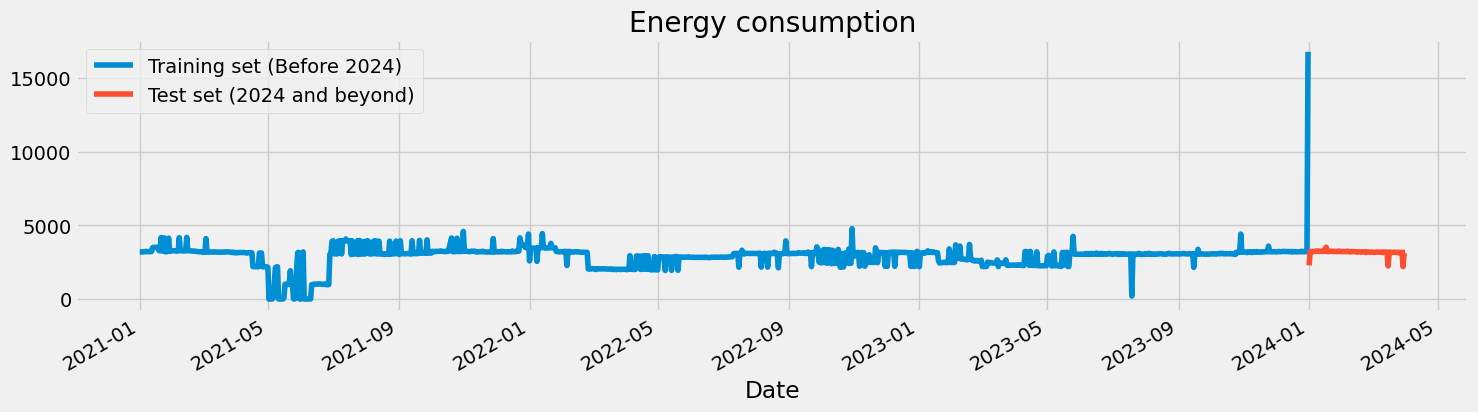

In [ ]:
# We have chosen 'High' attribute for prices. Let's see what it looks like
dataset["High"][:'2023'].plot(figsize=(16,4),legend=True)
dataset["High"]['2024':].plot(figsize=(16,4),legend=True)
plt.legend(['Training set (Before 2024)','Test set (2024 and beyond)'])
plt.title('Energy consumption')
plt.show()

In [ ]:
# Scaling the training set
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)
# print(training_set_scaled.shape)
print(training_set.shape)
print(test_set.shape)

(1096, 1)
(91, 1)


In [ ]:
X_train = []
y_train = []
for i in range(60,training_set.shape[0]):
    X_train.append(training_set[i-60:i,0])
    y_train.append(training_set[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)
print(X_train.shape)
print(y_train.shape)

(1036, 60)
(1036,)


In [ ]:
from __future__ import print_function
import numpy as np
import sys
import multiprocessing as mp
import six
import time
import math
import matplotlib.pyplot as plt

from neuron import RefFunctionType, CriterionType
from neuron import Layer, LayerCreationError
from data_preprocessing import train_preprocessing, predict_preprocessing, split_dataset, SequenceTypeSet
from neuron import fit_layer, FitLayerData
from sklearn.preprocessing import StandardScaler, LabelEncoder
from multiprocessing import Pool
from itertools import islice, chain
from collections import namedtuple


FitData = namedtuple('FitData', ['train_x', 'train_y', 'validate_x', 'validate_y', 'data_x', 'data_y',
                                 'input_train_x', 'input_validate_x', 'input_data_x'])


class BaseSONNParam(object):
    """Parameters of self-organizing deep learning polynomial neural network
    ----------------------------
    admix_features - if set to true the original features will be added to the list of features of each layer
        default value is true

    criterion_type - criterion for selecting best neurons
    the following criteria are possible:
        'validate': the default value,
            neurons are compared on the basis of validate error
        'bias': neurons are compared on the basis of bias error
        'validate_bias': combined criterion, neurons are compared on the basis of bias and validate errors
        'bias_retrain': firstly, neurons are compared on the basis of bias error, then neurons are retrain
            on the total data set (train and validate)
    example of using:
        model = Regressor(criterion_type='bias_retrain')

    seq_type - method to split data set to train and validate
        'mode1' - 	the default value
                    data set is split to train and validate data sets in the following way:
                    ... train validate train validate train validate ... train validate.
                    The last point is chosen to belong to validate set
        'mode2' - 	data set is split to train and validate data sets in the following way:
                    ... train validate train validate train validate ... validate train.
                    The last point is chosen to belong to train set
        'mode3_1' - data set is split to train and validate data sets in the following way:
                    ... train validate train train validate train train validate ... train train validate.
                    The last point is chosen to belong to validate set
        'mode4_1' - data set is split to train and validate data sets in the following way:
                    ... train validate train train train validate ... validate train train train validate.
                    The last point is chosen to belong to validate set
        'mode3_2' - data set is split to train and validate data sets in the following way:
                    ... train validate validate train validate validate train validate ... validate validate train.
                    The last point is chosen to belong to train set
        'mode4_2' - data set is split to train and validate data sets in the following way:
                    ... train validate validate validate train validate ... train validate validate validate train.
                    The last point is chosen to belong to train set
        'random' -  Random split data to train and validate

    example of using:
        model = Regressor(seq_type='random')

    max_layer_count - maximum number of layers,
        the default value is infinite (sys.maxsize)

    criterion_minimum_width - minimum number of layers at the right required to evaluate optimal number of layer
        (the optimal neuron) according to the minimum of criteria. For example, if it is found that
         criterion value has minimum at layer with index 10, the algorithm will proceed till the layer
         with index 15
         the default value is 5

    stop_train_epsilon_condition - the threshold to stop train. If the layer relative training error in compare
        with minimum layer error becomes smaller than stop_train_epsilon_condition the train is stopped. Default value is
        0.001

    manual_best_neurons_selection - if this value set to False, the number of best neurons to be
        selected is determined automatically and it is equal to the number of original features.
        Otherwise the number of best neurons to be selected is determined as
        max(original features, min_best_neurons_count) but not more than max_best_neurons_count.
        min_best_neurons_count (default 5) or max_best_neurons_count (default inf) has to be provided.
        For example, if you have N=10 features, the number of all generated neurons will be
        N*(N-1)/2=45, the number of selected best neurons will be 10, but you can increase this number to
        20 by setting manual_min_l_count_value = True and min_best_neurons_count = 20.
        If you have N=100 features, the number of all generated neurons will be
        N*(N-1)/2=4950, by default the number of partial neurons passed to the second layer is equal to the number of
        features = 100. If you want to reduce this number for some smaller number, 50 for example, set
        manual_best_neurons_selection=True and max_best_neurons_count=50.
        Note: if min_best_neurons_count is larger than number of generated neurons of the layer it will be reduced
        to that number
    example of using:
        model = Regressor(manual_best_neurons_selection=True, min_best_neurons_count=20)
        or
        model = Regressor(manual_best_neurons_selection=True, max_best_neurons_count=50)

    ref_function_types - set of reference functions, by default the set contains linear combination of two inputs
        and covariation: y = w0 + w1*x1 + w2*x2 + w3*x1*x2
        you can add other reference functions:
        'linear': y = w0 + w1*x1 + w2*x2
        'linear_cov': y = w0 + w1*x1 + w2*x2 + w3*x1*x2
        'quadratic': full polynom of the 2-nd degree
        'cubic': - full polynom of the 3-rd degree
        examples of using:
         - Regressor(ref_functions='linear')
         - Regressor(ref_functions=('linear_cov', 'quadratic', 'cubic', 'linear'))
         - Regressor(ref_functions=('quadratic', 'linear'))

    normalize - scale and normalize features if set to True. Default value is True

    layer_err_criterion - criterion of layer error calculation: 'top' - the topmost best neuron error is chosen
        as layer error; 'avg' - the layer error is the average error of the selected best neurons
        default value is 'top'

    l2 - regularization value used in neuron fit by Ridge regression (see sklearn linear_neuron.Ridge)
        default value is 0.5

    n_jobs - number of parallel processes(threads) to train model, default 1. Use 'max' to train using
        all available threads.

    """
    def __init__(self):
        self.ref_function_types = set()
        self.admix_features = True
        self.criterion_type = CriterionType.cmpValidate
        self.seq_type = SequenceTypeSet.sqMode1
        self.max_layer_count = sys.maxsize
        self.criterion_minimum_width = 5
        self.stop_train_epsilon_condition = 0.001
        self.manual_best_neurons_selection = False
        self.min_best_neurons_count = 0
        self.max_best_neurons_count = 0
        self.normalize = True
        self.layer_err_criterion = 'top'
        self.l2 = 0.5
        self.n_jobs = 1
        self.keep_partial_neurons = False


class BaseSONN(object):
    """Base class for self-organizing deep learning polynomial neural network
    """
    model_class = None

    def __init__(self, seq_type, ref_functions, criterion_type, feature_names, max_layer_count,
                 admix_features, manual_best_neurons_selection, min_best_neurons_count, max_best_neurons_count,
                 criterion_minimum_width, stop_train_epsilon_condition, normalize, layer_err_criterion, l2,
                 verbose, keep_partial_neurons, n_jobs):
        self.param = BaseSONNParam()                  # parameters
        self.param.seq_type = SequenceTypeSet.get(seq_type)

        if isinstance(ref_functions, RefFunctionType):
            self.param.ref_function_types.add(ref_functions)
        elif not isinstance(ref_functions, six.string_types):
            for ref_function in ref_functions:
                self.param.ref_function_types.add(RefFunctionType.get(ref_function))
        else:
            self.param.ref_function_types.add(RefFunctionType.get(ref_functions))

        self.param.criterion_type = CriterionType.get(criterion_type)

        self.feature_names = feature_names       # name of inputs, used to print model
        if isinstance(self.feature_names, np.ndarray):
            self.feature_names = self.feature_names.tolist()

        self.param.max_layer_count = max_layer_count
        self.param.admix_features = admix_features
        self.param.manual_best_neurons_selection = manual_best_neurons_selection
        self.param.min_best_neurons_count = min_best_neurons_count
        self.param.max_best_neurons_count = max_best_neurons_count
        self.param.criterion_minimum_width = criterion_minimum_width
        self.param.stop_train_epsilon_condition = stop_train_epsilon_condition
        self.param.normalize = normalize
        self.param.layer_err_criterion = layer_err_criterion
        self.param.l2 = l2
        self.keep_partial_neurons = keep_partial_neurons
        self.verbose = verbose # verbose: 0 for no logging to stdout, 1 for logging progress
        self.scaler = None

        if isinstance(n_jobs, six.string_types):
            if n_jobs == 'max':
                self.param.n_jobs = mp.cpu_count()
            else:
                raise ValueError(n_jobs)
        else:
            self.param.n_jobs = max(1, min(mp.cpu_count(), n_jobs))

        self.l_count = 0        # number of best neurons to be selected
        self.layers = []        #: :type: list of Layer
        self.n_features = 0     # number of original features
        self.n_train = 0        # number of train samples
        self.n_validate = 0         # number of validate samples

        self.layer_err = np.array([], dtype=np.double)          # array of layer's errors
        self.train_layer_err = np.array([], dtype=np.double)    # array of layer's train errors
        self.valid = False
        self.loss = None

    def __str__(self):
        return "Self-organizing deep learning polynomial neural network"

    @property
    def refit_required(self):
        return self.param.criterion_type == CriterionType.cmpComb_bias_retrain

    def _select_best_neurons(self, layer):
        """Select l_count the best neurons from the list
        :param layer
        :type layer: Layer
        """

        if self.param.manual_best_neurons_selection:
            layer.l_count = max(layer.l_count, self.param.min_best_neurons_count)
            layer.l_count = min(layer.l_count, self.param.max_best_neurons_count)

        # the number of selected best neurons can't be larger than the
        # total number of neurons in the layer
        layer.l_count = min(layer.l_count, len(layer))

        # check the validity of the neurons
        for n in range(0, len(layer)):
            if not layer[n].valid:
                layer.l_count = min(layer.l_count, n)
                break

        layer.valid = layer.l_count > 0

    def _set_layer_errors(self, layer):
        """Set layer errors
        :param layer
        :type layer: Layer
        """
        # neurons are already sorted, the layer error is the error of the first neuron
        # (the neuron with smallest error according to the specified criterion)

        if self.param.layer_err_criterion == 'top':
            layer.err = layer[0].get_error(self.param.criterion_type)
            layer.train_err = sys.float_info.max
        elif self.param.layer_err_criterion == 'avg':
            layer.err = 0
            layer.train_err = 0
        else:
            raise NotImplementedError

        den = 1.0/float(len(layer))
        for neuron in layer:
            if neuron.valid:
                if self.param.layer_err_criterion == 'avg':
                    layer.err += den*neuron.get_error()
                    layer.train_err += den*neuron.train_err
                elif self.param.layer_err_criterion == 'top':
                    layer.train_err = min(layer.train_err, neuron.train_err)
                else:
                    raise NotImplementedError

    def _new_layer_with_all_neurons(self):
        """Generate new layer with all possible neurons
        """
        layers_count = len(self.layers)
        layer = Layer(self, layers_count)

        if layers_count == 0:
            # the first layer, number of inputs equals to the number of the original features
            n = self.n_features
        else:
            # all other layers: number of inputs equals to the number of selected
            # neurons from the previous layer plus number of the original
            # features if param.admix_features is True
            n = self.layers[-1].l_count
            if self.param.admix_features:
                n += self.n_features

        # number of all possible combination of input pairs is N = (n * (n-1)) / 2
        # add all neurons to the layer
        for u1 in range(0, n):
            for u2 in range(u1 + 1, n):

                # y = w0 + w1*x1 + w2*x2
                if RefFunctionType.rfLinear in self.param.ref_function_types:
                    layer.add_neuron(u1, u2, RefFunctionType.rfLinear, self.model_class, self.loss)

                # y = w0 + w1*x1 + w2*x2 + w3*x1*x2
                if RefFunctionType.rfLinearCov in self.param.ref_function_types:
                    layer.add_neuron(u1, u2, RefFunctionType.rfLinearCov, self.model_class, self.loss)

                # y = full polynom of the 2-nd degree
                if RefFunctionType.rfQuadratic in self.param.ref_function_types:
                    layer.add_neuron(u1, u2, RefFunctionType.rfQuadratic, self.model_class, self.loss)

                # y = full polynom of the 3-rd degree
                if RefFunctionType.rfCubic in self.param.ref_function_types:
                    layer.add_neuron(u1, u2, RefFunctionType.rfCubic, self.model_class, self.loss)

        if len(layer) == 0:
            raise LayerCreationError('Error creating layer. No functions were created', layer.layer_index)

        return layer

    def _refit_layer(self, layer, fit_data, fit_params):
        """Fit neuron on total (original) data set (train and validate sets)
        :param layer
        :type layer: Layer
        :param fit_data
        :type fit_data: FitData
        :param fit_params
        :type fit_params: dict
        """
        for neuron in layer:
            # Train the neuron using all data (train and validate sets)
            neuron.w = neuron.fit_function(fit_data.data_x, fit_data.data_y, fit_params)

    @staticmethod
    def batch(items, n):
        """Split list of items to n batches
        :param items
        :param n
        :type n: int
        :rtype: list
        """
        size = int(math.ceil(len(items) / float(n)))
        it_items = iter(items)
        return list(iter(lambda: tuple(islice(it_items, size)), ()))

    def _create_layer(self, pool, fit_data):
        """Create new layer, calculate neurons weights, select best neurons
        :param pool
        :type pool: Pool
        :param fit_data
        :type fit_data: FitData
        """
        # compute features for the layer to be created for train and validate data sets
        # if the there are no previous layers just copy original features

        if len(self.layers) > 0:
            prev_layer = self.layers[-1]
            train_x = self._set_internal_data(prev_layer, fit_data.input_train_x, fit_data.train_x)
            validate_x = self._set_internal_data(prev_layer, fit_data.input_validate_x, fit_data.validate_x)
            if self.refit_required:
                layer_data_x = self._set_internal_data(prev_layer, fit_data.input_data_x, fit_data.data_x)
            else:
                layer_data_x = None
            new_fit_data = FitData(train_x, fit_data.train_y, validate_x, fit_data.validate_y, layer_data_x,
                                   fit_data.data_y,
                                   fit_data.input_train_x, fit_data.input_validate_x, fit_data.input_data_x)
        else:
            new_fit_data = fit_data

        # create new layer with all possible neurons
        layer = self._new_layer_with_all_neurons()

        fit_params = {'l2': self.param.l2,
                      'layer_index': layer.layer_index,
                      'criterion_type': self.param.criterion_type}

        # calculate neuron coefficients (weights)
        self._fit_layer(layer, pool, new_fit_data, fit_params)

        # sort neurons in ascending error order according to specified criterion
        layer.sort(key=lambda x: x.get_error(self.param.criterion_type))

        # reset neuron indexes
        for n, neuron in enumerate(layer):
            neuron.neuron_index = n

        # select l_count best neurons from the list and check the neurons validity
        self._select_best_neurons(layer)

        # delete unused neurons keeping only l_count best neurons
        del layer[layer.l_count:]

        # calculate and set layer errors
        self._set_layer_errors(layer)

        # if criterion is cmpComb_bias_retrain we need to retrain neuron on total data set
        # before calculation of train and validate errors
        if self.refit_required:
            self._refit_layer(layer, new_fit_data, fit_params)

        # add created layer
        self.layers.append(layer)

        return layer, new_fit_data

    def _set_internal_data(self, layer, data, x):
        """Compute inputs(features) for the layer
        data - original features of algorithm , the dimensionality is (data size) x (number of original features)
        x is the output of selected neurons from the previous layer
        :param layer
        :type layer: Layer
        :param data
        :type data: numpy.ndarray
        :param x
        :type x: numpy.ndarray
        """

        data_m = data.shape[0]
        if layer is None:
            # the first layer, its features are original features of the algorithm
            # just copy them
            out_x = data
        else:
            # the second or higher layer
            # its features are outputs of the previous layer
            # we need to compute them
            out_size = min(len(layer), layer.l_count)
            out_x = np.zeros((data_m, out_size), dtype=np.double)
            for j in range(out_size):
                neuron = layer[j]
                out_x[:, j] = neuron.transfer(x[:, neuron.u1_index], x[:, neuron.u2_index], neuron.w)

            # if parameter admix_features set to true we need to add original features to
            # the current features of the layer
            if self.param.admix_features:
                out_x = np.hstack([out_x, data])

        return out_x

    def _neuron_not_in_use(self, neuron):
        """
        :param neuron
        :type neuron: PolynomNeuron
        :rtype bool
        """
        if neuron.layer_index == len(self.layers)-1:
            return neuron.neuron_index > 0
        else:
            next_layer = self.layers[neuron.layer_index+1]
            return neuron.neuron_index not in next_layer.input_index_set

    def _delete_unused_neuron(self, neuron):
        """Delete unused neuron from layer
        :param neuron
        :type neuron: PolynomNeuron
        """
        if neuron.layer_index < len(self.layers)-1:
            next_layer = self.layers[neuron.layer_index+1]
            for next_layer_neuron in next_layer:
                if next_layer_neuron.u1_index >= neuron.neuron_index:
                    next_layer_neuron.u1_index -= 1
                if next_layer_neuron.u2_index >= neuron.neuron_index:
                    next_layer_neuron.u2_index -= 1
        layer = self.layers[neuron.layer_index]
        layer.l_count -= 1
        layer.delete(neuron.neuron_index)

    def _delete_unused_neurons(self):
        """Delete unused neurons from layers
        """
        layers_count = len(self.layers)
        if layers_count == 0:
            return

        layer = self.layers[layers_count-1]
        for neuron_index, neuron in reversed(list(enumerate(layer))):
            if neuron_index > 0:
                self._delete_unused_neuron(neuron)

        for layer in reversed(self.layers):
            for neuron in reversed(layer):
                if self._neuron_not_in_use(neuron):
                    self._delete_unused_neuron(neuron)

    def _fit(self, fit_data):
        """Fit model
        :param fit_data
        :type fit_data: FitData
        """

        min_error = sys.float_info.max
        error_stopped_decrease = False
        del self.layers[:]
        self.valid = False
        error_min_index = 0
        if self.param.n_jobs > 1:
            pool = Pool(processes=self.param.n_jobs)
        else:
            pool = None

        while True:
            # create layer, calculate all possible neurons and then select the best ones
            # using specified criterion
            t0 = time.time()
            layer, fit_data = self._create_layer(pool, fit_data)
            t1 = time.time()
            total_time = (t1 - t0)
            if self.verbose == 1:
                print("train layer{lnum} in {time:0.2f} sec".format(lnum=layer.layer_index,
                                                                    time=total_time))

            # proceed until stop condition is fulfilled

            if layer.err < min_error:
                # layer error has been decreased, memorize the layer index
                error_min_index = layer.layer_index

            if layer.err > min_error and layer.layer_index > 0 and \
                                    layer.layer_index - error_min_index >= self.param.criterion_minimum_width:
                # layer error stopped decreasing
                error_stopped_decrease = True

            if layer.layer_index > 0 and layer.err < min_error and min_error > 0:
                if (min_error - layer.err) / min_error < self.param.stop_train_epsilon_condition:
                    # layer relative error decrease value is below stop condition
                    error_stopped_decrease = True

            min_error = min(min_error, layer.err)

            # if error does not decrease anymore or number of layers reached the limit
            # or the layer does not have any valid neuron - stop training
            if error_stopped_decrease or not (layer.layer_index < self.param.max_layer_count - 1) or \
                    not layer.valid:
                self.valid = True
                break

        if self.valid:
            self.layer_err.resize((len(self.layers),), refcheck=False)
            self.train_layer_err.resize((len(self.layers),), refcheck=False)
            for i in range(0, len(self.layers)):
                self.layer_err[i] = self.layers[i].err
                self.train_layer_err[i] = self.layers[i].train_err
            # delete unused layers keeping only error_min_index layers
            del self.layers[error_min_index + 1:]
            # to be implemented - delete invalid neurons

            if not self.keep_partial_neurons:
                self._delete_unused_neurons()

    def _pre_fit_check(self, train_y, validate_y):
        """Check internal arrays after split input data
        """
        if self.n_train == 0:
            raise ValueError('Error: train data set size is zero')
        if self.n_validate == 0:
            raise ValueError('Error: validate data set size is zero')

    def _get_features_names_by_index(self, features_set):
        """Return names of features
        """
        if self.feature_names is None:
            return ', '.join(
                ['index=inp_{0} '.format(idx) for idx in features_set])
        else:
            return ', '.join(
                [self.feature_names[idx] for idx in features_set])

    def _preprocess_y(self, train_y, validate_y, data_y):
        return train_y, validate_y, data_y

    # *************************************************************
    #                   public methods
    # *************************************************************
    def fit(self, data_x, data_y, validation_data=None, dataset_split=None,
            verbose=None):
        """Fit self-organizing deep learning polynomial neural network

        :param data_x : numpy array or sparse matrix of shape [n_samples,n_features]
                 training data
        :param data_y : numpy array of shape [n_samples]
                 target values

        :return an instance of self.

        Example of using
        ----------------
        from gmdh import Regressor
        model = Regressor()
        model.fit(data_x, data_y)

        """
        if verbose is not None:
            self.verbose = verbose

        data_x, data_y = train_preprocessing(data_x, data_y, self.feature_names)

        if validation_data is None:
            input_train_x, train_y, input_validate_x, validate_y = split_dataset(
                data_x, data_y, self.param.seq_type)
            input_data_x = data_x
        else:
            input_validate_x, validate_y = train_preprocessing(
                validation_data[0], validation_data[1], self.feature_names)
            input_train_x = data_x
            train_y = data_y
            input_data_x = np.vstack((input_train_x, input_validate_x))
            data_x = input_data_x
            data_y = np.hstack((train_y, validate_y))

        self.n_features = data_x.shape[1]
        self.l_count = self.n_features
        self.n_train = input_train_x.shape[0]
        self.n_validate = input_validate_x.shape[0]

        if self.param.normalize:
            self.scaler = StandardScaler()
            input_train_x = self.scaler.fit_transform(input_train_x)
            input_validate_x = self.scaler.transform(input_validate_x)
            input_data_x = self.scaler.transform(input_data_x)

        train_y, validate_y, data_y = self._preprocess_y(train_y, validate_y, data_y)
        fit_data = FitData(input_train_x, train_y,
                           input_validate_x, validate_y,
                           data_x, data_y,
                           input_train_x, input_validate_x, input_data_x)

        self._pre_fit_check(train_y, validate_y)
        self._fit(fit_data)
        return self

    def _predict(self, input_data_x):
        """Predict using self-organizing deep learning polynomial neural network

        :param input_data_x : numpy array of shape [predicted_n_samples, n_features]
                       samples

        :return numpy array of shape [predicted_n_samples]
        Returns predicted values.

        Example of using:
        from gmdh import Regressor, CriterionType
        model = Regressor()
        model.fit(data_x, data_y)
        predict_y = model.predict(test_x)

        where

        data_x - training data, numpy array of shape [n_samples, n_features]
        data_y - target values, numpy array of shape [n_samples]
        predict_x - samples to be predicted, numpy array of shape [predicted_n_samples, n_features]
        """

        if not self.valid:
            raise ValueError('Model is not fit')

        # check dimensions
        # check validity of the neuron
        input_data_x, data_len = predict_preprocessing(input_data_x, self.n_features)

        if self.param.normalize:
            input_data_x = np.array(self.scaler.transform(input_data_x), copy=True)
        layer_data_x = None

        prev_layer = None
        # calculate outputs of all layers except the last one
        for n in range(0, len(self.layers)):
            layer_data_x = self._set_internal_data(prev_layer, input_data_x, layer_data_x)
            prev_layer = self.layers[n]

        # calculate output for the last layer
        # we choose the first (best) neuron of the last layer as output of network
        neuron = self.layers[-1][0]
        u1 = layer_data_x[:, neuron.u1_index]
        u2 = layer_data_x[:, neuron.u2_index]
        output_y = neuron.transfer(u1, u2, neuron.w)

        return output_y

    def predict_neuron_output(self, input_data_x, layer_idx, neuron_idx):
        """Return output od specified neuron
        :param input_data_x:
        :param layer_idx: layer index
        :type layer_idx: int
        :param neuron_idx: neuron index within the layer
        :type neuron_idx: int
        :rtype: double
        """

        if layer_idx >= len(self.layers) or layer_idx < 0:
            raise ValueError('layer index is out of range')
        if neuron_idx >= len(self.layers[layer_idx]) or neuron_idx < 0:
            raise ValueError('neuron index is out of range')

        # check dimensions
        # check validity of the neuron
        input_data_x, data_len = predict_preprocessing(input_data_x, self.n_features)

        if self.param.normalize:
            input_data_x = np.array(self.scaler.transform(input_data_x), copy=True)
        layer_data_x = None

        prev_layer = None
        # calculate outputs of all layers with indexes up to layer_idx
        for n in range(0, max(1, layer_idx - 1)):
            layer_data_x = self._set_internal_data(prev_layer, input_data_x, layer_data_x)
            prev_layer = self.layers[n]

        # calculate output for the last layer
        # we choose the first (best) neuron of the last layer as output of network
        neuron = self.layers[layer_idx][neuron_idx]
        u1 = layer_data_x[:, neuron.u1_index]
        u2 = layer_data_x[:, neuron.u2_index]
        output_y = neuron.transfer(u1, u2, neuron.w)

        return output_y

    def get_selected_features_indices(self):
        """Return features that was selected as useful for neuron during fit
        """
        selected_features_set = set()
        for neuron in self.layers[0]:
            selected_features_set.add(neuron.u1_index)
            selected_features_set.add(neuron.u2_index)

        if self.param.admix_features and len(self.layers) > 1:
            for layer in self.layers[1:]:
                for neuron in layer:
                    prev_layer = self.layers[layer.layer_index-1]
                    u1_index = neuron.u1_index - prev_layer.l_count
                    u2_index = neuron.u2_index - prev_layer.l_count
                    if u1_index >= 0:
                        selected_features_set.add(u1_index)
                    if u2_index >= 0:
                        selected_features_set.add(u2_index)
        return list(selected_features_set)

    def get_unselected_features_indices(self):
        """Return features that was not selected as useful for neuron during fit
        """
        return list(set(np.arange(self.n_features).tolist()) -
                    set(self.get_selected_features_indices()))

    def get_unselected_features(self):
        """Return names of features that was not selected as useful for neuron during fit
        """
        unselected_features = self.get_unselected_features_indices()
        if len(unselected_features) == 0:
            return "No unselected features"
        else:
            return self._get_features_names_by_index(unselected_features)

    def get_selected_features(self):
        """Return names of features that was selected as useful for neuron during fit
        """
        return self._get_features_names_by_index(self.get_selected_features_indices())

    def describe(self):
        """Describe the model"""
        s = ['*' * 50,
             'Model',
             '*' * 50,
            'Number of layers: {0}'.format(len(self.layers)),
            'Max possible number of layers: {0}'.format(self.param.max_layer_count),
            'Model selection criterion: {0}'.format(CriterionType.get_name(self.param.criterion_type)),
            'Number of features: {0}'.format(self.n_features),
            'Include features to inputs list for each layer: {0}'.format(self.param.admix_features),
            'Data size: {0}'.format(self.n_train + self.n_validate),
            'Train data size: {0}'.format(self.n_train),
            'Test data size: {0}'.format(self.n_validate),
            'Selected features by index: {0}'.format(self.get_selected_features_indices()),
            'Selected features by name: {0}'.format(self.get_selected_features()),
            'Unselected features by index: {0}'.format(self.get_unselected_features_indices()),
            'Unselected features by name: {0}'.format(self.get_unselected_features()),
        ]
        for layer in self.layers:
            s.append('\n' + layer.describe(self.feature_names, self.layers))
        return '\n'.join(s)

    def describe_layer(self, layer_index):
        """Describe the layer
        :param layer_index
        :type layer_index: int
        :rtype str
        """
        return self.layers[layer_index].describe(self.feature_names, self.layers)

    def describe_neuron(self, layer_index, neuron_index):
        """Describe the neuron
        :param layer_index
        :type layer_index: int
        :param neuron_index
        :type neuron_index: int
        :rtype str
        """
        return self.layers[layer_index][neuron_index].describe(self.feature_names, self.layers)

    def plot_layer_error(self):
        """Plot layer error on validate set vs layer index
        """

        fig = plt.figure()
        y = self.layer_err
        x = range(0, y.shape[0])
        ax1 = fig.add_subplot(111)
        ax1.plot(x, y, 'b')
        ax1.set_title('Layer error on validate set')
        plt.xlabel('layer index')
        plt.ylabel('error')
        idx = len(self.layers)-1
        plt.plot(x[idx], y[idx], 'rD')
        plt.show()

    def _fit_layer(self, layer, pool, fit_data, fit_params):
        """Calculate neuron weights
        """
        job_args = [FitLayerData(neurons,
                                 fit_data.train_x,
                                 fit_data.train_y,
                                 fit_data.validate_x,
                                 fit_data.validate_y,
                                 fit_params)
                    for neurons in self.batch(layer, self.param.n_jobs)]

        if self.param.n_jobs > 1:

            fitted_neurons = pool.map(fit_layer, job_args)
            del layer[:]
            layer.extend(chain(*fitted_neurons))
        else:
            fit_layer(job_args[0])


# **********************************************************************************************************************
#   Regressor class
# **********************************************************************************************************************

class Regressor(BaseSONN):
    """Self-organizing deep learning polynomial neural network
    """
    model_class = 'regression'

    def __init__(self, seq_type=SequenceTypeSet.sqMode1,
                 ref_functions=RefFunctionType.rfLinearCov,
                 criterion_type=CriterionType.cmpValidate, feature_names=None, max_layer_count=50,
                 admix_features=True, manual_best_neurons_selection=False, min_best_neurons_count=5,
                 max_best_neurons_count=10000000, criterion_minimum_width=5,
                 stop_train_epsilon_condition=0.001, normalize=True, layer_err_criterion='top', l2=0.5,
                 verbose=1, keep_partial_neurons=False, n_jobs=1):
        super(self.__class__, self).__init__(seq_type,
                 ref_functions,
                 criterion_type, feature_names, max_layer_count,
                 admix_features, manual_best_neurons_selection, min_best_neurons_count, max_best_neurons_count,
                 criterion_minimum_width, stop_train_epsilon_condition, normalize, layer_err_criterion, l2,
                 verbose, keep_partial_neurons, n_jobs)
        self.loss = 'mse'

    def predict(self, data_x):
        """Predict using self-organizing deep learning polynomial
        neural network

        Parameters
        ----------
        data_x : numpy array of shape [predicted_n_samples, n_features]

        Returns
        -------
        predicted classes : numpy array

        Example of using:
        from gmdh import Regressor
        model = Regressor()
        model.fit(data_x, data_y)
        predict_y = model.predict(test_x)

        where

        data_x - training data, numpy array of shape [n_samples, n_features]
        data_y - target values, numpy array of shape [n_samples]
        test_x - samples to be predicted, numpy array of shape [test_n_samples, n_features]
        """
        return self._predict(data_x)


class Classifier(BaseSONN):
    """Self-organizing deep learning polynomial neural network classifier
    """
    model_class = 'classification'

    def __init__(self, seq_type=SequenceTypeSet.sqMode1,
                 ref_functions=RefFunctionType.rfLinearCov,
                 criterion_type=CriterionType.cmpValidate, feature_names=None, max_layer_count=50,
                 admix_features=True, manual_best_neurons_selection=False, min_best_neurons_count=5,
                 max_best_neurons_count=10000000, criterion_minimum_width=5,
                 stop_train_epsilon_condition=0.001, normalize=True, layer_err_criterion='top', l2=0.5,
                 verbose=1, keep_partial_neurons=False, n_jobs=1):
        super(self.__class__, self).__init__(seq_type,
                 ref_functions,
                 criterion_type, feature_names, max_layer_count,
                 admix_features, manual_best_neurons_selection, min_best_neurons_count, max_best_neurons_count,
                 criterion_minimum_width, stop_train_epsilon_condition, normalize, layer_err_criterion, l2,
                 verbose, keep_partial_neurons, n_jobs)
        self.loss = 'logloss'
        self.le = LabelEncoder()

    def _pre_fit_check(self, train_y, validate_y):
        """Check internal arrays after split input data
        """
        super(self.__class__, self)._pre_fit_check(train_y, validate_y)
        if len(np.unique(train_y)) > 2 or len(np.unique(validate_y)) > 2:
            raise ValueError('Only binary classification is supported')

    def _preprocess_y(self, train_y, validate_y, data_y):
        train_y = self.le.fit_transform(train_y)
        validate_y = self.le.transform(validate_y)
        data_y = self.le.transform(data_y)
        return train_y, validate_y, data_y

    def predict_proba(self, data_x):
        """Predict probabilities of classes using self-organizing deep learning polynomial
        neural network classifier

        Parameters
        ----------
        data_x : numpy array of shape [predicted_n_samples, n_features]

        Returns
        -------
        predicted classes : numpy array

        Example of using:
        from gmdh import Classifier
        model = Classifier()
        model.fit(data_x, data_y)
        predict_y = model.predict_proba(test_x)

        where

        data_x - training data, numpy array of shape [n_samples, n_features]
        data_y - target values, numpy array of shape [n_samples]
        test_x - samples to be predicted, numpy array of shape [test_n_samples, n_features]
        """
        return self._predict(data_x)

    def predict(self, data_x):
        """Predict classes using self-organizing deep learning polynomial
        neural network classifier

        Parameters
        ----------
        data_x : numpy array of shape [predicted_n_samples, n_features]

        Returns
        -------
        predicted classes : numpy array

        Example of using:
        from gmdh import Classifier
        model = Classifier()
        model.fit(data_x, data_y)
        predict_y = model.predict(test_x)

        where

        data_x - training data, numpy array of shape [n_samples, n_features]
        data_y - target values, numpy array of shape [n_samples]
        test_x - samples to be predicted, numpy array of shape [test_n_samples, n_features]
        """
        return self.le.transform(np.argmax(self.predict_proba(data_x)))


#aliases
MultilayerGMDH = Regressor

In [ ]:
gmdh = Regressor(ref_functions=('cubic','quadratic','linear','linear_cov'),
                      criterion_type='validate',
                      criterion_minimum_width=5,
                      stop_train_epsilon_condition=0.0001,
                      layer_err_criterion='top',
                      l2=0.5,
                      verbose=1,
                      n_jobs='max')

In [ ]:
# Now to get the test set ready in a similar way as the training set.
# The following has been done so first 60 entires of test set have 60 previous values which is impossible to get unless we take the whole
# 'High' attribute data for processing
dataset_total = pd.concat((dataset["High"][:'2023'],dataset["High"]['2024':]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values
# print(inputs.shape)
inputs = inputs.reshape(-1,1)
print(inputs.shape)

# print(inputs.shape)
# inputs  = sc.transform(inputs)
# print(inputs.shape)
print(test_set.shape)

(151, 1)
(91, 1)


In [ ]:
# Preparing X_test and predicting the prices
X_test = []
y_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
    y_test.append(inputs[i,0])
X_test, y_test = np.array(X_test), np.array(y_test)
print(X_test.shape)
print(y_test.shape)
# X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

(91, 60)
(91,)


In [ ]:
gmdh.fit(X_train,y_train)

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


train layer0 in 7.38 sec
train layer1 in 27.30 sec
train layer2 in 27.18 sec
train layer3 in 27.50 sec
train layer4 in 28.85 sec
train layer5 in 27.45 sec
train layer6 in 26.96 sec
train layer7 in 27.25 sec
train layer8 in 28.11 sec
train layer9 in 26.69 sec
train layer10 in 26.77 sec
train layer11 in 26.75 sec
train layer12 in 27.75 sec


In [ ]:
predicted_stock_price = gmdh.predict(X_test)
print(predicted_stock_price.shape)
# predicted_stock_price = regressor.predict(X_test)
# predicted_stock_price.reshape(-1,1)
# predicted_stock_price = sc.inverse_transform(predicted_stock_price)

(91,)


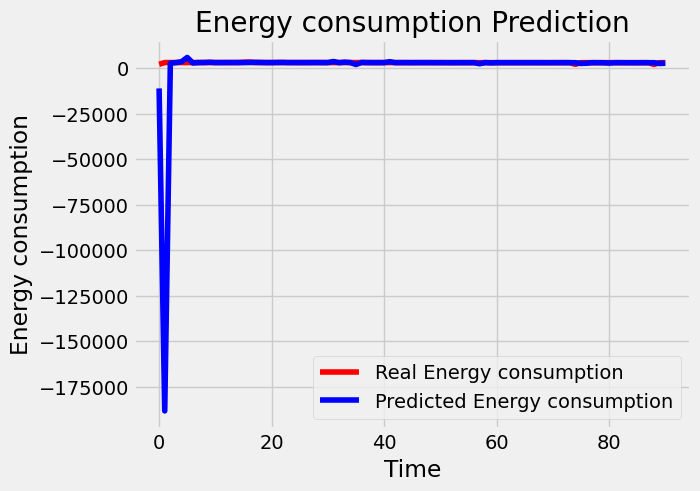

<Figure size 1600x400 with 0 Axes>

In [ ]:
plot_predictions(test_set,predicted_stock_price)

In [ ]:
return_rmse(y_test,predicted_stock_price)

The root mean squared error is 20124.376014772894.
The MSE is 404990509.98396647
The MAE is 2389.676463403501
The R2_Score is -12622.711461805147


In [ ]:
from sklearn.metrics import r2_score
y_test, predicted_stock_price = list(y_test),list(predicted_stock_price)
# gmdh.score(y_test, predicted_stock_price)
r2_score(y_test, predicted_stock_price)

-12622.711461805147

In [ ]:
print("Length of y_test:", len(y_test))
print("Length of predicted_stock_price:", len(predicted_stock_price))

# Ensure that index k is within the valid range
if k < len(y_test) and k < len(predicted_stock_price):
    print(y_test[k], predicted_stock_price[k])
else:
    print("Index k is out of range.")

Length of y_test: 91
Length of predicted_stock_price: 91
Index k is out of range.


In [ ]:
# Since LSTMs store long term memory state, we create a data structure with 60 timesteps and 1 output
# So for each element of training set, we have 60 previous training set elements
X_train = []
y_train = []
# Ensure that the loop range is within the valid bounds
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [ ]:
# The LSTM architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='rmsprop',loss='mean_squared_error')
# Fitting to the training set
regressor.fit(X_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
33/33 [==============================] - 12s 101ms/step - loss: 0.0039
Epoch 2/50
33/33 [==============================] - 3s 98ms/step - loss: 0.0025
Epoch 3/50
33/33 [==============================] - 4s 109ms/step - loss: 0.0023
Epoch 4/50
33/33 [==============================] - 4s 121ms/step - loss: 0.0023
Epoch 5/50
33/33 [==============================] - 3s 101ms/step - loss: 0.0023
Epoch 6/50
33/33 [==============================] - 3s 100ms/step - loss: 0.0021
Epoch 7/50
33/33 [==============================] - 4s 132ms/step - loss: 0.0022
Epoch 8/50
33/33 [==============================] - 3s 99ms/step - loss: 0.0021
Epoch 9/50
33/33 [==============================] - 3s 99ms/step - loss: 0.0019
Epoch 10/50
33/33 [==============================] - 3s 106ms/step - loss: 0.0019
Epoch 11/50
33/33 [==============================] - 4s 122ms/step - loss: 0.0020
Epoch 12/50
33/33 [==============================] - 3s 100ms/step - loss: 0.0019
Epoch 13/50
33/33 [========

In [ ]:
# Now to get the test set ready in a similar way as the training set.
# The following has been done so forst 60 entires of test set have 60 previous values which is impossible to get unless we take the whole
# 'High' attribute data for processing
dataset_total = pd.concat((dataset["High"][:'2023'],dataset["High"]['2024':]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

In [ ]:
X_test = []
for i in range(60,151):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [ ]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

3/3 [==============================] - 2s 29ms/step


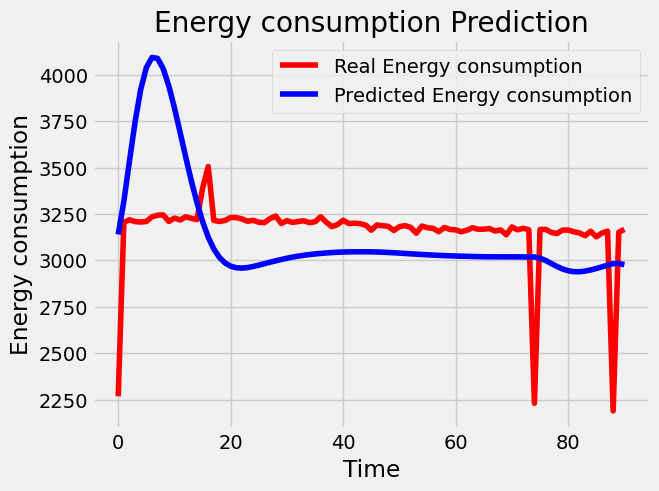

<Figure size 1600x400 with 0 Axes>

In [ ]:
# Visualizing the results for LSTM
plot_predictions(test_set,predicted_stock_price)

In [ ]:
# Evaluating our model
return_rmse(test_set,predicted_stock_price)

The root mean squared error is 321.0937926654758.
The MSE is 103101.22368829955
The MAE is 251.42222345037774
The R2_Score is -2.2137051785525803


In [ ]:
# The GRU architecture
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Second GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Third GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=1))
# Compiling the RNN
regressorGRU.compile(optimizer=SGD(lr=0.01, momentum=0.9, nesterov=False), loss='mean_squared_error')
# Fitting to the training set
regressorGRU.fit(X_train, y_train, epochs=50, batch_size=150)

Epoch 1/50
7/7 [==============================] - 15s 209ms/step - loss: 0.0118
Epoch 2/50
7/7 [==============================] - 2s 300ms/step - loss: 0.0070
Epoch 3/50
7/7 [==============================] - 2s 264ms/step - loss: 0.0047
Epoch 4/50
7/7 [==============================] - 1s 209ms/step - loss: 0.0037
Epoch 5/50
7/7 [==============================] - 1s 208ms/step - loss: 0.0030
Epoch 6/50
7/7 [==============================] - 1s 212ms/step - loss: 0.0026
Epoch 7/50
7/7 [==============================] - 1s 210ms/step - loss: 0.0023
Epoch 8/50
7/7 [==============================] - 1s 210ms/step - loss: 0.0024
Epoch 9/50
7/7 [==============================] - 1s 210ms/step - loss: 0.0023
Epoch 10/50
7/7 [==============================] - 2s 337ms/step - loss: 0.0023
Epoch 11/50
7/7 [==============================] - 2s 236ms/step - loss: 0.0023
Epoch 12/50
7/7 [==============================] - 2s 222ms/step - loss: 0.0023
Epoch 13/50
7/7 [==============================]

In [ ]:
X_test = []
for i in range(60,151):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
GRU_predicted_stock_price = regressorGRU.predict(X_test)
GRU_predicted_stock_price = sc.inverse_transform(GRU_predicted_stock_price)

3/3 [==============================] - 1s 27ms/step


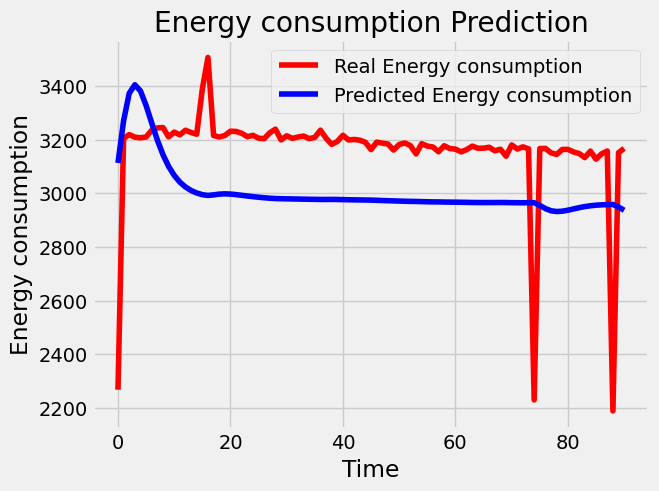

<Figure size 1600x400 with 0 Axes>

In [ ]:
plot_predictions(test_set,GRU_predicted_stock_price)

In [ ]:
return_rmse(test_set,GRU_predicted_stock_price)

The root mean squared error is 254.48203272978668.
The MSE is 64761.104982284225
The MAE is 226.17269284426507
The R2_Score is -1.0186287902805269


In [ ]:
# Preparing sequence data
initial_sequence = X_train[1035,:]
sequence = []
for i in range(91):
    new_prediction = regressorGRU.predict(initial_sequence.reshape(initial_sequence.shape[1],initial_sequence.shape[0],1))
    initial_sequence = initial_sequence[1:]
    initial_sequence = np.append(initial_sequence,new_prediction,axis=0)
    sequence.append(new_prediction)
sequence = sc.inverse_transform(np.array(sequence).reshape(91,1))

1/1 [==============================] - 0s 27ms/step


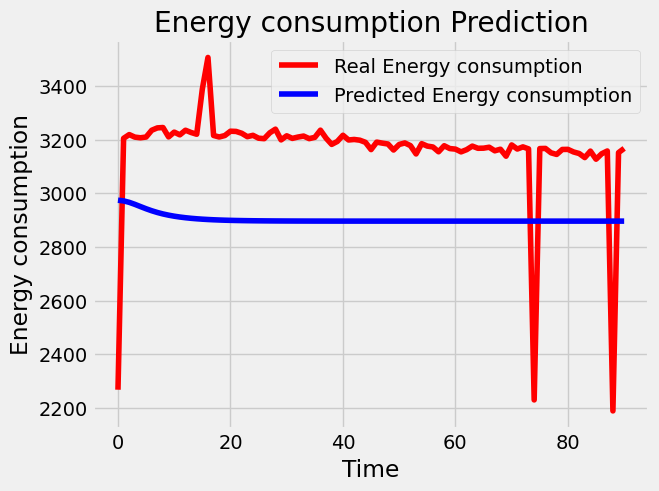

<Figure size 1600x400 with 0 Axes>

In [ ]:
# Visualizing the sequence
plot_predictions(test_set,sequence)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import gmdh
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import math


# Load the dataset
dataset = pd.read_csv('BTC-USD.csv')
dataset = dataset[:1000]  # Reduce dataset to 1000 values

# Preprocessing
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset['Close'].values.reshape(-1, 1))

# Split data into train and test sets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Function to create input features and target variable
def create_dataset(data, time_steps=1):
    X, Y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps), 0])
        Y.append(data[i + time_steps, 0])
    return np.array(X), np.array(Y)

# Define time steps and create train/test datasets
time_steps = 30
X_train, Y_train = create_dataset(train_data, time_steps)
X_test, Y_test = create_dataset(test_data, time_steps)

# Reshape input features for GMDH
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1]))

# Define the objective function for GWO
def objective_function(params):
    lr, decay = params
    model = gmdh.GMDH()
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(Y_test, predictions)
    return mse

# Define the GWO algorithm
class GreyWolfOptimizer:
    def __init__(self, objective_function, lb, ub, dim, population_size, iterations):
        self.objective_function = objective_function
        self.lb = lb
        self.ub = ub
        self.dim = dim
        self.population_size = population_size
        self.iterations = iterations

    def initialize_population(self):
        return np.random.uniform(low=self.lb, high=self.ub, size=(self.population_size, self.dim))

    def search(self):
        alpha_pos = np.zeros(self.dim)
        alpha_score = float("inf")
        positions = self.initialize_population()
        convergence_curve = np.zeros(self.iterations)

        for iteration in range(self.iterations):
            for i in range(self.population_size):
                # Update alpha position
                if self.objective_function(positions[i]) < alpha_score:
                    alpha_score = self.objective_function(positions[i])
                    alpha_pos = positions[i].copy()

                # Update positions
                a = 2 - (iteration * (2 / self.iterations))
                r1 = np.random.random(self.dim)
                r2 = np.random.random(self.dim)
                A1 = 2 * a * r1 - a
                C1 = 2 * r2
                D_alpha = np.abs(C1 * alpha_pos - positions[i])
                X1 = alpha_pos - A1 * D_alpha

                positions[i] = X1

            convergence_curve[iteration] = alpha_score

        return alpha_pos, alpha_score, convergence_curve

# Define the bounds, dimension, population size, and number of iterations for GWO
lb = [0.0001, 0.0001]
ub = [0.1, 0.9]
dim = 2
population_size = 10
iterations = 10

# Create an instance of GreyWolfOptimizer and perform the search
gwo = GreyWolfOptimizer(objective_function, lb, ub, dim, population_size, iterations)
alpha_pos, alpha_score, convergence_curve = gwo.search()

# Compile the GMDH model with optimal parameters
lr_opt = alpha_pos[0]
decay_opt = alpha_pos[1]
model = gmdh.GMDH()
model.fit(X_train, Y_train)

# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Rescale the predictions
train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))
Y_train = scaler.inverse_transform([Y_train])
Y_test = scaler.inverse_transform([Y_test])

# Calculate evaluation metrics
train_rmse = math.sqrt(mean_squared_error(Y_train[0], train_predictions[:, 0]))
test_rmse = math.sqrt(mean_squared_error(Y_test[0], test_predictions[:, 0]))
train_mse = mean_squared_error(Y_train[0], train_predictions[:, 0])
test_mse = mean_squared_error(Y_test[0], test_predictions[:, 0])
train_mape = mean_absolute_percentage_error(Y_train[0], train_predictions[:, 0])
test_mape = mean_absolute_percentage_error(Y_test[0], test_predictions[:, 0])

In [ ]:
#RNN GMDH

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import math

In [ ]:
# Load the dataset
dataset = pd.read_csv('data.csv')
dataset = dataset[:1000]  # Reduce dataset to 1000 values

In [ ]:
# Preprocessing
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset['Close'].values.reshape(-1, 1))

In [ ]:
# Split data into train and test sets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

In [ ]:
# Function to create input features and target variable
def create_dataset(data, time_steps=1):
    X, Y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps), 0])
        Y.append(data[i + time_steps, 0])
    return np.array(X), np.array(Y)

In [ ]:
# Define time steps and create train/test datasets
time_steps = 30
X_train, Y_train = create_dataset(train_data, time_steps)
X_test, Y_test = create_dataset(test_data, time_steps)

In [ ]:
# Reshape input features for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
gmdh = Regressor(ref_functions=('cubic','quadratic','linear','linear_cov'),
                      criterion_type='validate',
                      criterion_minimum_width=5,
                      stop_train_epsilon_condition=0.0001,
                      layer_err_criterion='top',
                      l2=0.5,
                      verbose=1,
                      n_jobs='max')

In [ ]:
# Reshape input features for GMDH
X_train_gmdh = np.reshape(X_train, (X_train.shape[0], -1))
X_test_gmdh = np.reshape(X_test, (X_test.shape[0], -1))

gmdh.fit(X_train_gmdh, Y_train)

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


train layer0 in 5.36 sec
train layer1 in 14.50 sec
train layer2 in 14.12 sec
train layer3 in 8.89 sec
train layer4 in 8.54 sec
train layer5 in 9.06 sec
train layer6 in 7.94 sec
train layer7 in 8.87 sec
train layer8 in 8.17 sec
train layer9 in 7.87 sec
train layer10 in 8.28 sec
train layer11 in 7.76 sec


In [ ]:
predicted_energy_consumption = gmdh.predict(X_test_gmdh)
print(predicted_energy_consumption.shape)

(170,)


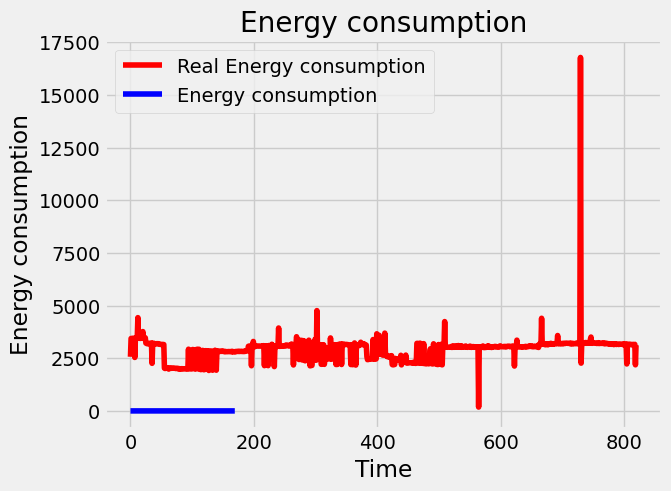

<Figure size 1600x400 with 0 Axes>

In [ ]:
plot_predictions(test_set,predicted_energy_consumption)

In [ ]:
return_rmse(Y_test,predicted_energy_consumption)

The root mean squared error is 0.058444259681171146.
The MSE is 0.0034157314896801675
The MAE is 0.03030808864435898
The R2_Score is -0.11655059060394524


In [ ]:
from sklearn.metrics import r2_score
Y_test, predicted_energy_consumption = list(Y_test),list(predicted_energy_consumption)
# gmdh.score(y_test, predicted_stock_price)
r2_score(Y_test, predicted_energy_consumption)

-0.11655059060394524

In [ ]:
k=144
print(Y_test[k],predicted_energy_consumption[k])

0.5182527353775497 0.5760100321645775


In [ ]:
# Since LSTMs store long term memory state, we create a data structure with 60 timesteps and 1 output
# So for each element of training set, we have 60 previous training set elements
X_train = []
Y_train = []
for i in range(60,366):
    X_train.append(training_set_scaled[i-60:i,0])
    Y_train.append(training_set_scaled[i,0])
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [ ]:
# Reshaping X_train for efficient modelling
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [ ]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(units=32, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))

In [ ]:
# Define the objective function for GWO
def objective_function(params):
    lr, decay = params
    model.compile(optimizer='adam', loss='mean_squared_error')
    history = model.fit(X_train, Y_train, epochs=5, batch_size=16, verbose=1)
    mse = history.history['loss'][-1]
    return mse

Epoch 1/5
20/20 [==============================] - 4s 24ms/step - loss: 0.0824
Epoch 2/5
20/20 [==============================] - 0s 21ms/step - loss: 0.0209
Epoch 3/5
20/20 [==============================] - 0s 22ms/step - loss: 0.0187
Epoch 4/5
20/20 [==============================] - 1s 29ms/step - loss: 0.0181
Epoch 5/5
20/20 [==============================] - 1s 27ms/step - loss: 0.0176
Epoch 1/5
20/20 [==============================] - 3s 23ms/step - loss: 0.0174
Epoch 2/5
20/20 [==============================] - 0s 21ms/step - loss: 0.0166
Epoch 3/5
20/20 [==============================] - 0s 21ms/step - loss: 0.0160
Epoch 4/5
20/20 [==============================] - 0s 20ms/step - loss: 0.0162
Epoch 5/5
20/20 [==============================] - 0s 21ms/step - loss: 0.0161
Epoch 1/5
20/20 [==============================] - 3s 22ms/step - loss: 0.0158
Epoch 2/5
20/20 [==============================] - 0s 20ms/step - loss: 0.0152
Epoch 3/5
20/20 [==============================] - 0

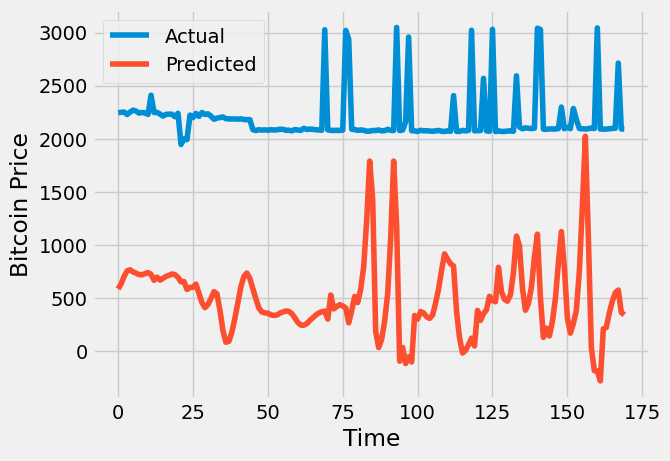

In [ ]:


# Define the GWO algorithm
class GreyWolfOptimizer:
    def __init__(self, objective_function, lb, ub, dim, population_size, iterations):
        self.objective_function = objective_function
        self.lb = lb
        self.ub = ub
        self.dim = dim
        self.population_size = population_size
        self.iterations = iterations

    def initialize_population(self):
        return np.random.uniform(low=self.lb, high=self.ub, size=(self.population_size, self.dim))

    def search(self):
        alpha_pos = np.zeros(self.dim)
        alpha_score = float("inf")
        beta_pos = np.zeros(self.dim)
        beta_score = float("inf")
        delta_pos = np.zeros(self.dim)
        delta_score = float("inf")
        positions = self.initialize_population()
        convergence_curve = np.zeros(self.iterations)

        for iteration in range(self.iterations):
            for i in range(self.population_size):
                # Update alpha, beta, and delta positions
                if self.objective_function(positions[i]) < alpha_score:
                    delta_score = beta_score
                    delta_pos = beta_pos.copy()
                    beta_score = alpha_score
                    beta_pos = alpha_pos.copy()
                    alpha_score = self.objective_function(positions[i])
                    alpha_pos = positions[i].copy()
                elif self.objective_function(positions[i]) < beta_score:
                    delta_score = beta_score
                    delta_pos = beta_pos.copy()
                    beta_score = self.objective_function(positions[i])
                    beta_pos = positions[i].copy()
                elif self.objective_function(positions[i]) < delta_score:
                    delta_score = self.objective_function(positions[i])
                    delta_pos = positions[i].copy()

                # Update positions
                a = 2 - (iteration * (2 / self.iterations))
                r1 = np.random.random(self.dim)
                r2 = np.random.random(self.dim)
                A1 = 2 * a * r1 - a
                C1 = 2 * r2
                D_alpha = np.abs(C1 * alpha_pos - positions[i])
                X1 = alpha_pos - A1 * D_alpha

                r1 = np.random.random(self.dim)
                r2 = np.random.random(self.dim)
                A2 = 2 * a * r1 - a
                C2 = 2 * r2
                D_beta = np.abs(C2 * beta_pos - positions[i])
                X2 = beta_pos - A2 * D_beta

                r1 = np.random.random(self.dim)
                r2 = np.random.random(self.dim)
                A3 = 2 * a * r1 - a
                C3 = 2 * r2
                D_delta = np.abs(C3 * delta_pos - positions[i])
                X3 = delta_pos - A3 * D_delta

                positions[i] = (X1 + X2 + X3) / 3

            convergence_curve[iteration] = alpha_score

        return alpha_pos, alpha_score, convergence_curve

# Define the bounds, dimension, population size, and number of iterations for GWO
lb = [0.0001, 0.0001]
ub = [0.1, 0.9]
dim = 2
population_size = 10
iterations = 10

# Create an instance of GreyWolfOptimizer and perform the search
gwo = GreyWolfOptimizer(objective_function, lb, ub, dim, population_size, iterations)
alpha_pos, alpha_score, convergence_curve = gwo.search()

# Compile the model with optimal parameters
lr_opt = alpha_pos[0]
decay_opt = alpha_pos[1]
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model with optimal parameters
model.fit(X_train, Y_train, epochs=5, batch_size=16, verbose=2)

# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Rescale the predictions
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)
Y_train = scaler.inverse_transform([Y_train])
Y_test = scaler.inverse_transform([Y_test])

# Calculate evaluation metrics
train_rmse = math.sqrt(mean_squared_error(Y_train[0], train_predictions[:, 0]))
test_rmse = math.sqrt(mean_squared_error(Y_test[0], test_predictions[:, 0]))
train_mse = mean_squared_error(Y_train[0], train_predictions[:, 0])
test_mse = mean_squared_error(Y_test[0], test_predictions[:, 0])
train_mape = mean_absolute_percentage_error(Y_train[0], train_predictions[:, 0])
test_mape = mean_absolute_percentage_error(Y_test[0], test_predictions[:, 0])

# Print evaluation metrics
print('Train RMSE:', train_rmse)
print('Test RMSE:', test_rmse)
print('Train MSE:', train_mse)
print('Test MSE:', test_mse)
print('Train MAPE:', train_mape)
print('Test MAPE:', test_mape)

# Plot the predictions
plt.plot(Y_test[0], label='Actual')
plt.plot(test_predictions[:, 0], label='Predicted')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.show()